# Cofee Shop Sales Analisys

## Introducere

Acest set de date este ideal pentru a explora tendintele de vanzari in evolutie de-a lungul timpului, pentru a identifica zilele de varf de trafic al clientilor si pentru a explora valorile de performanta ale diferitelor produse. Setul de date cuprinde inregistrari tranzactionale de la Maven Roasters, o cafenea fictiva din New York care opereaza in trei locatii distincte. Acesta cuprinde detalii complete, cum ar fi datele tranzactiei, marcajele de timp, specificul geografic si informatiile la nivel de produs. Cercetatorii pot analiza frecventa vanzarilor de produse, pot identifica principalii factori de venit si pot investiga factorii care contribuie la fluctuatiile volumului vanzarilor.

## Cunoasterea Bazei de date

### Importuri

In [107]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plT
import math
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time
from scipy.signal import savgol_filter


### Citirea Bazei de Date si afisare

In [108]:
df=pd.read_csv("coffee-shop-sales-revenue.csv",sep="|")
df

transaction_id transaction_date transaction_time  transaction_qty  \
0                    1       2023-01-01         07:06:11                2   
1                    2       2023-01-01         07:08:56                2   
2                    3       2023-01-01         07:14:04                2   
3                    4       2023-01-01         07:20:24                1   
4                    5       2023-01-01         07:22:41                2   
...                ...              ...              ...              ...   
149111          149452       2023-06-30         20:18:41                2   
149112          149453       2023-06-30         20:25:10                2   
149113          149454       2023-06-30         20:31:34                1   
149114          149455       2023-06-30         20:57:19                1   
149115          149456       2023-06-30         20:57:19                2   

        store_id   store_location  product_id  unit_price    product_category  \
0              5  Lower Manhattan          32        3.00              Coffee   
1              5  Lower Manhattan          57        3.10                 Tea   
2              5  Lower Manhattan          59        4.50  Drinking Chocolate   
3              5  Lower Manhattan          22        2.00              Coffee   
4              5  Lower Manhattan          57        3.10                 Tea   
...          ...              ...         ...         ...                 ...   
149111         8   Hell's Kitchen          44        2.50                 Tea   
149112         8   Hell's Kitchen          49        3.00                 Tea   
149113         8   Hell's Kitchen          45        3.00                 Tea   
149114         8   Hell's Kitchen          40        3.75              Coffee   
149115         8   Hell's Kitchen          64        0.80            Flavours   

                 product_type               product_detail  
0       Gourmet brewed coffee                  Ethiopia Rg  
1             Brewed Chai tea     Spicy Eye Opener Chai Lg  
2               Hot chocolate            Dark chocolate Lg  
3                 Drip coffee  Our Old Time Diner Blend Sm  
4             Brewed Chai tea     Spicy Eye Opener Chai Lg  
...                       ...                          ...  
149111      Brewed herbal tea                Peppermint Rg  
149112       Brewed Black tea         English Breakfast Lg  
149113      Brewed herbal tea                Peppermint Lg  
149114       Barista Espresso                   Cappuccino  
149115          Regular syrup               Hazelnut syrup  

[149116 rows x 11 columns]

### Tipul coloanelor


In [109]:
df.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
transaction_qty       int64
store_id              int64
store_location       object
product_id            int64
unit_price          float64
product_category     object
product_type         object
product_detail       object
dtype: object

### Descrierea bazei de date

In [110]:
df.describe()

transaction_id  transaction_qty       store_id     product_id  \
count   149116.000000    149116.000000  149116.000000  149116.000000   
mean     74737.371872         1.438276       5.342063      47.918607   
std      43153.600016         0.542509       2.074241      17.930020   
min          1.000000         1.000000       3.000000       1.000000   
25%      37335.750000         1.000000       3.000000      33.000000   
50%      74727.500000         1.000000       5.000000      47.000000   
75%     112094.250000         2.000000       8.000000      60.000000   
max     149456.000000         8.000000       8.000000      87.000000   

          unit_price  
count  149116.000000  
mean        3.382219  
std         2.658723  
min         0.800000  
25%         2.500000  
50%         3.000000  
75%         3.750000  
max        45.000000

### Valorie unice din coloane(cate sunt)

In [111]:
df=pd.read_csv("coffee-shop-sales-revenue.csv",sep="|")
df=pd.DataFrame(df.nunique(), columns=['Unique values Count'])
print(df)

                  Unique values Count
transaction_id                 149116
transaction_date                  181
transaction_time                25762
transaction_qty                     6
store_id                            3
store_location                      3
product_id                         80
unit_price                         41
product_category                    9
product_type                       29
product_detail                     80


### Verificarea valorilor NULL sau NaN in Baza de date


In [112]:
missing_values = df.isnull().sum()

print("Valori lipsa in fiecare coloana:")
print(missing_values)

rows_with_missing_values = df[df.isnull().any(axis=1)]

print("\n Randuri cu valori lipsa:")
print(rows_with_missing_values)

Valori lipsa in fiecare coloana:
Unique values Count    0
dtype: int64

 Randuri cu valori lipsa:
Empty DataFrame
Columns: [Unique values Count]
Index: []


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, transaction_id to product_detail
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unique values Count  11 non-null     int64
dtypes: int64(1)
memory usage: 476.0+ bytes


### Eliminarea valorilor Null sau Nan si a randurilor duplicate

In [114]:
df=df.dropna()
df=df.drop_duplicates()
df

Unique values Count
transaction_id                 149116
transaction_date                  181
transaction_time                25762
transaction_qty                     6
store_id                            3
product_id                         80
unit_price                         41
product_category                    9
product_type                       29

### Verific daca sunt randuri duplicate

In [115]:
verif_duplicates=df.duplicated().any()
verif_duplicates

np.False_

### Histograme pentru coloanele numerice

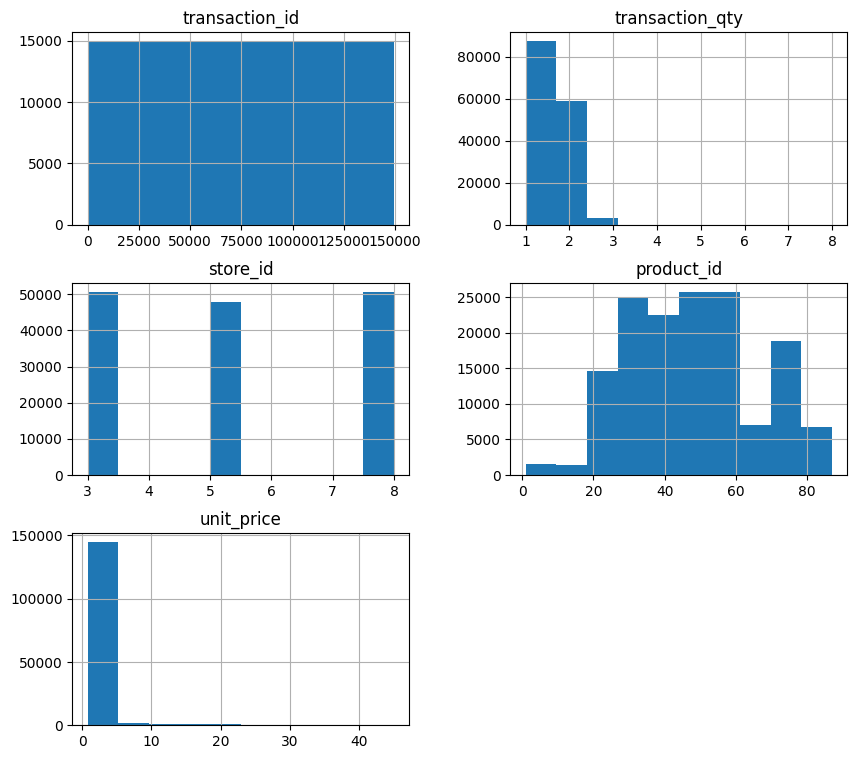

In [116]:
df=pd.read_csv("coffee-shop-sales-revenue.csv",sep="|")
numeric_cols = df.select_dtypes(include=['number']).columns
nr = 10
df[numeric_cols].hist(figsize=(10, 9), bins=nr)

plT.show()

### Histograme pentru store_id 3

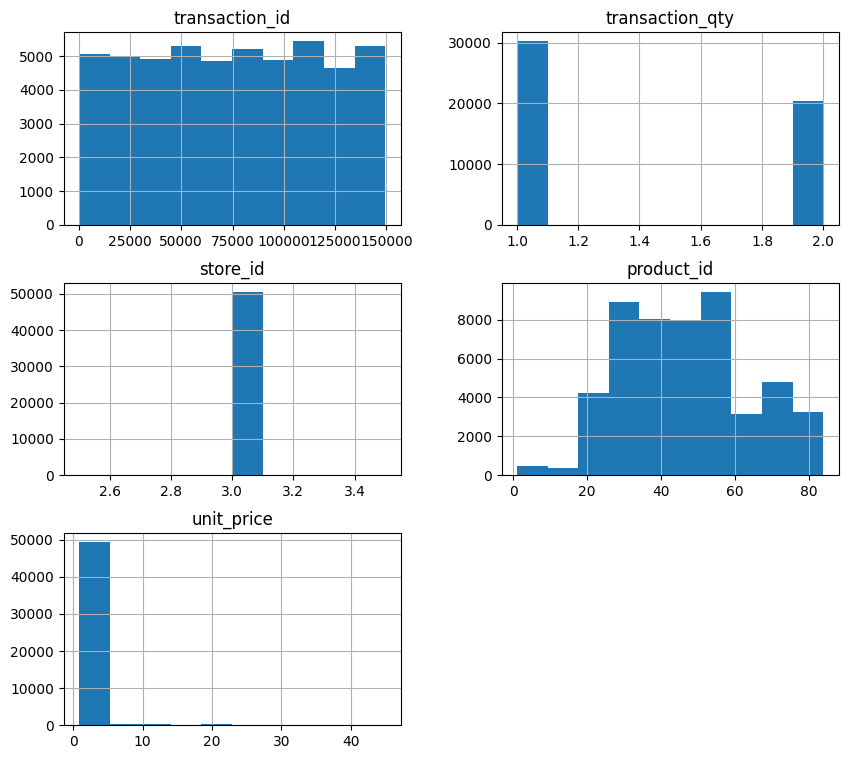

In [117]:

filtered_df_store_id_3 = df[df['store_id'] == 3]
nr = 10
filtered_df_store_id_3[numeric_cols].hist(figsize=(10, 9), bins=nr)
plT.show()

### Histograme pentru store_id 5

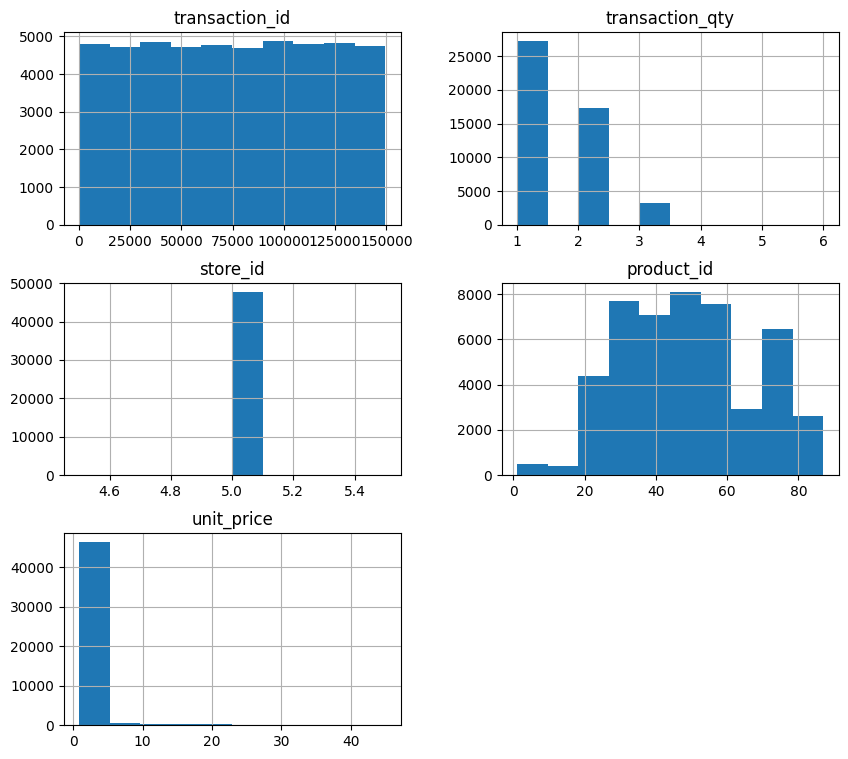

In [118]:
filtered_df_store_id_5 = df[df['store_id'] == 5]
nr = 10 
filtered_df_store_id_5[numeric_cols].hist(figsize=(10, 9), bins=nr)

plT.show()

### Histograme pentru store_id 8

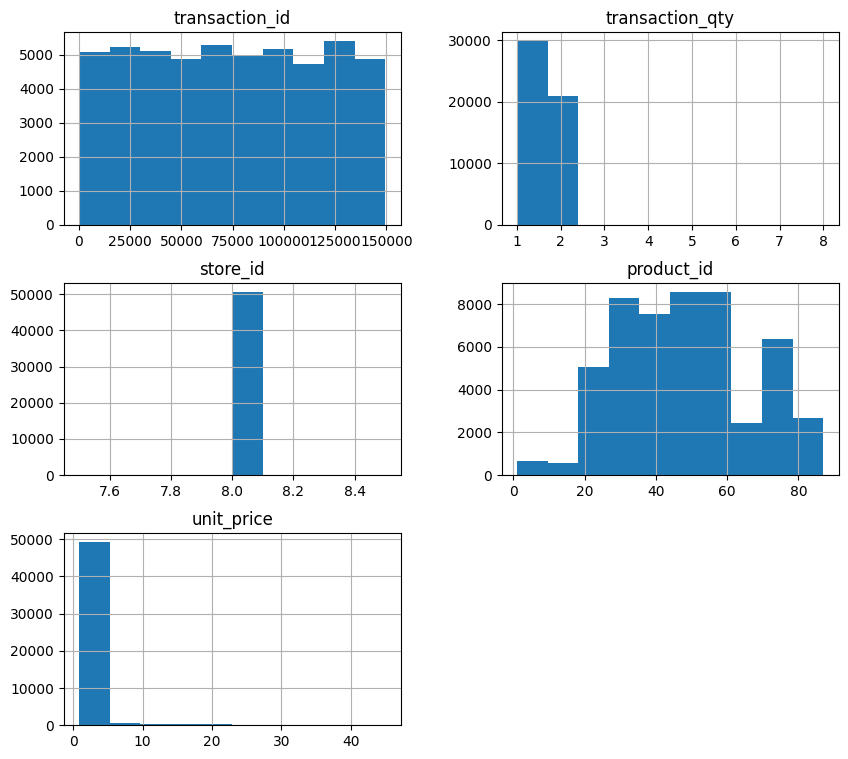

In [119]:
filtered_df_store_id_8= df[df['store_id'] == 8]
nr = 10  
filtered_df_store_id_8[numeric_cols].hist(figsize=(10, 9), bins=nr)
plT.show()

### Matrice de corelatie

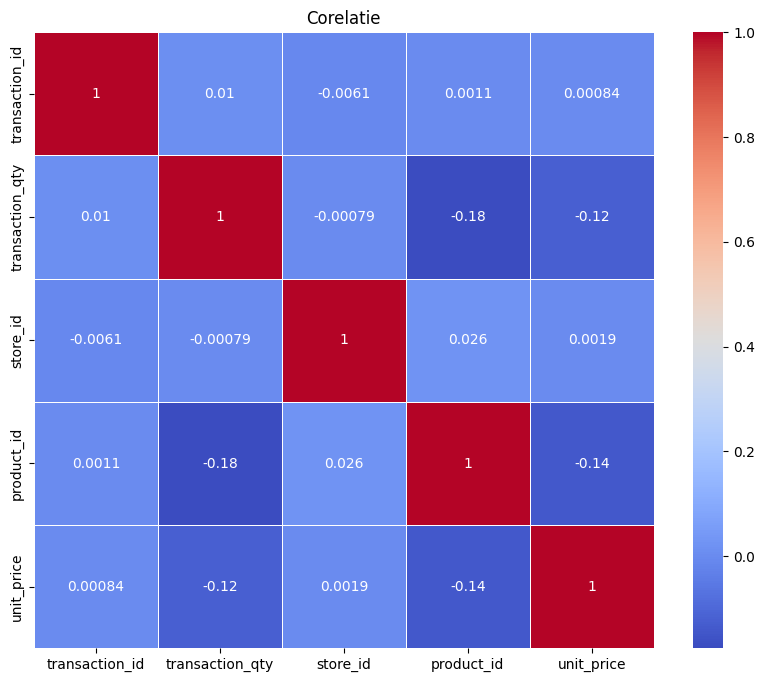

In [120]:


# Selectarea coloanelor numerice
numeric_df = df.select_dtypes(include=['number'])

# Calcularea matricei de corelatie
correlation_matrix = numeric_df.corr()


# print("Corelatie:")
# print(correlation_matrix)

plT.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plT.title('Corelatie')
plT.show()

### Gini index

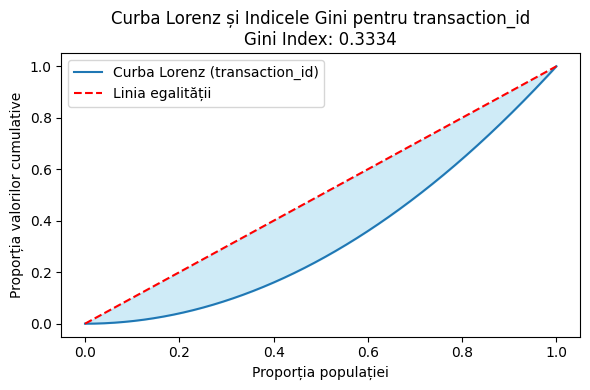

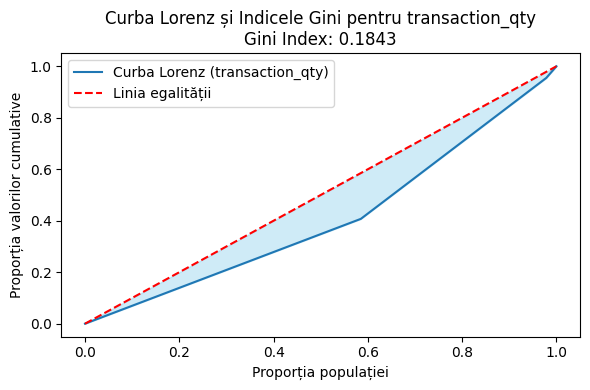

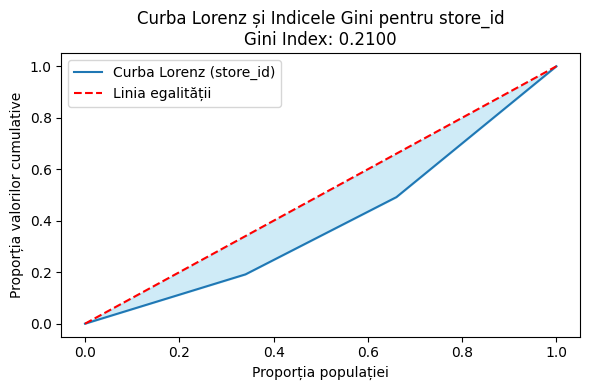

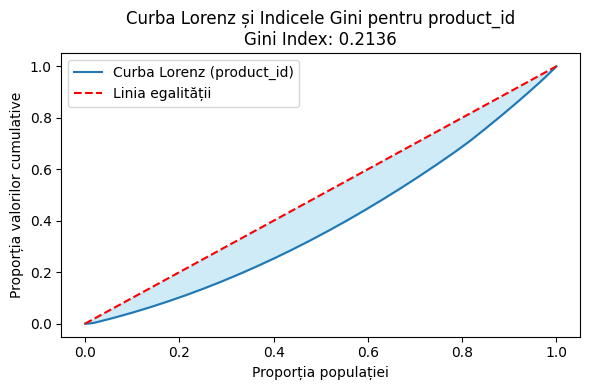

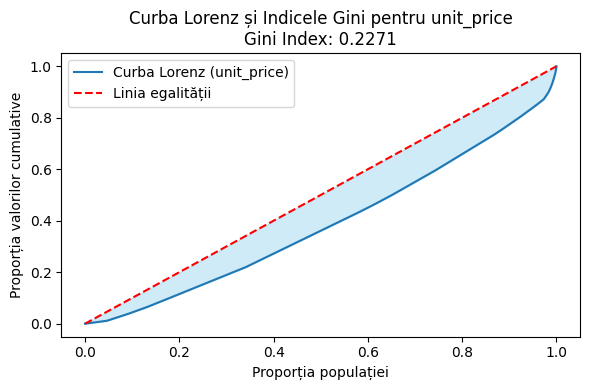

In [121]:
def lorenz_curve(array):
    array = np.sort(array)  # Sortare in ordine crescatoare
    cumulative_values = np.cumsum(array)  #Suma valori
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizare la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  
    return cumulative_values, gini

numeric_cols = df.select_dtypes(include=['number'])

# Crearea curbelor Lorenz si calcularea indicelui Gini pentru fiecare coloana numerica
for col in numeric_cols.columns:
    values = numeric_cols[col].dropna().values  #Eliminare valori lipsa
    cumulative_values, gini = lorenz_curve(values)
    

    plT.figure(figsize=(6, 4))
    plT.plot(np.linspace(0, 1, len(cumulative_values)), cumulative_values, label=f'Curba Lorenz ({col})')
    plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalitƒÉ»õii')
    plT.fill_between(np.linspace(0, 1, len(cumulative_values)), cumulative_values, np.linspace(0, 1, len(cumulative_values)), color='skyblue', alpha=0.4)
    plT.title(f'Curba Lorenz »ôi Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
    plT.xlabel('Propor»õia popula»õiei')
    plT.ylabel('Propor»õia valorilor cumulative')
    plT.legend()
    plT.tight_layout()
    plT.show()

### Information Quantity

In [122]:
def entropy(column):
    probabilities = column.value_counts(normalize=True)
    probabilities = probabilities[probabilities > 0]
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Calcularea entropiei pentru fiecare coloana
entropy_values = {}
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':  # Pentru coloane categorice
        entropy_values[col] = entropy(df[col])
    elif np.issubdtype(df[col].dtype, np.number):  # Pentru coloane numerice
        entropy_values[col] = entropy(pd.cut(df[col], bins=10))  # Grupam valorile numerice in intervale

# Afisare entropiei
print("Entropia (Information Quantity) pentru fiecare coloana:")
for col, entropy in entropy_values.items():
    print(f"{col}: {entropy:.4f}")

Entropia (Information Quantity) pentru fiecare coloana:
transaction_id: 3.3219
transaction_date: 7.4365
transaction_time: 14.3346
transaction_qty: 1.1066
store_id: 1.5844
store_location: 1.5844
product_id: 2.9661
unit_price: 0.2518
product_category: 2.1508
product_type: 3.9336
product_detail: 5.9359


#### Entropia pentru fiecare coloana

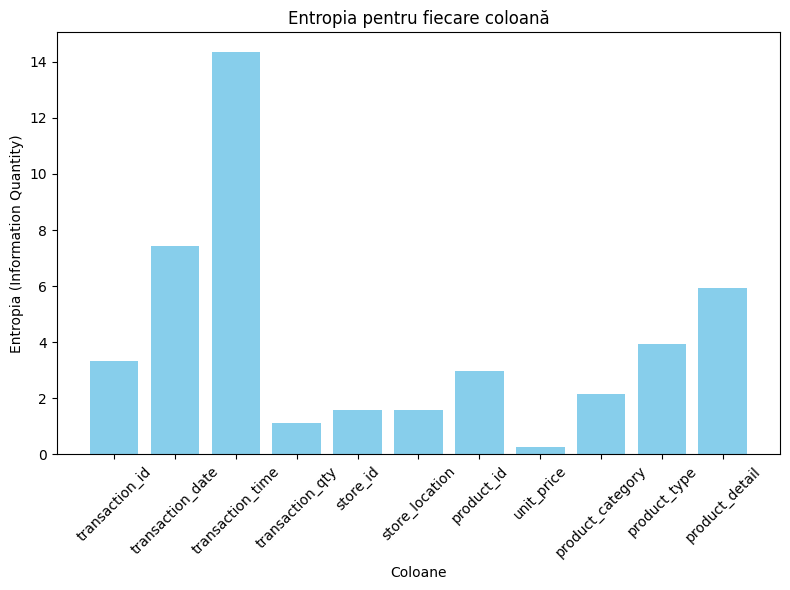

In [123]:

plT.figure(figsize=(8, 6))
plT.bar(entropy_values.keys(), entropy_values.values(), color='skyblue')
plT.xlabel('Coloane')
plT.ylabel('Entropia (Information Quantity)')
plT.title('Entropia pentru fiecare coloanƒÉ')
plT.xticks(rotation=45)
plT.tight_layout()
plT.show()

### Store_id 3 Gini Index

Gini Index »ôi Curba Lorenz pentru store_id 3:
  transaction_id: 0.3328


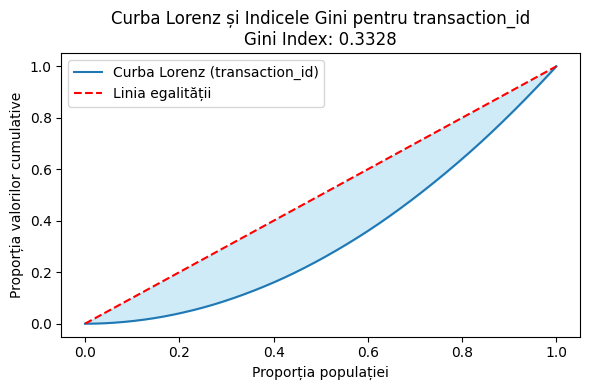

  transaction_qty: 0.1715


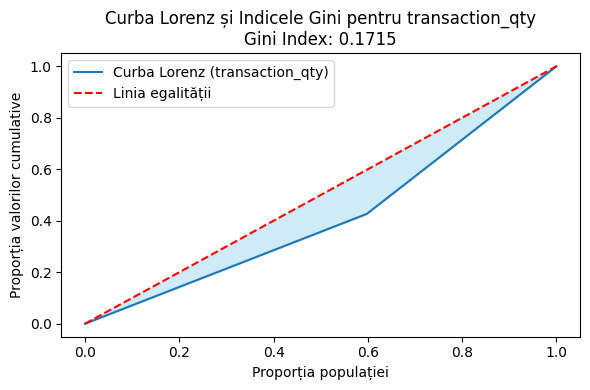

  product_id: 0.2068


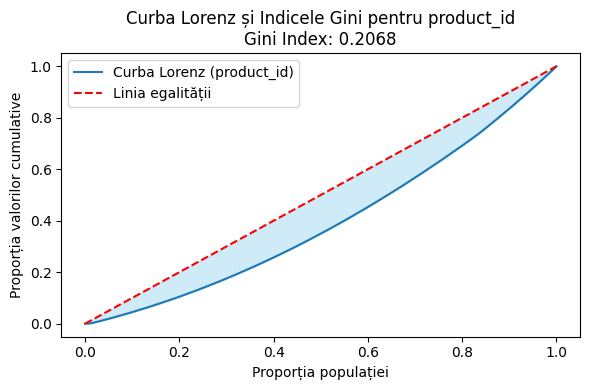

  unit_price: 0.2114


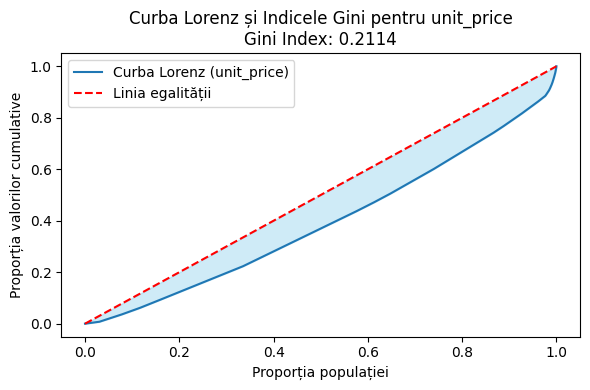

In [124]:
def gini_index_and_lorenz_curve(array):
    array = np.sort(array)  # Sortare √Æn ordine crescatoare
    cumulative_values = np.cumsum(array)  # Suma valorilor
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizam la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  # Calculam indicele Gini
    return gini, cumulative_values


# Filtrarea datelor pentru store_id = 3
filtered_df_store_id_3 = df[df['store_id'] == 3]

# Selectarea coloanelor numerice
numeric_cols = filtered_df_store_id_3.select_dtypes(include=['number']).drop(columns=['store_id'], errors='ignore')

# Calcularea Gini Index si desenarea curbei Lorenz pentru fiecare coloana numerica
print("Gini Index »ôi Curba Lorenz pentru store_id 3:")
for col in numeric_cols.columns:
    if filtered_df_store_id_3[col].sum() > 0:  # Verificam dacƒÉ exista valori nenule
        gini, lorenz_curve = gini_index_and_lorenz_curve(filtered_df_store_id_3[col].values)
        print(f"  {col}: {gini:.4f}")
        
        # Desenarea curbei Lorenz
        plT.figure(figsize=(6, 4))
        plT.plot(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, label=f'Curba Lorenz ({col})')
        plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalitƒÉ»õii')
        plT.fill_between(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, np.linspace(0, 1, len(lorenz_curve)), color='skyblue', alpha=0.4)
        plT.title(f'Curba Lorenz »ôi Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
        plT.xlabel('Propor»õia popula»õiei')
        plT.ylabel('Propor»õia valorilor cumulative')
        plT.legend()
        plT.tight_layout()
        plT.show()
    else:
        print(f"  {col}: Nu se poate calcula (toate valorile sunt 0)")

### Store_id 5 Gini Index

Gini Index »ôi Curba Lorenz pentru store_id 5:
  transaction_id: 0.3331


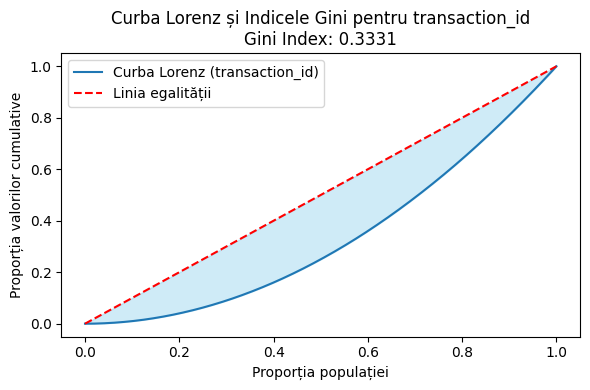

  transaction_qty: 0.2067


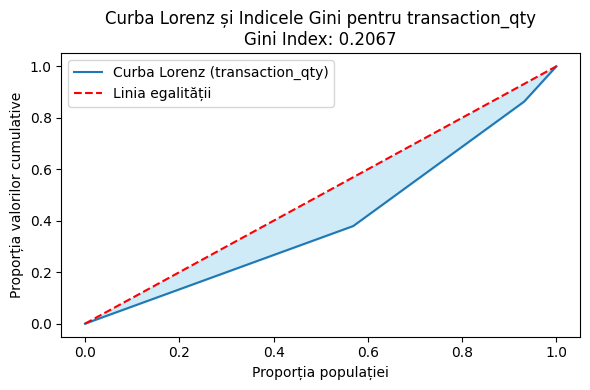

  product_id: 0.2140


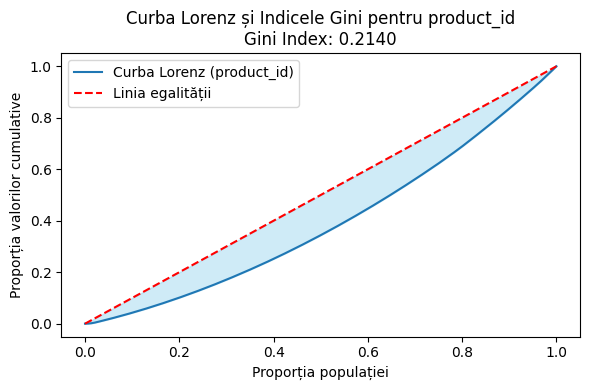

  unit_price: 0.2386


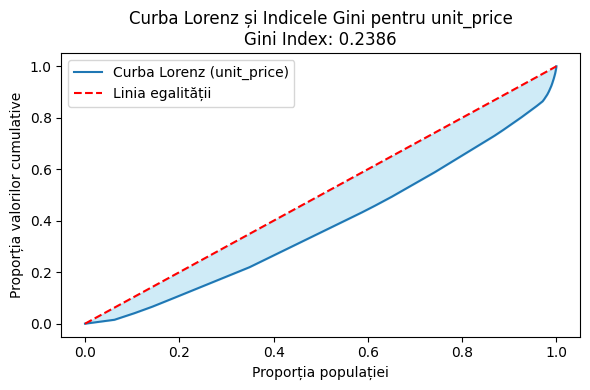

In [125]:
def gini_index_and_lorenz_curve(array):
    array = np.sort(array)  # Sortare in ordine crescatoare
    cumulative_values = np.cumsum(array)  # Suma valorilor
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizam la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  # Calculam indicele Gini
    return gini, cumulative_values

# Filtrarea datelor pentru store_id = 5
filtered_df_store_id_5 = df[df['store_id'] == 5]

# Selectarea coloanelor numerice
numeric_cols = filtered_df_store_id_5.select_dtypes(include=['number']).drop(columns=['store_id'], errors='ignore')

# Calcularea Gini Index si desenarea curbei Lorenz pentru fiecare coloana numerica
print("Gini Index »ôi Curba Lorenz pentru store_id 5:")
for col in numeric_cols.columns:
    if filtered_df_store_id_5[col].sum() > 0:  # Verificam daca exista valori nenule
        gini, lorenz_curve = gini_index_and_lorenz_curve(filtered_df_store_id_5[col].values)
        print(f"  {col}: {gini:.4f}")
        
        # Desenarea curbei Lorenz
        plT.figure(figsize=(6, 4))
        plT.plot(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, label=f'Curba Lorenz ({col})')
        plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalitƒÉ»õii')
        plT.fill_between(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, np.linspace(0, 1, len(lorenz_curve)), color='skyblue', alpha=0.4)
        plT.title(f'Curba Lorenz »ôi Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
        plT.xlabel('Propor»õia popula»õiei')
        plT.ylabel('Propor»õia valorilor cumulative')
        plT.legend()
        plT.tight_layout()
        plT.show()
    else:
        print(f"  {col}: Nu se poate calcula (toate valorile sunt 0)")

### Store_id 8 Gini Index

Gini Index »ôi Curba Lorenz pentru store_id 8:
  transaction_id: 0.3341


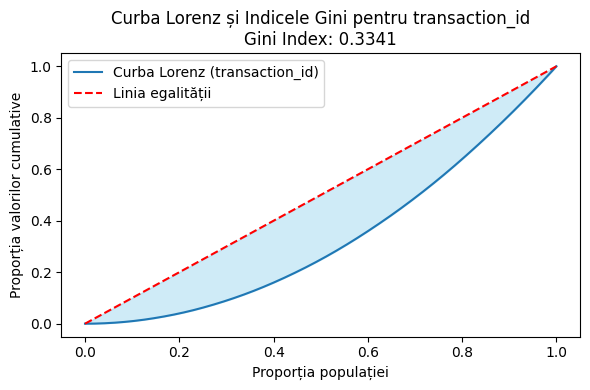

  transaction_qty: 0.1723


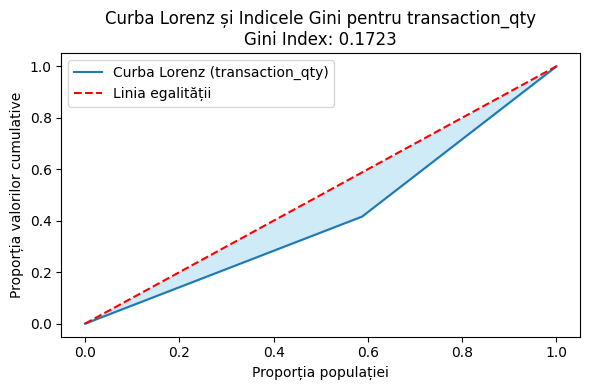

  product_id: 0.2187


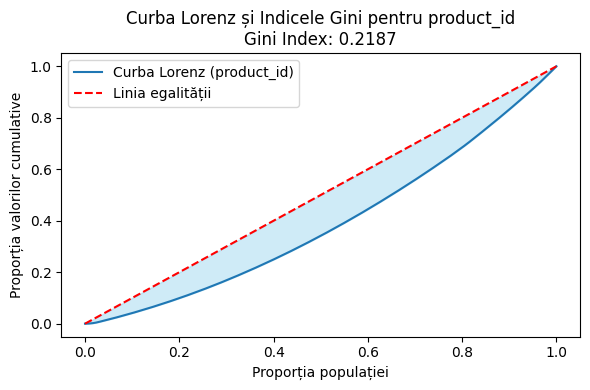

  unit_price: 0.2318


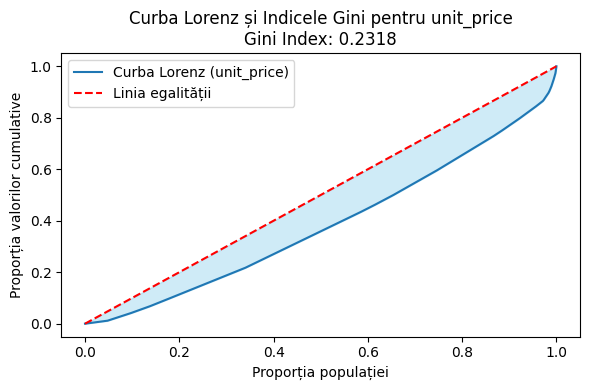

In [126]:
def gini_index_and_lorenz_curve(array):
    array = np.sort(array)  # Sortare √Æn ordine crescatoare
    cumulative_values = np.cumsum(array)  # Suma valorilor
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizam la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  # Calculam indicele Gini
    return gini, cumulative_values

# Filtrarea datelor pentru store_id = 8
filtered_df_store_id_8 = df[df['store_id'] == 8]

# Selectarea coloanelor numerice
numeric_cols = filtered_df_store_id_8.select_dtypes(include=['number']).drop(columns=['store_id'], errors='ignore')

# Calcularea Gini Index si desenarea curbei Lorenz pentru fiecare coloana numerica
print("Gini Index »ôi Curba Lorenz pentru store_id 8:")
for col in numeric_cols.columns:
    if filtered_df_store_id_8[col].sum() > 0:  # Verificam daca exista valori nenule
        gini, lorenz_curve = gini_index_and_lorenz_curve(filtered_df_store_id_8[col].values)
        print(f"  {col}: {gini:.4f}")
        
        # Desenarea curbei Lorenz
        plT.figure(figsize=(6, 4))
        plT.plot(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, label=f'Curba Lorenz ({col})')
        plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalitƒÉ»õii')
        plT.fill_between(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, np.linspace(0, 1, len(lorenz_curve)), color='skyblue', alpha=0.4)
        plT.title(f'Curba Lorenz »ôi Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
        plT.xlabel('Propor»õia popula»õiei')
        plT.ylabel('Propor»õia valorilor cumulative')
        plT.legend()
        plT.tight_layout()
        plT.show()
    else:
        print(f"  {col}: Nu se poate calcula (toate valorile sunt 0)")

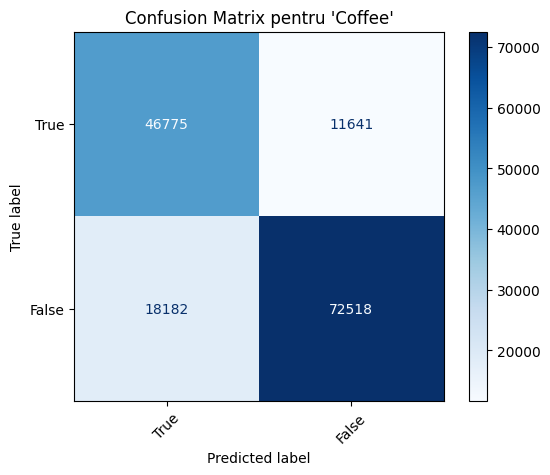

In [127]:


target_class = 'Coffee' 
true_labels_binary = (df['product_category'] == target_class).astype(int)  # 1 pentru clasa dorita, 0 altfel

np.random.seed(42) 
predicted_labels_binary = true_labels_binary.copy()
indices_to_modify = np.random.choice(len(true_labels_binary), size=int(0.2 * len(true_labels_binary)), replace=False)  # 20% zgomot
predicted_labels_binary.iloc[indices_to_modify] = 1 - predicted_labels_binary.iloc[indices_to_modify]  

# Calculam matricea de confuzie
cm = confusion_matrix(true_labels_binary, predicted_labels_binary, labels=[1, 0]) 

# Afisam matricea de confuzie
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True', 'False'])
disp.plot(cmap='Blues', xticks_rotation=45)
plT.title(f"Confusion Matrix pentru '{target_class}'")
plT.show()

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import (
#     mean_squared_error,
#     r2_score,
#     accuracy_score,
#     classification_report,
#     confusion_matrix,
#     ConfusionMatrixDisplay,
# )

# # 1. Load data
# df = pd.read_csv("coffee-shop-sales-revenue.csv", sep="|")

# # 2. Data Cleaning
# df = df.dropna()
# df = df.drop_duplicates()

# # 3. Encode categorical columns
# categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
# label_encoders = {}
# for col in categorical_columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# # 4. Feature Selection
# features = [col for col in df.columns if col not in ["transaction_id", "transaction_date", "transaction_time", "unit_price"]]
# target_regression = "unit_price"
# target_classification = "is_expensive"

# # Create a binary target for classification
# df[target_classification] = (df[target_regression] > df[target_regression].median()).astype(int)

# # 5. Split data into train/test sets
# X = df[features]
# y_regression = df[target_regression]
# y_classification = df[target_classification]

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
# X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# # Scale numerical features
# scaler = StandardScaler()
# X_train_reg = scaler.fit_transform(X_train_reg)
# X_test_reg = scaler.transform(X_test_reg)
# X_train_clf = scaler.fit_transform(X_train_clf)
# X_test_clf = scaler.transform(X_test_clf)

# # 6. Train Models
# # (a) Linear Regression
# lin_reg = LinearRegression()
# lin_reg.fit(X_train_reg, y_train_reg)
# y_pred_reg = lin_reg.predict(X_test_reg)

# # Cross-validation for Linear Regression
# cv_scores_lin_reg = cross_val_score(lin_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_lin_reg = cv_scores_lin_reg.mean()

# # (b) Logistic Regression
# log_reg = LogisticRegression(max_iter=5000, random_state=42, class_weight="balanced", solver="saga")
# log_reg.fit(X_train_clf, y_train_clf)
# y_pred_clf = log_reg.predict(X_test_clf)

# # Cross-validation for Logistic Regression
# cv_scores_log_reg = cross_val_score(log_reg, X, y_classification, cv=5, scoring="accuracy")
# mean_acc_log_reg = cv_scores_log_reg.mean()

# # (c) Random Forest
# rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_reg.fit(X_train_reg, y_train_reg)
# y_pred_rf_reg = rf_reg.predict(X_test_reg)

# rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_clf.fit(X_train_clf, y_train_clf)
# y_pred_rf_clf = rf_clf.predict(X_test_clf)

# # Cross-validation for Random Forest Regression
# cv_scores_rf_reg = cross_val_score(rf_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_rf_reg = cv_scores_rf_reg.mean()

# # Cross-validation for Random Forest Classification
# cv_scores_rf_clf = cross_val_score(rf_clf, X, y_classification, cv=5, scoring="accuracy")
# mean_acc_rf_clf = cv_scores_rf_clf.mean()

# # 7. Evaluate Models
# # Regression Metrics
# mse_lin_reg = mean_squared_error(y_test_reg, y_pred_reg)
# r2_lin_reg = r2_score(y_test_reg, y_pred_reg)
# mse_rf_reg = mean_squared_error(y_test_reg, y_pred_rf_reg)
# r2_rf_reg = r2_score(y_test_reg, y_pred_rf_reg)

# # Classification Metrics
# acc_log_reg = accuracy_score(y_test_clf, y_pred_clf)
# acc_rf_clf = accuracy_score(y_test_clf, y_pred_rf_clf)

# # 8. Compare Models
# print("\n--- Comparison of Models ---")
# print("Linear Regression:")
# print(f"  Test MSE: {mse_lin_reg:.4f}, Test R2: {r2_lin_reg:.4f}, CV Mean R2: {mean_r2_lin_reg:.4f}")
# print("\nRandom Forest Regression:")
# print(f"  Test MSE: {mse_rf_reg:.4f}, Test R2: {r2_rf_reg:.4f}, CV Mean R2: {mean_r2_rf_reg:.4f}")
# print("\nLogistic Regression:")
# print(f"  Test Accuracy: {acc_log_reg:.4f}, CV Mean Accuracy: {mean_acc_log_reg:.4f}")
# print("\nRandom Forest Classification:")
# print(f"  Test Accuracy: {acc_rf_clf:.4f}, CV Mean Accuracy: {mean_acc_rf_clf:.4f}")

# # Determine the best model
# best_regression_model = "Random Forest Regression" if mean_r2_rf_reg > mean_r2_lin_reg else "Linear Regression"
# best_classification_model = "Random Forest Classification" if mean_acc_rf_clf > mean_acc_log_reg else "Logistic Regression"

# print("\nBest Regression Model:", best_regression_model)
# print("Best Classification Model:", best_classification_model)

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import (
#     mean_squared_error,
#     r2_score,
#     accuracy_score,
#     classification_report,
#     confusion_matrix,
#     ConfusionMatrixDisplay,
# )

# # 1. Load data
# df = pd.read_csv("coffee-shop-sales-revenue.csv", sep="|")

# # 2. Data Cleaning
# df = df.dropna()
# df = df.drop_duplicates()

# # 3. Encode categorical columns
# categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
# label_encoders = {}
# for col in categorical_columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# # 4. Feature Selection
# features = [col for col in df.columns if col not in ["transaction_id", "transaction_date", "transaction_time", "unit_price"]]
# target_regression = "unit_price"
# target_classification = "is_expensive"

# # Create a binary target for classification
# df[target_classification] = (df[target_regression] > df[target_regression].median()).astype(int)

# # 5. Split data into train/test sets
# X = df[features]
# y_regression = df[target_regression]
# y_classification = df[target_classification]

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
# X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# # Scale numerical features
# scaler = StandardScaler()
# X_train_reg = scaler.fit_transform(X_train_reg)
# X_test_reg = scaler.transform(X_test_reg)
# X_train_clf = scaler.fit_transform(X_train_clf)
# X_test_clf = scaler.transform(X_test_clf)

# # 6. Train Models
# # (a) Linear Regression
# lin_reg = LinearRegression()
# lin_reg.fit(X_train_reg, y_train_reg)
# y_pred_reg = lin_reg.predict(X_test_reg)

# # Cross-validation for Linear Regression
# cv_scores_lin_reg = cross_val_score(lin_reg, X, y_regression, cv=5, scoring="r2")
# print("\nCross-Validation Results for Linear Regression:")
# print(f"R2 Scores: {cv_scores_lin_reg}")
# print(f"Mean R2: {cv_scores_lin_reg.mean():.2f}")
# # print(f"Standard Deviation of R2: {cv_scores_lin_reg.std():.2f}")

# # (b) Logistic Regression
# log_reg = LogisticRegression(max_iter=5000, random_state=42, class_weight="balanced", solver="saga")
# log_reg.fit(X_train_clf, y_train_clf)
# y_pred_clf = log_reg.predict(X_test_clf)

# # Cross-validation for Logistic Regression
# cv_scores_log_reg = cross_val_score(log_reg, X, y_classification, cv=5, scoring="accuracy")
# print("\nCross-Validation Results for Logistic Regression:")
# print(f"Accuracy Scores: {cv_scores_log_reg}")
# print(f"Mean Accuracy: {cv_scores_log_reg.mean():.2f}")
# # print(f"Standard Deviation of Accuracy: {cv_scores_log_reg.std():.2f}")

# # (c) Random Forest
# rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_reg.fit(X_train_reg, y_train_reg)
# y_pred_rf_reg = rf_reg.predict(X_test_reg)

# # rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# # rf_clf.fit(X_train_clf, y_train_clf)
# # y_pred_rf_clf = rf_clf.predict(X_test_clf)

# # Cross-validation for Random Forest Regression
# cv_scores_rf_reg = cross_val_score(rf_reg, X, y_regression, cv=5, scoring="r2")
# print("\nCross-Validation Results for Random Forest Regression:")
# print(f"R2 Scores: {cv_scores_rf_reg}")
# print(f"Mean R2: {cv_scores_rf_reg.mean():.2f}")
# # print(f"Standard Deviation of R2: {cv_scores_rf_reg.std():.2f}")

# # # Cross-validation for Random Forest Classification
# # cv_scores_rf_clf = cross_val_score(rf_clf, X, y_classification, cv=5, scoring="accuracy")
# # print("\nCross-Validation Results for Random Forest Classification:")
# # print(f"Accuracy Scores: {cv_scores_rf_clf}")
# # print(f"Mean Accuracy: {cv_scores_rf_clf.mean():.2f}")
# # print(f"Standard Deviation of Accuracy: {cv_scores_rf_clf.std():.2f}")

# # 7. Evaluate Models
# # Regression Metrics
# print("\nLinear Regression MSE:", mean_squared_error(y_test_reg, y_pred_reg))
# print("Linear Regression R2:", r2_score(y_test_reg, y_pred_reg))
# print("Random Forest Regression MSE:", mean_squared_error(y_test_reg, y_pred_rf_reg))
# print("Random Forest Regression R2:", r2_score(y_test_reg, y_pred_rf_reg))

# # Classification Metrics
# print("\nLogistic Regression Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
# # print("Random Forest Classification Accuracy:", accuracy_score(y_test_clf, y_pred_rf_clf))
# # print("\nClassification Report (Logistic Regression):\n", classification_report(y_test_clf, y_pred_clf))
# # print("\nClassification Report (Random Forest):\n", classification_report(y_test_clf, y_pred_rf_clf))

# # Confusion Matrix for Logistic Regression
# cm_log = confusion_matrix(y_test_clf, y_pred_clf)
# disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Not Expensive", "Expensive"])
# disp_log.plot(cmap="Blues")
# plT.title("Confusion Matrix - Logistic Regression")
# plT.show()

# # Confusion Matrix for Random Forest
# cm_rf = confusion_matrix(y_test_clf, y_pred_rf_clf)
# disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Not Expensive", "Expensive"])
# disp_rf.plot(cmap="Blues")
# plT.title("Confusion Matrix - Random Forest")
# plT.show()
# # Logistic Regression Accuracy
# log_reg_accuracy = accuracy_score(y_test_clf, y_pred_clf)
# print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")

# # Linear Regression R¬≤
# lin_reg_r2 = r2_score(y_test_reg, y_pred_reg)
# print(f"Linear Regression R¬≤: {lin_reg_r2:.4f}")

# # Random Forest Regression R¬≤
# rf_reg_r2 = r2_score(y_test_reg, y_pred_rf_reg)
# print(f"Random Forest Regression R¬≤: {rf_reg_r2:.4f}")




In [ ]:
# def compare_models(results):
#     """
#     Compara modelele de regresie »ôi clasificare »ôi returneazƒÉ cele mai bune modele.
    
#     Parameters:
#         results (dict): Dic»õionar cu rezultatele modelelor.
        
#     Returns:
#         dict: Cele mai bune modele pentru regresie »ôi clasificare.
#     """
#     # ComparƒÉm modelele de regresie pe baza R¬≤
#     best_regression_model = max(results['regression'], key=lambda x: results['regression'][x]['mean_r2'])
    
#     # ComparƒÉm modelele de clasificare pe baza acurate»õei
#     best_classification_model = max(results['classification'], key=lambda x: results['classification'][x]['mean_accuracy'])
    
#     return {
#         "best_regression_model": best_regression_model,
#         "best_classification_model": best_classification_model
#     }


# # 1. CalculƒÉm rezultatele pentru fiecare model
# results = {
#     "regression": {
#         "Linear Regression": {
#             "mean_r2": cv_scores_lin_reg.mean(),
#             "test_r2": r2_score(y_test_reg, y_pred_reg),
#             "test_mse": mean_squared_error(y_test_reg, y_pred_reg)
#         },
#         "Random Forest Regression": {
#             "mean_r2": cv_scores_rf_reg.mean(),
#             "test_r2": r2_score(y_test_reg, y_pred_rf_reg),
#             "test_mse": mean_squared_error(y_test_reg, y_pred_rf_reg)
#         }
#     },
#     "classification": {
#         "Logistic Regression": {
#             "mean_accuracy": cv_scores_log_reg.mean(),
#             "test_accuracy": accuracy_score(y_test_clf, y_pred_clf)
#         }
#     }
# }

# # 2. ComparƒÉm modelele
# best_models = compare_models(results)

# # 3. Afi»ôƒÉm rezultatele
# print("\n--- Cross-Validation Results ---")
# print("Linear Regression:")
# print(f"  Mean R2: {cv_scores_lin_reg.mean():.4f}")
# print("Random Forest Regression:")
# print(f"  Mean R2: {cv_scores_rf_reg.mean():.4f}")
# print("Logistic Regression:")
# print(f"  Mean Accuracy: {cv_scores_log_reg.mean():.4f}")

# print("\n--- Test Set Performance ---")
# print("Linear Regression:")
# print(f"  Test MSE: {mean_squared_error(y_test_reg, y_pred_reg):.4f}, Test R2: {r2_score(y_test_reg, y_pred_reg):.4f}")
# print("Random Forest Regression:")
# print(f"  Test MSE: {mean_squared_error(y_test_reg, y_pred_rf_reg):.4f}, Test R2: {r2_score(y_test_reg, y_pred_rf_reg):.4f}")
# print("Logistic Regression:")
# print(f"  Test Accuracy: {accuracy_score(y_test_clf, y_pred_clf):.4f}")

# print("\n--- Best Models ---")
# print(f"Best Regression Model: {best_models['best_regression_model']}")

In [ ]:
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# # 1. Load data
# df = pd.read_csv("coffee-shop-sales-revenue.csv", sep="|")
# df = df.dropna().drop_duplicates()

# # 2. Encode categorical columns
# categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
# for col in categorical_columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])

# # 3. Feature Selection
# features = [col for col in df.columns if col not in ["transaction_id", "transaction_date", "transaction_time", "unit_price"]]
# target_regression = "unit_price"
# target_classification = "is_expensive"
# df[target_classification] = (df[target_regression] > df[target_regression].median()).astype(int)

# # 4. Split data
# X = df[features]
# y_regression = df[target_regression]
# y_classification = df[target_classification]
# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
# X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# # 5. Scale data
# scaler = StandardScaler()
# X_train_reg = scaler.fit_transform(X_train_reg)
# X_test_reg = scaler.transform(X_test_reg)
# X_train_clf = scaler.fit_transform(X_train_clf)
# X_test_clf = scaler.transform(X_test_clf)

# # 6. Hyperparameter Optimization
# log_reg_params = {'C': [0.1, 1, 10], 'solver': ['liblinear'], 'class_weight': ['balanced']}
# rf_reg_params = {'n_estimators': [50, 100], 'max_depth': [None, 10]}

# log_reg_random = RandomizedSearchCV(LogisticRegression(max_iter=5000, random_state=42), log_reg_params, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, n_iter=5)
# rf_reg_random = RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_reg_params, scoring='r2', cv=3, verbose=1, n_jobs=-1, n_iter=5)

# log_reg_random.fit(X_train_clf, y_train_clf)
# rf_reg_random.fit(X_train_reg, y_train_reg)

# # 7. Evaluate
# print("Best Logistic Regression Params:", log_reg_random.best_params_)
# print("Best Random Forest Regression Params:", rf_reg_random.best_params_)

# y_pred_clf = log_reg_random.best_estimator_.predict(X_test_clf)
# y_pred_reg = rf_reg_random.best_estimator_.predict(X_test_reg)

# print("Logistic Regression Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
# print("Random Forest Regression R¬≤:", r2_score(y_test_reg, y_pred_reg))

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import (
#     mean_squared_error,
#     r2_score,
#     accuracy_score,
#     classification_report,
#     confusion_matrix,
#     ConfusionMatrixDisplay,
# )

# # 1. Citirea »ôi curƒÉ»õarea datelor
# df = pd.read_csv("coffee-shop-sales-revenue.csv", sep="|")
# df = df.dropna().drop_duplicates()
# df['month'] = pd.to_datetime(df['transaction_date']).dt.month

# # 2. Codificarea coloanelor categorice
# categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
# label_encoders = {}
# for col in categorical_columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# # 3. Selectarea caracteristicilor »ôi a »õintelor
# features = [col for col in df.columns if col not in ["transaction_id", "transaction_date", "transaction_time", "unit_price"]]
# target_regression = "unit_price"
# target_classification = "is_expensive"


# # Crearea unei »õinte binare pentru clasificare
# df[target_classification] = (df[target_regression] > df[target_regression].median()).astype(int)

# # 4. √émpƒÉr»õirea datelor √Æn seturi de antrenament »ôi testare
# X = df[features]
# y_regression = df[target_regression]
# y_classification = df[target_classification]

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
# X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
#     X, y_classification, test_size=0.2, random_state=42, stratify=y_classification
# )

# # 5. Scalarea caracteristicilor numerice
# scaler = StandardScaler()
# X_train_reg = scaler.fit_transform(X_train_reg)
# X_test_reg = scaler.transform(X_test_reg)
# X_train_clf = scaler.fit_transform(X_train_clf)
# X_test_clf = scaler.transform(X_test_clf)

# # 6. Optimizarea hiperparametrilor
# # (a) Logistic Regression
# log_reg_params = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'solver': ['liblinear', 'saga'],
#     'class_weight': ['balanced', None]
# }
# log_reg_grid = GridSearchCV(
#     LogisticRegression(max_iter=5000, random_state=42),
#     param_grid=log_reg_params,
#     scoring='accuracy',
#     cv=3,
#     verbose=1,
#     n_jobs=-1
# )
# log_reg_grid.fit(X_train_clf, y_train_clf)
# best_log_reg = log_reg_grid.best_estimator_

# # (b) Random Forest Regression
# rf_reg_params = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }
# rf_reg_grid = GridSearchCV(
#     RandomForestRegressor(random_state=42),
#     param_grid=rf_reg_params,
#     scoring='r2',
#     cv=3,
#     verbose=1,
#     n_jobs=-1
# )
# rf_reg_grid.fit(X_train_reg, y_train_reg)
# best_rf_reg = rf_reg_grid.best_estimator_

# # 7. Antrenarea modelelor fƒÉrƒÉ cross-validation
# # (a) Linear Regression
# lin_reg = LinearRegression()
# lin_reg.fit(X_train_reg, y_train_reg)
# y_pred_reg = lin_reg.predict(X_test_reg)
# mse_lin_reg = mean_squared_error(y_test_reg, y_pred_reg)
# r2_lin_reg = r2_score(y_test_reg, y_pred_reg)

# # (b) Logistic Regression
# y_pred_clf = best_log_reg.predict(X_test_clf)
# acc_log_reg = accuracy_score(y_test_clf, y_pred_clf)

# # (c) Random Forest Regression
# y_pred_rf_reg = best_rf_reg.predict(X_test_reg)
# mse_rf_reg = mean_squared_error(y_test_reg, y_pred_rf_reg)
# r2_rf_reg = r2_score(y_test_reg, y_pred_rf_reg)

# # 8. Evaluarea modelelor cu cross-validation
# # Cross-validation pentru Linear Regression
# cv_scores_lin_reg = cross_val_score(lin_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_lin_reg = cv_scores_lin_reg.mean()

# # Cross-validation pentru Logistic Regression
# cv_scores_log_reg = cross_val_score(best_log_reg, X, y_classification, cv=5, scoring="accuracy")
# mean_acc_log_reg = cv_scores_log_reg.mean()

# # Cross-validation pentru Random Forest Regression
# cv_scores_rf_reg = cross_val_score(best_rf_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_rf_reg = cv_scores_rf_reg.mean()

# # 9. Afi»ôarea rezultatelor
# print("\n--- Results Without Cross-Validation ---")
# print(f"Linear Regression: Test MSE: {mse_lin_reg:.4f}, Test R¬≤: {r2_lin_reg:.4f}")
# print(f"Logistic Regression: Test Accuracy: {acc_log_reg:.4f}")
# print(f"Random Forest Regression: Test MSE: {mse_rf_reg:.4f}, Test R¬≤: {r2_rf_reg:.4f}")

# print("\n--- Results With Cross-Validation ---")
# print(f"Linear Regression: Cross-Validation Mean R¬≤: {mean_r2_lin_reg:.4f}")
# print(f"Logistic Regression: Cross-Validation Mean Accuracy: {mean_acc_log_reg:.4f}")
# print(f"Random Forest Regression: Cross-Validation Mean R¬≤: {mean_r2_rf_reg:.4f}")

# # 10. Matricea de confuzie pentru Logistic Regression
# cm_log = confusion_matrix(y_test_clf, y_pred_clf)
# disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Not Expensive", "Expensive"])
# disp_log.plot(cmap="Blues")
# plT.title("Confusion Matrix - Logistic Regression")
# plT.show()



In [ ]:
# # Generarea graficelor pentru fiecare model
# models_preds = {
#     "Linear Regression": y_pred_reg,
#     "Random Forest": y_pred_rf_reg
# }

# plT.figure(figsize=(10, 5))

# for i, (name, y_pred) in enumerate(models_preds.items(), 1):
#     plT.subplot(1, len(models_preds), i)
#     plT.scatter(y_test_reg, y_pred, alpha=0.3, color='mediumseagreen')
#     plT.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
#     plT.xlabel("Valori reale")
#     plT.ylabel("Predic»õii")
#     plT.title(f"{name}\nReal vs. Predic»õii")
#     plT.grid(True)

# plT.tight_layout()
# plT.show()

In [ ]:

# # Rezultatele modelelor
# results = {
#     "Linear Regression": {"R¬≤": r2_lin_reg, "MSE": mse_lin_reg, "Accuracy": None},
#     "Random Forest": {"R¬≤": r2_rf_reg, "MSE": mse_rf_reg, "Accuracy": None},
#     "Logistic Regression": {"R¬≤": None, "MSE": None, "Accuracy": acc_log_reg}
# }

# # Crearea graficului
# fig, ax = plT.subplots(1, 2, figsize=(14, 6))

# # Grafic pentru R¬≤ (doar pentru regresie)
# r2_scores = {model: metrics["R¬≤"] for model, metrics in results.items() if metrics["R¬≤"] is not None}
# ax[0].bar(r2_scores.keys(), r2_scores.values(), color=["blue", "green"])
# ax[0].set_title("Compararea R¬≤ pentru modelele de regresie")
# ax[0].set_ylabel("R¬≤")
# ax[0].set_ylim(min(r2_scores.values()) - 0.05, max(r2_scores.values()) + 0.05)  # AjustƒÉm limitele pentru a include valorile reale
# ax[0].grid(axis="y")

# # Grafic pentru acurate»õe (doar pentru clasificare)
# accuracy_scores = {model: metrics["Accuracy"] for model, metrics in results.items() if metrics["Accuracy"] is not None}
# ax[1].bar(accuracy_scores.keys(), accuracy_scores.values(), color=["orange"])
# ax[1].set_title("Compararea acurate»õei pentru Logistic Regression")
# ax[1].set_ylabel("Acurate»õe")
# ax[1].set_ylim(min(accuracy_scores.values()) - 0.05, max(accuracy_scores.values()) + 0.05)  # AjustƒÉm limitele pentru a include valorile reale
# ax[1].grid(axis="y")

# # Afi»ôarea graficului
# plT.tight_layout()
# plT.show()

# CELL: Antrenarea »ôi evaluarea modelelor pentru predic»õia v√¢nzƒÉrilor viitoare

In [ ]:


# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import (
#     mean_squared_error,
#     r2_score,
#     accuracy_score,
#     classification_report,
#     confusion_matrix,
#     ConfusionMatrixDisplay,
# )
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore', category=UserWarning)

# # 1. √éncƒÉrcarea »ôi pregƒÉtirea datelor
# print("1. √éncƒÉrcarea »ôi pregƒÉtirea datelor...")

# # √éncƒÉrcƒÉm datele originale
# df = pd.read_csv("coffee-shop-sales-revenue.csv", sep="|")
# df = df.dropna().drop_duplicates()
# df['month'] = pd.to_datetime(df['transaction_date']).dt.month

# # Codificarea coloanelor categorice
# categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
# label_encoders = {}
# for col in categorical_columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# # Afi»ôƒÉm categoriile pentru referin»õƒÉ
# print("\nMaparea valorilor codificate pentru loca»õii:")
# for i, loc in enumerate(label_encoders["store_location"].classes_):
#     print(f"  {i}: {loc}")

# # 2. Agregarea datelor la nivel de produs »ôi lunƒÉ
# print("\n2. Agregarea datelor la nivel de produs »ôi lunƒÉ...")

# product_sales = df.groupby(['store_location', 'product_category', 'product_type', 'product_detail', 'month']).agg(
#     total_qty_sold=('transaction_qty', 'sum'),
#     avg_unit_price=('unit_price', 'mean')
# ).reset_index()

# # 3. AdƒÉugarea variabilei de clasificare pentru produse populare
# popularity_threshold = np.percentile(product_sales['total_qty_sold'], 75)
# product_sales['is_popular'] = (product_sales['total_qty_sold'] >= popularity_threshold).astype(int)

# # 4. Selectarea caracteristicilor »ôi »õintelor
# print("\n3. PregƒÉtirea caracteristicilor »ôi »õintelor pentru modelare...")

# sales_features = ['store_location', 'product_category', 'product_type', 'product_detail', 'month', 'avg_unit_price']
# target_sales_regression = 'total_qty_sold'  # Pentru regresie - predic»õia cantitƒÉ»õii exacte
# target_sales_classification = 'is_popular'   # Pentru clasificare - dacƒÉ un produs va fi popular

# X_sales = product_sales[sales_features]
# y_sales_regression = product_sales[target_sales_regression]
# y_sales_classification = product_sales[target_sales_classification]

# # 5. √émpƒÉr»õirea datelor √Æn seturi de antrenament »ôi testare
# X_train_sales, X_test_sales, y_train_sales_reg, y_test_sales_reg = train_test_split(
#     X_sales, y_sales_regression, test_size=0.2, random_state=42
# )

# X_train_sales_clf, X_test_sales_clf, y_train_sales_clf, y_test_sales_clf = train_test_split(
#     X_sales, y_sales_classification, test_size=0.2, random_state=42, stratify=y_sales_classification
# )

# print(f"Dimensiune set de antrenament: {X_train_sales.shape[0]} r√¢nduri")
# print(f"Dimensiune set de testare: {X_test_sales.shape[0]} r√¢nduri")

# # 6. Crearea pipeline-urilor pentru a evita data leakage
# print("\n4. Crearea »ôi antrenarea modelelor...")

# # Pipeline pentru Linear Regression
# pipe_lin_reg = Pipeline([
#     ('scaler', StandardScaler()),
#     ('linear_regression', LinearRegression())
# ])

# # Pipeline pentru Logistic Regression
# pipe_log_reg = Pipeline([
#     ('scaler', StandardScaler()),
#     ('logistic_regression', LogisticRegression(max_iter=5000, random_state=42, class_weight="balanced"))
# ])

# # Pipeline pentru Random Forest
# pipe_rf_reg = Pipeline([
#     ('scaler', StandardScaler()),
#     ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))
# ])

# # 7. Antrenarea modelelor folosind pipeline-uri
# print("\n4.1 Antrenarea Linear Regression...")
# pipe_lin_reg.fit(X_train_sales, y_train_sales_reg)
# y_pred_lin_sales = pipe_lin_reg.predict(X_test_sales)
# mse_lin_sales = mean_squared_error(y_test_sales_reg, y_pred_lin_sales)
# r2_lin_sales = r2_score(y_test_sales_reg, y_pred_lin_sales)

# print("\n4.2 Antrenarea Logistic Regression...")
# pipe_log_reg.fit(X_train_sales_clf, y_train_sales_clf)
# y_pred_log_sales = pipe_log_reg.predict(X_test_sales_clf)
# accuracy_log_sales = accuracy_score(y_test_sales_clf, y_pred_log_sales)

# print("\n4.3 Antrenarea Random Forest Regression...")
# pipe_rf_reg.fit(X_train_sales, y_train_sales_reg)
# y_pred_rf_sales = pipe_rf_reg.predict(X_test_sales)
# mse_rf_sales = mean_squared_error(y_test_sales_reg, y_pred_rf_sales)
# r2_rf_sales = r2_score(y_test_sales_reg, y_pred_rf_sales)

# # 8. Evaluarea modelelor
# print("\n5. Evaluarea modelelor pe setul de test:")
# print("\nLinear Regression (predic»õia cantitƒÉ»õii v√¢ndute):")
# print(f"  MSE: {mse_lin_sales:.4f}, R¬≤: {r2_lin_sales:.4f}")

# print("\nLogistic Regression (clasificarea produselor populare):")
# print(f"  Acurate»õe: {accuracy_log_sales:.4f}")
# print(f"  Raport de clasificare:\n{classification_report(y_test_sales_clf, y_pred_log_sales)}")

# print("\nRandom Forest Regression (predic»õia cantitƒÉ»õii v√¢ndute):")
# print(f"  MSE: {mse_rf_sales:.4f}, R¬≤: {r2_rf_sales:.4f}")

# # 9. Cross-validation cu KFold pentru control mai bun
# print("\n6. Evaluarea modelelor prin cross-validation (5-fold)...")

# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Cross-validation pentru Linear Regression
# cv_scores_lin_sales = cross_val_score(pipe_lin_reg, X_sales, y_sales_regression, 
#                                     cv=kf, scoring='r2', n_jobs=-1)
# mean_r2_lin_cv = cv_scores_lin_sales.mean()
# std_r2_lin_cv = cv_scores_lin_sales.std()

# # Cross-validation pentru Logistic Regression
# cv_scores_log_sales = cross_val_score(pipe_log_reg, X_sales, y_sales_classification, 
#                                     cv=kf, scoring='accuracy', n_jobs=-1)
# mean_acc_log_cv = cv_scores_log_sales.mean()
# std_acc_log_cv = cv_scores_log_sales.std()

# # Cross-validation pentru Random Forest Regression
# cv_scores_rf_sales = cross_val_score(pipe_rf_reg, X_sales, y_sales_regression, 
#                                    cv=kf, scoring='r2', n_jobs=-1)
# mean_r2_rf_cv = cv_scores_rf_sales.mean()
# std_r2_rf_cv = cv_scores_rf_sales.std()

# # Afi»ôeazƒÉ rezultatele cross-validation
# print("\n7. Rezultate Cross-Validation (5-fold):")
# print(f"Linear Regression: R¬≤ mediu = {mean_r2_lin_cv:.4f} (¬±{std_r2_lin_cv:.4f})")
# print(f"Logistic Regression: Acurate»õe medie = {mean_acc_log_cv:.4f} (¬±{std_acc_log_cv:.4f})")
# print(f"Random Forest Regression: R¬≤ mediu = {mean_r2_rf_cv:.4f} (¬±{std_r2_rf_cv:.4f})")

# # 10. Optimizarea hiperparametrilor pentru Random Forest (cel mai performant model)
# print("\n8. Optimizarea hiperparametrilor pentru Random Forest...")

# # Parametrii pentru cƒÉutare
# rf_param_grid = {
#     'random_forest__n_estimators': [100, 200, 300],
#     'random_forest__max_depth': [None, 10, 20, 30],
#     'random_forest__min_samples_split': [2, 5, 10],
#     'random_forest__min_samples_leaf': [1, 2, 4]
# }

# # GridSearchCV pentru Random Forest
# rf_grid_search = GridSearchCV(
#     pipe_rf_reg, 
#     rf_param_grid, 
#     cv=3, 
#     scoring='r2', 
#     verbose=1, 
#     n_jobs=-1
# )

# rf_grid_search.fit(X_train_sales, y_train_sales_reg)

# # Afi»ôarea celui mai bun model »ôi a parametrilor sƒÉi
# best_rf_params = rf_grid_search.best_params_
# best_rf_score = rf_grid_search.best_score_

# print("\nCei mai buni parametri pentru Random Forest:")
# for param, value in best_rf_params.items():
#     print(f"  {param}: {value}")
# print(f"Cel mai bun scor R¬≤ (CV): {best_rf_score:.4f}")

# # Evaluarea modelului optimizat pe setul de test
# best_rf_model = rf_grid_search.best_estimator_
# y_pred_best_rf = best_rf_model.predict(X_test_sales)
# mse_best_rf = mean_squared_error(y_test_sales_reg, y_pred_best_rf)
# r2_best_rf = r2_score(y_test_sales_reg, y_pred_best_rf)

# print(f"Performan»õƒÉ pe setul de test: MSE = {mse_best_rf:.4f}, R¬≤ = {r2_best_rf:.4f}")

# # 11. Compararea modelelor
# print("\n9. Compararea modelelor de regresie...")

# plt.figure(figsize=(14, 6))
# models_comparison = {
#     'Linear Regression': (y_pred_lin_sales, r2_lin_sales),
#     'Random Forest (optimizat)': (y_pred_best_rf, r2_best_rf)
# }

# for i, (name, (y_pred, r2)) in enumerate(models_comparison.items(), 1):
#     plt.subplot(1, 2, i)
#     plt.scatter(y_test_sales_reg, y_pred, alpha=0.3, color='mediumseagreen')
#     plt.plot([y_test_sales_reg.min(), y_test_sales_reg.max()], 
#              [y_test_sales_reg.min(), y_test_sales_reg.max()], 'r--')
#     plt.xlabel("Cantitate realƒÉ")
#     plt.ylabel("Cantitate prezisƒÉ")
#     plt.title(f"{name}\nR¬≤ = {r2:.4f}")
#     plt.grid(True)

# plt.tight_layout()
# plt.show()

# # 12. Importan»õa caracteristicilor pentru Random Forest optimizat
# rf_feature_importances = pd.DataFrame({
#     'CaracteristicƒÉ': sales_features,
#     'Importan»õƒÉ': best_rf_model.named_steps['random_forest'].feature_importances_
# }).sort_values('Importan»õƒÉ', ascending=False)

# plt.figure(figsize=(10, 6))
# sns.barplot(data=rf_feature_importances, y='CaracteristicƒÉ', x='Importan»õƒÉ', hue='CaracteristicƒÉ', palette='viridis', legend=False)
# plt.title('Importan»õa caracteristicilor √Æn predic»õia v√¢nzƒÉrilor')
# plt.xlabel('Importan»õƒÉ')
# plt.ylabel('CaracteristicƒÉ')
# plt.tight_layout()
# plt.show()

# # 13. Matricea de confuzie pentru Logistic Regression
# cm_log_sales = confusion_matrix(y_test_sales_clf, y_pred_log_sales)
# plt.figure(figsize=(8, 6))
# disp_log_sales = ConfusionMatrixDisplay(confusion_matrix=cm_log_sales, 
#                                        display_labels=["Nu este popular", "Popular"])
# disp_log_sales.plot(cmap="Blues")
# plt.title("Matricea de confuzie - Clasificarea produselor populare")
# plt.tight_layout()
# plt.show()

# # 14. StocƒÉm modelele »ôi scalerii pentru utilizare ulterioarƒÉ
# print("\n10. Stocarea modelelor finale pentru predic»õii viitoare...")

# # StocƒÉm toate variabilele importante pentru predic»õii viitoare
# best_rf_model_sales = best_rf_model
# scaler_sales = best_rf_model.named_steps['scaler']

# print("\nModele antrenate »ôi salvate cu succes!")
# print("Utiliza»õi variabilele 'best_rf_model_sales', 'scaler_sales' »ôi 'label_encoders' pentru predic»õii.")
# print("Pute»õi folosi aceste modele pentru a prezice cel mai v√¢ndut produs pentru luna urmƒÉtoare pe fiecare loca»õie.")

# # Afi»ôƒÉm un exemplu de predic»õie
# print("\n11. Exemplu de predic»õie pentru o instan»õƒÉ:")
# sample_instance = X_test_sales.iloc[0:1]
# sample_prediction = best_rf_model.predict(sample_instance)[0]
# print(f"Pentru instan»õa: {sample_instance.values[0]}")

# # DecodificƒÉm valorile pentru lizibilitate
# decoded_instance = {}
# for i, col in enumerate(sales_features):
#     if col in label_encoders:
#         decoded_instance[col] = label_encoders[col].inverse_transform([int(sample_instance.iloc[0, i])])[0]
#     else:
#         decoded_instance[col] = sample_instance.iloc[0, i]
        
# print(f"Caracteristici decodificate: {decoded_instance}")
# print(f"Predic»õie (cantitate v√¢ndutƒÉ): {sample_prediction:.2f}")
# print(f"Valoare realƒÉ: {y_test_sales_reg.iloc[0]:.2f}")

# # Afi»ôƒÉm informa»õii despre seturile de date
# print("\nInforma»õii despre seturile de date:")
# print(f"NumƒÉr total de combina»õii produs-loca»õie-lunƒÉ: {len(product_sales)}")
# print(f"NumƒÉr de loca»õii unice: {len(product_sales['store_location'].unique())}")
# print(f"NumƒÉr de produse unice: {len(product_sales[['product_category', 'product_type', 'product_detail']].drop_duplicates())}")
# print(f"Interval de luni: {product_sales['month'].min()} - {product_sales['month'].max()}")

In [ ]:
#cel cu loc_cat

# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.metrics import (
#     mean_squared_error,
#     r2_score,
#     accuracy_score,
#     classification_report,
#     confusion_matrix,
#     ConfusionMatrixDisplay,
# )
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore', category=UserWarning)

# # 1. √éncƒÉrcarea »ôi pregƒÉtirea datelor
# print("1. √éncƒÉrcarea »ôi pregƒÉtirea datelor...")

# # √éncƒÉrcƒÉm datele originale
# df = pd.read_csv("coffee-shop-sales-revenue.csv", sep="|")
# df = df.dropna().drop_duplicates()
# df['month'] = pd.to_datetime(df['transaction_date']).dt.month

# # Codificarea coloanelor categorice
# categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
# label_encoders = {}
# for col in categorical_columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# # Afi»ôƒÉm categoriile pentru referin»õƒÉ
# print("\nMaparea valorilor codificate pentru loca»õii:")
# for i, loc in enumerate(label_encoders["store_location"].classes_):
#     print(f"  {i}: {loc}")

# # 2. Agregarea datelor la nivel de produs »ôi lunƒÉ
# print("\n2. Agregarea datelor la nivel de produs »ôi lunƒÉ...")

# product_sales = df.groupby(['store_location', 'product_category', 'product_type', 'product_detail', 'month']).agg(
#     total_qty_sold=('transaction_qty', 'sum'),
#     avg_unit_price=('unit_price', 'mean')
# ).reset_index()

# # 3. VizualizƒÉm distribu»õia cantitƒÉ»õilor v√¢ndute pentru fiecare loca»õie (nou)
# print("\n3. Analizarea distribu»õiei v√¢nzƒÉrilor pe loca»õii...")
# location_sales_summary = product_sales.groupby('store_location').agg(
#     avg_qty=('total_qty_sold', 'mean'),
#     min_qty=('total_qty_sold', 'min'),
#     max_qty=('total_qty_sold', 'max'),
#     median_qty=('total_qty_sold', 'median'),
#     count=('total_qty_sold', 'count')
# ).reset_index()

# for _, row in location_sales_summary.iterrows():
#     loc_name = label_encoders['store_location'].inverse_transform([int(row['store_location'])])[0]
#     print(f"Loca»õia {loc_name}: cantitate medie = {row['avg_qty']:.2f}, min = {row['min_qty']:.2f}, max = {row['max_qty']:.2f}, mediana = {row['median_qty']:.2f}, nr. √ÆnregistrƒÉri = {row['count']}")

# # 4. AdƒÉugarea caracteristicilor de interac»õiune (nou)
# print("\n4. AdƒÉugarea caracteristicilor de interac»õiune...")
# # Combina»õii loca»õie-categorie »ôi loca»õie-tip
# product_sales['loc_cat'] = product_sales['store_location'].astype(str) + '_' + product_sales['product_category'].astype(str)
# product_sales['loc_type'] = product_sales['store_location'].astype(str) + '_' + product_sales['product_type'].astype(str)
# product_sales['month_loc'] = product_sales['month'].astype(str) + '_' + product_sales['store_location'].astype(str)

# # One-hot encoding pentru loc_cat (pentru a pƒÉstra caracteristicile explicite)
# loc_cat_encoder = OneHotEncoder(sparse_output=False, drop='first')
# loc_cat_encoded = loc_cat_encoder.fit_transform(product_sales[['loc_cat']])
# loc_cat_cols = [f'loc_cat_{i}' for i in range(loc_cat_encoded.shape[1])]
# loc_cat_df = pd.DataFrame(loc_cat_encoded, columns=loc_cat_cols)

# # CombinƒÉm cu dataframe-ul original
# product_sales = pd.concat([product_sales, loc_cat_df], axis=1)

# # 5. AdƒÉugarea variabilei de clasificare pentru produse populare
# popularity_threshold = np.percentile(product_sales['total_qty_sold'], 75)
# product_sales['is_popular'] = (product_sales['total_qty_sold'] >= popularity_threshold).astype(int)

# # 6. Selectarea caracteristicilor »ôi »õintelor
# print("\n5. PregƒÉtirea caracteristicilor »ôi »õintelor pentru modelare...")

# # Caracteristici de bazƒÉ plus caracteristicile noi de interac»õiune
# base_features = ['store_location', 'product_category', 'product_type', 'product_detail', 'month', 'avg_unit_price']
# interaction_features = [col for col in product_sales.columns if col.startswith('loc_cat_')] 
# sales_features = base_features + interaction_features

# target_sales_regression = 'total_qty_sold'  # Pentru regresie - predic»õia cantitƒÉ»õii exacte
# target_sales_classification = 'is_popular'   # Pentru clasificare - dacƒÉ un produs va fi popular

# # AdƒÉugƒÉm o ponderare pentru loca»õie (pentru a cre»ôte importan»õa acesteia √Æn model)
# location_weights = {
#     0: 1.5,  # Astoria
#     1: 1.2,  # Hell's Kitchen
#     2: 1.0,  # Lower Manhattan
# }

# # AplicƒÉm ponderile la cantitƒÉ»õile v√¢ndute (doar pentru antrenare)
# product_sales['weighted_qty'] = product_sales.apply(
#     lambda row: row['total_qty_sold'] * location_weights.get(row['store_location'], 1.0),
#     axis=1
# )

# X_sales = product_sales[sales_features]
# y_sales_regression = product_sales[target_sales_regression]
# y_sales_weighted = product_sales['weighted_qty']  # Pentru antrenare cu ponderare
# y_sales_classification = product_sales[target_sales_classification]

# # 7. ExaminƒÉm datele pentru a √Æn»õelege posibilele probleme (nou)
# top_selling_products = product_sales.sort_values('total_qty_sold', ascending=False).head(10)
# print("\nTop 10 produse dupƒÉ cantitatea v√¢ndutƒÉ:")
# for _, row in top_selling_products.iterrows():
#     loc_name = label_encoders['store_location'].inverse_transform([int(row['store_location'])])[0]
#     cat_name = label_encoders['product_category'].inverse_transform([int(row['product_category'])])[0]
#     type_name = label_encoders['product_type'].inverse_transform([int(row['product_type'])])[0]
#     detail_name = label_encoders['product_detail'].inverse_transform([int(row['product_detail'])])[0]
#     print(f"Loca»õia: {loc_name}, Produs: {cat_name} - {type_name} - {detail_name}, Cantitate: {row['total_qty_sold']:.2f}")

# # 8. √émpƒÉr»õirea datelor √Æn seturi de antrenament »ôi testare
# print("\n6. √émpƒÉr»õirea datelor pentru antrenament »ôi testare...")
# X_train_sales, X_test_sales, y_train_sales_reg, y_test_sales_reg = train_test_split(
#     X_sales, y_sales_regression, test_size=0.2, random_state=42, stratify=X_sales['store_location']  # Stratificare dupƒÉ loca»õie
# )

# # Pentru antrenarea cu cantitƒÉ»õi ponderate
# _, _, y_train_sales_weighted, _ = train_test_split(
#     X_sales, y_sales_weighted, test_size=0.2, random_state=42, stratify=X_sales['store_location']
# )

# X_train_sales_clf, X_test_sales_clf, y_train_sales_clf, y_test_sales_clf = train_test_split(
#     X_sales, y_sales_classification, test_size=0.2, random_state=42, 
#     stratify=product_sales[['store_location', 'is_popular']]  # Stratificare dupƒÉ loca»õie »ôi popularitate
# )

# print(f"Dimensiune set de antrenament: {X_train_sales.shape[0]} r√¢nduri")
# print(f"Dimensiune set de testare: {X_test_sales.shape[0]} r√¢nduri")

# # 9. Crearea pipeline-urilor pentru a evita data leakage
# print("\n7. Crearea »ôi antrenarea modelelor...")

# # Pipeline pentru Linear Regression
# pipe_lin_reg = Pipeline([
#     ('scaler', StandardScaler()),
#     ('linear_regression', LinearRegression(fit_intercept=True, positive=False))
# ])

# # Pipeline pentru Logistic Regression
# pipe_log_reg = Pipeline([
#     ('scaler', StandardScaler()),
#     ('logistic_regression', LogisticRegression(max_iter=5000, random_state=42, 
#                                               class_weight="balanced", C=1.0))
# ])

# # Pipeline pentru Random Forest cu parametri pentru a reduce overfitting »ôi a cre»ôte diversitatea
# pipe_rf_reg = Pipeline([
#     ('scaler', StandardScaler()),
#     ('random_forest', RandomForestRegressor(
#         n_estimators=200,  # Mai mul»õi estimatori pentru diversitate
#         max_depth=20,      # Limitarea ad√¢ncimii pentru a reduce overfitting
#         min_samples_leaf=5, # Minim 5 exemple per frunzƒÉ pentru generalizare mai bunƒÉ
#         max_features='sqrt', # SelecteazƒÉ aleator ‚àön caracteristici per arbore
#         bootstrap=True,    # Bootstrap sampling pentru diversitate
#         random_state=42,
#         n_jobs=-1          # UtilizeazƒÉ toate nucleele disponibile
#     ))
# ])

# # 10. Antrenarea modelelor folosind pipeline-uri
# print("\n8. Antrenarea modelelor...")

# # 10.1 Antrenarea Linear Regression
# print("\n8.1 Antrenarea Linear Regression...")
# pipe_lin_reg.fit(X_train_sales, y_train_sales_reg)
# y_pred_lin_sales = pipe_lin_reg.predict(X_test_sales)
# mse_lin_sales = mean_squared_error(y_test_sales_reg, y_pred_lin_sales)
# r2_lin_sales = r2_score(y_test_sales_reg, y_pred_lin_sales)

# # 10.2 Antrenarea Logistic Regression
# print("\n8.2 Antrenarea Logistic Regression...")
# pipe_log_reg.fit(X_train_sales_clf, y_train_sales_clf)
# y_pred_log_sales = pipe_log_reg.predict(X_test_sales_clf)
# accuracy_log_sales = accuracy_score(y_test_sales_clf, y_pred_log_sales)

# # 10.3 Antrenarea Random Forest Regression (cu cantitƒÉ»õile ponderate)
# print("\n8.3 Antrenarea Random Forest Regression...")
# pipe_rf_reg.fit(X_train_sales, y_train_sales_weighted)  # UtilizƒÉm cantitƒÉ»õile ponderate pentru antrenare
# y_pred_rf_sales = pipe_rf_reg.predict(X_test_sales)
# mse_rf_sales = mean_squared_error(y_test_sales_reg, y_pred_rf_sales)  # Dar evaluƒÉm pe cantitƒÉ»õile reale
# r2_rf_sales = r2_score(y_test_sales_reg, y_pred_rf_sales)

# # 11. Evaluarea modelelor
# print("\n9. Evaluarea modelelor pe setul de test:")
# print("\nLinear Regression (predic»õia cantitƒÉ»õii v√¢ndute):")
# print(f"  MSE: {mse_lin_sales:.4f}, R¬≤: {r2_lin_sales:.4f}")

# print("\nLogistic Regression (clasificarea produselor populare):")
# print(f"  Acurate»õe: {accuracy_log_sales:.4f}")
# print(f"  Raport de clasificare:\n{classification_report(y_test_sales_clf, y_pred_log_sales)}")

# print("\nRandom Forest Regression (predic»õia cantitƒÉ»õii v√¢ndute):")
# print(f"  MSE: {mse_rf_sales:.4f}, R¬≤: {r2_rf_sales:.4f}")

# # 12. Cross-validation cu KFold pentru control mai bun
# print("\n10. Evaluarea modelelor prin cross-validation (5-fold)...")

# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Cross-validation pentru Random Forest Regression
# cv_scores_rf_sales = cross_val_score(pipe_rf_reg, X_sales, y_sales_weighted, 
#                                    cv=kf, scoring='r2', n_jobs=-1)
# mean_r2_rf_cv = cv_scores_rf_sales.mean()
# std_r2_rf_cv = cv_scores_rf_sales.std()

# # Afi»ôeazƒÉ rezultatele cross-validation
# print(f"Random Forest Regression: R¬≤ mediu = {mean_r2_rf_cv:.4f} (¬±{std_r2_rf_cv:.4f})")

# # 13. Optimizarea hiperparametrilor pentru Random Forest cu focus pe diferen»õiere √Æntre loca»õii
# print("\n11. Optimizarea hiperparametrilor pentru Random Forest...")

# # Parametrii pentru cƒÉutare
# rf_param_grid = {
#     'random_forest__n_estimators': [200, 300],
#     'random_forest__max_depth': [15, 20, 30],
#     'random_forest__min_samples_split': [2, 5],
#     'random_forest__min_samples_leaf': [4, 5, 10],
#     'random_forest__max_features': ['sqrt', 'log2'],  # AdƒÉugat pentru a controla selec»õia atributelor per arbore
# }

# # GridSearchCV pentru Random Forest
# rf_grid_search = GridSearchCV(
#     pipe_rf_reg, 
#     rf_param_grid, 
#     cv=3, 
#     scoring='r2', 
#     verbose=1, 
#     n_jobs=-1
# )

# rf_grid_search.fit(X_train_sales, y_train_sales_weighted)  # AntrenƒÉm pe valorile ponderate

# # Afi»ôarea celui mai bun model »ôi a parametrilor sƒÉi
# best_rf_params = rf_grid_search.best_params_
# best_rf_score = rf_grid_search.best_score_

# print("\nCei mai buni parametri pentru Random Forest:")
# for param, value in best_rf_params.items():
#     print(f"  {param}: {value}")
# print(f"Cel mai bun scor R¬≤ (CV): {best_rf_score:.4f}")

# # Evaluarea modelului optimizat pe setul de test
# best_rf_model = rf_grid_search.best_estimator_
# y_pred_best_rf = best_rf_model.predict(X_test_sales)
# mse_best_rf = mean_squared_error(y_test_sales_reg, y_pred_best_rf)
# r2_best_rf = r2_score(y_test_sales_reg, y_pred_best_rf)

# print(f"Performan»õƒÉ pe setul de test: MSE = {mse_best_rf:.4f}, R¬≤ = {r2_best_rf:.4f}")

# # 14. Importan»õa caracteristicilor pentru Random Forest optimizat
# rf_model = best_rf_model.named_steps['random_forest']
# rf_feature_importances = pd.DataFrame({
#     'CaracteristicƒÉ': sales_features,
#     'Importan»õƒÉ': rf_model.feature_importances_
# }).sort_values('Importan»õƒÉ', ascending=False)

# print("\n12. Importan»õa caracteristicilor √Æn modelul final:")
# print(rf_feature_importances.head(10))

# plt.figure(figsize=(10, 8))
# sns.barplot(data=rf_feature_importances.head(15), y='CaracteristicƒÉ', x='Importan»õƒÉ', hue='CaracteristicƒÉ', palette='viridis', legend=False)
# plt.title('Importan»õa caracteristicilor √Æn predic»õia v√¢nzƒÉrilor')
# plt.xlabel('Importan»õƒÉ')
# plt.ylabel('CaracteristicƒÉ')
# plt.tight_layout()
# plt.show()

# # 15. EvaluƒÉm predic»õiile pe loca»õii diferite pentru a verifica diferen»õierea
# print("\n13. Verificarea diferen»õierii predic»õiilor √Æntre loca»õii...")

# # SeparƒÉm setul de test pe loca»õii
# location_predictions = {}
# location_actuals = {}

# for location_code in np.sort(X_test_sales['store_location'].unique()):
#     location_mask = X_test_sales['store_location'] == location_code
#     location_name = label_encoders['store_location'].inverse_transform([location_code])[0]
    
#     # Extragem datele pentru aceastƒÉ loca»õie
#     X_loc = X_test_sales[location_mask]
#     y_loc_actual = y_test_sales_reg[location_mask]
    
#     # Facem predic»õii pentru aceastƒÉ loca»õie
#     y_loc_pred = best_rf_model.predict(X_loc)
    
#     # CalculƒÉm metrici pe loca»õie
#     r2_loc = r2_score(y_loc_actual, y_loc_pred) if len(y_loc_actual) > 1 else "N/A"
#     mse_loc = mean_squared_error(y_loc_actual, y_loc_pred) if len(y_loc_actual) > 1 else "N/A"
    
#     # StocƒÉm pentru analizƒÉ
#     location_predictions[location_name] = y_loc_pred
#     location_actuals[location_name] = y_loc_actual
    
#     print(f"Loca»õia {location_name}:")
#     print(f"  NumƒÉr de produse √Æn test: {len(y_loc_actual)}")
#     print(f"  Medie cantitate realƒÉ: {np.mean(y_loc_actual):.2f}")
#     print(f"  Medie cantitate prezisƒÉ: {np.mean(y_loc_pred):.2f}")
#     if isinstance(r2_loc, float):
#         print(f"  R¬≤ local: {r2_loc:.4f}, MSE local: {mse_loc:.4f}")
#     else:
#         print(f"  R¬≤ local: {r2_loc}, MSE local: {mse_loc}")
    
#     # IdentificƒÉm produsul cel mai bine v√¢ndut pentru aceastƒÉ loca»õie
#     if len(y_loc_pred) > 0:
#         best_idx = np.argmax(y_loc_pred)
#         best_product = X_loc.iloc[best_idx]
#         cat_name = label_encoders['product_category'].inverse_transform([int(best_product['product_category'])])[0]
#         type_name = label_encoders['product_type'].inverse_transform([int(best_product['product_type'])])[0]
#         detail_name = label_encoders['product_detail'].inverse_transform([int(best_product['product_detail'])])[0]
        
#         print(f"  Produs cel mai bine v√¢ndut (prezis): {cat_name} - {type_name} - {detail_name}")
#         print(f"  Cantitate prezisƒÉ: {y_loc_pred[best_idx]:.2f}")
#         print()

# # 16. StocƒÉm modelele »ôi scalerii pentru utilizare ulterioarƒÉ
# print("\n14. Stocarea modelelor finale pentru predic»õii viitoare...")

# # StocƒÉm toate variabilele importante pentru predic»õii viitoare
# best_rf_model_sales = best_rf_model
# scaler_sales = best_rf_model.named_steps['scaler']

# print("\nModele antrenate »ôi salvate cu succes!")
# print("Utiliza»õi variabilele 'best_rf_model_sales', 'scaler_sales' »ôi 'label_encoders' pentru predic»õii.")
# print("Pute»õi folosi aceste modele pentru a prezice cel mai v√¢ndut produs pentru luna urmƒÉtoare pe fiecare loca»õie.")

# # Pentru compatibilitate cu celule anterioare
# best_rf_reg_sales = best_rf_model_sales

1. √éncƒÉrcarea »ôi pregƒÉtirea datelor...

Maparea valorilor codificate pentru loca»õii:
  0: Astoria
  1: Hell's Kitchen
  2: Lower Manhattan

2. Agregarea datelor la nivel de produs »ôi lunƒÉ...

3. Analizarea distribu»õiei v√¢nzƒÉrilor pe loca»õii...
Loca»õia Astoria: cantitate medie = 150.09, min = 1.00, max = 421.00, mediana = 153.00, nr. √ÆnregistrƒÉri = 473.0
Loca»õia Hell's Kitchen: cantitate medie = 149.45, min = 2.00, max = 435.00, mediana = 154.50, nr. √ÆnregistrƒÉri = 480.0
Loca»õia Lower Manhattan: cantitate medie = 149.46, min = 2.00, max = 383.00, mediana = 154.00, nr. √ÆnregistrƒÉri = 480.0

4. AdƒÉugarea caracteristicilor de interac»õiune...

5. PregƒÉtirea caracteristicilor »ôi »õintelor pentru modelare...

Top 10 produse dupƒÉ cantitatea v√¢ndutƒÉ:
Loca»õia: Hell's Kitchen, Produs: Coffee - Barista Espresso - Ouro Brasileiro shot, Cantitate: 435.00
Loca»õia: Astoria, Produs: Drinking Chocolate - Hot chocolate - Dark chocolate Lg, Cantitate: 421.00
Loca»õia: Astoria,

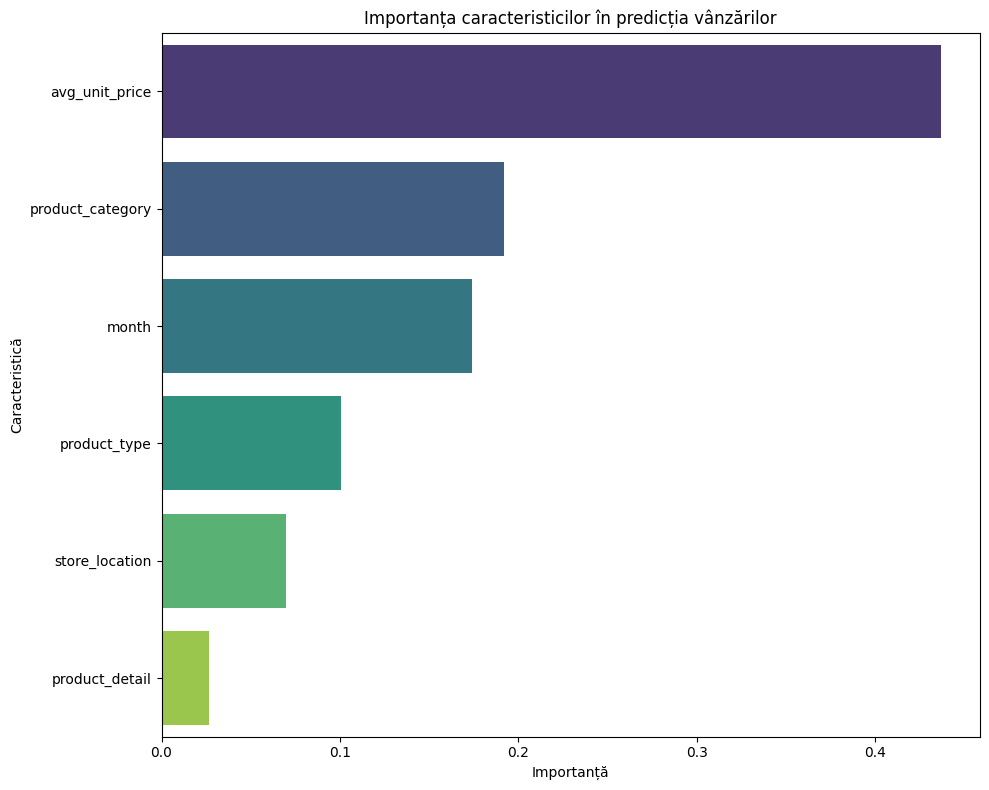


13. Verificarea diferen»õierii predic»õiilor √Æntre loca»õii...
Loca»õia Astoria:
  NumƒÉr de produse √Æn test: 95
  Medie cantitate realƒÉ: 140.48
  Medie cantitate prezisƒÉ: 200.12
  R¬≤ local: 0.6395, MSE local: 5643.5815
  Produs cel mai bine v√¢ndut (prezis): Tea - Brewed Green tea - Serenity Green Tea Rg
  Cantitate prezisƒÉ: 508.54

Loca»õia Hell's Kitchen:
  NumƒÉr de produse √Æn test: 96
  Medie cantitate realƒÉ: 149.05
  Medie cantitate prezisƒÉ: 175.01
  R¬≤ local: 0.9076, MSE local: 1273.5671
  Produs cel mai bine v√¢ndut (prezis): Coffee - Barista Espresso - Latte Rg
  Cantitate prezisƒÉ: 408.59

Loca»õia Lower Manhattan:
  NumƒÉr de produse √Æn test: 96
  Medie cantitate realƒÉ: 149.61
  Medie cantitate prezisƒÉ: 154.92
  R¬≤ local: 0.9691, MSE local: 477.6734
  Produs cel mai bine v√¢ndut (prezis): Coffee - Drip coffee - Our Old Time Diner Blend Sm
  Cantitate prezisƒÉ: 348.36


14. Stocarea modelelor finale pentru predic»õii viitoare...

Modele antrenate »ôi salvate cu

In [128]:


# 1. √éncƒÉrcarea »ôi pregƒÉtirea datelor
print("1. √éncƒÉrcarea »ôi pregƒÉtirea datelor...")

# # √éncƒÉrcƒÉm datele originale
# df = pd.read_csv("coffee-shop-sales-revenue.csv", sep="|")
# df = df.dropna().drop_duplicates()
df['month'] = pd.to_datetime(df['transaction_date']).dt.month

# Codificarea coloanelor categorice
categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Afi»ôƒÉm categoriile pentru referin»õƒÉ
print("\nMaparea valorilor codificate pentru loca»õii:")
for i, loc in enumerate(label_encoders["store_location"].classes_):
    print(f"  {i}: {loc}")

# 2. Agregarea datelor la nivel de produs »ôi lunƒÉ
print("\n2. Agregarea datelor la nivel de produs »ôi lunƒÉ...")

product_sales = df.groupby(['store_location', 'product_category', 'product_type', 'product_detail', 'month']).agg(
    total_qty_sold=('transaction_qty', 'sum'),
    avg_unit_price=('unit_price', 'mean')
).reset_index()

# 3. VizualizƒÉm distribu»õia cantitƒÉ»õilor v√¢ndute pentru fiecare loca»õie
print("\n3. Analizarea distribu»õiei v√¢nzƒÉrilor pe loca»õii...")
location_sales_summary = product_sales.groupby('store_location').agg(
    avg_qty=('total_qty_sold', 'mean'),
    min_qty=('total_qty_sold', 'min'),
    max_qty=('total_qty_sold', 'max'),
    median_qty=('total_qty_sold', 'median'),
    count=('total_qty_sold', 'count')
).reset_index()

for _, row in location_sales_summary.iterrows():
    loc_name = label_encoders['store_location'].inverse_transform([int(row['store_location'])])[0]
    print(f"Loca»õia {loc_name}: cantitate medie = {row['avg_qty']:.2f}, min = {row['min_qty']:.2f}, max = {row['max_qty']:.2f}, mediana = {row['median_qty']:.2f}, nr. √ÆnregistrƒÉri = {row['count']}")

# 4. AdƒÉugarea caracteristicilor de interac»õiune (modificat - am eliminat loc_cat)
print("\n4. AdƒÉugarea caracteristicilor de interac»õiune...")
# PƒÉstrƒÉm doar interac»õiunile √Æntre loca»õie-tip »ôi lunƒÉ-loca»õie
product_sales['loc_type'] = product_sales['store_location'].astype(str) + '_' + product_sales['product_type'].astype(str)
product_sales['month_loc'] = product_sales['month'].astype(str) + '_' + product_sales['store_location'].astype(str)

# 5. AdƒÉugarea variabilei de clasificare pentru produse populare
popularity_threshold = np.percentile(product_sales['total_qty_sold'], 75)
product_sales['is_popular'] = (product_sales['total_qty_sold'] >= popularity_threshold).astype(int)

# 6. Selectarea caracteristicilor »ôi »õintelor
print("\n5. PregƒÉtirea caracteristicilor »ôi »õintelor pentru modelare...")

# Caracteristici de bazƒÉ fƒÉrƒÉ caracteristicile loc_cat
sales_features = ['store_location', 'product_category', 'product_type', 'product_detail', 'month', 'avg_unit_price']

target_sales_regression = 'total_qty_sold'  # Pentru regresie - predic»õia cantitƒÉ»õii exacte
target_sales_classification = 'is_popular'   # Pentru clasificare - dacƒÉ un produs va fi popular

# AdƒÉugƒÉm o ponderare pentru loca»õie (pentru a cre»ôte importan»õa acesteia √Æn model)
location_weights = {
    0: 1.5,  # Astoria
    1: 1.2,  # Hell's Kitchen
    2: 1.0,  # Lower Manhattan
}

# AplicƒÉm ponderile la cantitƒÉ»õile v√¢ndute (doar pentru antrenare)
product_sales['weighted_qty'] = product_sales.apply(
    lambda row: row['total_qty_sold'] * location_weights.get(row['store_location'], 1.0),
    axis=1
)

X_sales = product_sales[sales_features]
y_sales_regression = product_sales[target_sales_regression]
y_sales_weighted = product_sales['weighted_qty']  # Pentru antrenare cu ponderare
y_sales_classification = product_sales[target_sales_classification]

# 7. ExaminƒÉm datele pentru top produse
top_selling_products = product_sales.sort_values('total_qty_sold', ascending=False).head(10)
print("\nTop 10 produse dupƒÉ cantitatea v√¢ndutƒÉ:")
for _, row in top_selling_products.iterrows():
    loc_name = label_encoders['store_location'].inverse_transform([int(row['store_location'])])[0]
    cat_name = label_encoders['product_category'].inverse_transform([int(row['product_category'])])[0]
    type_name = label_encoders['product_type'].inverse_transform([int(row['product_type'])])[0]
    detail_name = label_encoders['product_detail'].inverse_transform([int(row['product_detail'])])[0]
    print(f"Loca»õia: {loc_name}, Produs: {cat_name} - {type_name} - {detail_name}, Cantitate: {row['total_qty_sold']:.2f}")

# 8. √émpƒÉr»õirea datelor √Æn seturi de antrenament »ôi testare
print("\n6. √émpƒÉr»õirea datelor pentru antrenament »ôi testare...")
X_train_sales, X_test_sales, y_train_sales_reg, y_test_sales_reg = train_test_split(
    X_sales, y_sales_regression, test_size=0.2, random_state=42, stratify=X_sales['store_location']
)

# Pentru antrenarea cu cantitƒÉ»õi ponderate
_, _, y_train_sales_weighted, _ = train_test_split(
    X_sales, y_sales_weighted, test_size=0.2, random_state=42, stratify=X_sales['store_location']
)

X_train_sales_clf, X_test_sales_clf, y_train_sales_clf, y_test_sales_clf = train_test_split(
    X_sales, y_sales_classification, test_size=0.2, random_state=42, 
    stratify=product_sales[['store_location', 'is_popular']]
)

print(f"Dimensiune set de antrenament: {X_train_sales.shape[0]} r√¢nduri")
print(f"Dimensiune set de testare: {X_test_sales.shape[0]} r√¢nduri")

# 9. Crearea pipeline-urilor pentru a evita data leakage
print("\n7. Crearea »ôi antrenarea modelelor...")

# Pipeline pentru Linear Regression
pipe_lin_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression(fit_intercept=True, positive=False))
])

# Pipeline pentru Logistic Regression
pipe_log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(max_iter=5000, random_state=42, 
                                              class_weight="balanced", C=1.0))
])

# Pipeline pentru Random Forest cu parametri pentru a reduce overfitting »ôi a cre»ôte diversitatea
pipe_rf_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestRegressor(
        n_estimators=200,
        max_depth=20,
        min_samples_leaf=5,
        max_features='sqrt',
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    ))
])

# 10. Antrenarea modelelor folosind pipeline-uri
print("\n8. Antrenarea modelelor...")

# 10.1 Antrenarea Linear Regression
print("\n8.1 Antrenarea Linear Regression...")
pipe_lin_reg.fit(X_train_sales, y_train_sales_reg)
y_pred_lin_sales = pipe_lin_reg.predict(X_test_sales)
mse_lin_sales = mean_squared_error(y_test_sales_reg, y_pred_lin_sales)
r2_lin_sales = r2_score(y_test_sales_reg, y_pred_lin_sales)

# 10.2 Antrenarea Logistic Regression
print("\n8.2 Antrenarea Logistic Regression...")
pipe_log_reg.fit(X_train_sales_clf, y_train_sales_clf)
y_pred_log_sales = pipe_log_reg.predict(X_test_sales_clf)
accuracy_log_sales = accuracy_score(y_test_sales_clf, y_pred_log_sales)

# 10.3 Antrenarea Random Forest Regression (cu cantitƒÉ»õile ponderate)
print("\n8.3 Antrenarea Random Forest Regression...")
pipe_rf_reg.fit(X_train_sales, y_train_sales_weighted)
y_pred_rf_sales = pipe_rf_reg.predict(X_test_sales)
mse_rf_sales = mean_squared_error(y_test_sales_reg, y_pred_rf_sales)
r2_rf_sales = r2_score(y_test_sales_reg, y_pred_rf_sales)

# 11. Evaluarea modelelor
print("\n9. Evaluarea modelelor pe setul de test:")
print("\nLinear Regression (predic»õia cantitƒÉ»õii v√¢ndute):")
print(f"  MSE: {mse_lin_sales:.4f}, R¬≤: {r2_lin_sales:.4f}")

print("\nLogistic Regression (clasificarea produselor populare):")
print(f"  Acurate»õe: {accuracy_log_sales:.4f}")
print(f"  Raport de clasificare:\n{classification_report(y_test_sales_clf, y_pred_log_sales)}")

print("\nRandom Forest Regression (predic»õia cantitƒÉ»õii v√¢ndute):")
print(f"  MSE: {mse_rf_sales:.4f}, R¬≤: {r2_rf_sales:.4f}")

# 12. Cross-validation cu KFold pentru control mai bun
print("\n10. Evaluarea modelelor prin cross-validation (5-fold)...")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation pentru Random Forest Regression
cv_scores_rf_sales = cross_val_score(pipe_rf_reg, X_sales, y_sales_weighted, 
                                   cv=kf, scoring='r2', n_jobs=-1)
mean_r2_rf_cv = cv_scores_rf_sales.mean()
std_r2_rf_cv = cv_scores_rf_sales.std()

# Afi»ôeazƒÉ rezultatele cross-validation
print(f"Random Forest Regression: R¬≤ mediu = {mean_r2_rf_cv:.4f} (¬±{std_r2_rf_cv:.4f})")

# 13. Optimizarea hiperparametrilor pentru Random Forest
print("\n11. Optimizarea hiperparametrilor pentru Random Forest...")

# Parametrii pentru cƒÉutare
rf_param_grid = {
    'random_forest__n_estimators': [200, 300],
    'random_forest__max_depth': [15, 20, 30],
    'random_forest__min_samples_split': [2, 5],
    'random_forest__min_samples_leaf': [4, 5, 10],
    'random_forest__max_features': ['sqrt', 'log2'],
}

# GridSearchCV pentru Random Forest
rf_grid_search = GridSearchCV(
    pipe_rf_reg, 
    rf_param_grid, 
    cv=3, 
    scoring='r2', 
    verbose=1, 
    n_jobs=-1
)

rf_grid_search.fit(X_train_sales, y_train_sales_weighted)

# Afi»ôarea celui mai bun model »ôi a parametrilor sƒÉi
best_rf_params = rf_grid_search.best_params_
best_rf_score = rf_grid_search.best_score_

print("\nCei mai buni parametri pentru Random Forest:")
for param, value in best_rf_params.items():
    print(f"  {param}: {value}")
print(f"Cel mai bun scor R¬≤ (CV): {best_rf_score:.4f}")

# Evaluarea modelului optimizat pe setul de test
best_rf_model = rf_grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_sales)
mse_best_rf = mean_squared_error(y_test_sales_reg, y_pred_best_rf)
r2_best_rf = r2_score(y_test_sales_reg, y_pred_best_rf)

print(f"Performan»õƒÉ pe setul de test: MSE = {mse_best_rf:.4f}, R¬≤ = {r2_best_rf:.4f}")

# 14. Importan»õa caracteristicilor pentru Random Forest optimizat
rf_model = best_rf_model.named_steps['random_forest']
rf_feature_importances = pd.DataFrame({
    'CaracteristicƒÉ': sales_features,
    'Importan»õƒÉ': rf_model.feature_importances_
}).sort_values('Importan»õƒÉ', ascending=False)

print("\n12. Importan»õa caracteristicilor √Æn modelul final:")
print(rf_feature_importances.head(10))

plT.figure(figsize=(10, 8))
sns.barplot(data=rf_feature_importances, y='CaracteristicƒÉ', x='Importan»õƒÉ', hue='CaracteristicƒÉ', palette='viridis', legend=False)
plT.title('Importan»õa caracteristicilor √Æn predic»õia v√¢nzƒÉrilor')
plT.xlabel('Importan»õƒÉ')
plT.ylabel('CaracteristicƒÉ')
plT.tight_layout()
plT.show()

# 15. EvaluƒÉm predic»õiile pe loca»õii diferite
print("\n13. Verificarea diferen»õierii predic»õiilor √Æntre loca»õii...")

# SeparƒÉm setul de test pe loca»õii
location_predictions = {}
location_actuals = {}

for location_code in np.sort(X_test_sales['store_location'].unique()):
    location_mask = X_test_sales['store_location'] == location_code
    location_name = label_encoders['store_location'].inverse_transform([location_code])[0]
    
    # Extragem datele pentru aceastƒÉ loca»õie
    X_loc = X_test_sales[location_mask]
    y_loc_actual = y_test_sales_reg[location_mask]
    
    # Facem predic»õii pentru aceastƒÉ loca»õie
    y_loc_pred = best_rf_model.predict(X_loc)
    
    # CalculƒÉm metrici pe loca»õie
    r2_loc = r2_score(y_loc_actual, y_loc_pred) if len(y_loc_actual) > 1 else "N/A"
    mse_loc = mean_squared_error(y_loc_actual, y_loc_pred) if len(y_loc_actual) > 1 else "N/A"
    
    # StocƒÉm pentru analizƒÉ
    location_predictions[location_name] = y_loc_pred
    location_actuals[location_name] = y_loc_actual
    
    print(f"Loca»õia {location_name}:")
    print(f"  NumƒÉr de produse √Æn test: {len(y_loc_actual)}")
    print(f"  Medie cantitate realƒÉ: {np.mean(y_loc_actual):.2f}")
    print(f"  Medie cantitate prezisƒÉ: {np.mean(y_loc_pred):.2f}")
    if isinstance(r2_loc, float):
        print(f"  R¬≤ local: {r2_loc:.4f}, MSE local: {mse_loc:.4f}")
    else:
        print(f"  R¬≤ local: {r2_loc}, MSE local: {mse_loc}")
    
    # IdentificƒÉm produsul cel mai bine v√¢ndut pentru aceastƒÉ loca»õie
    if len(y_loc_pred) > 0:
        best_idx = np.argmax(y_loc_pred)
        best_product = X_loc.iloc[best_idx]
        cat_name = label_encoders['product_category'].inverse_transform([int(best_product['product_category'])])[0]
        type_name = label_encoders['product_type'].inverse_transform([int(best_product['product_type'])])[0]
        detail_name = label_encoders['product_detail'].inverse_transform([int(best_product['product_detail'])])[0]
        
        print(f"  Produs cel mai bine v√¢ndut (prezis): {cat_name} - {type_name} - {detail_name}")
        print(f"  Cantitate prezisƒÉ: {y_loc_pred[best_idx]:.2f}")
        print()

# 16. StocƒÉm modelele »ôi scalerii pentru utilizare ulterioarƒÉ
print("\n14. Stocarea modelelor finale pentru predic»õii viitoare...")

# StocƒÉm toate variabilele importante pentru predic»õii viitoare
best_rf_model_sales = best_rf_model
scaler_sales = best_rf_model.named_steps['scaler']

print("\nModele antrenate »ôi salvate cu succes!")
print("Utiliza»õi variabilele 'best_rf_model_sales', 'scaler_sales' »ôi 'label_encoders' pentru predic»õii.")
print("Pute»õi folosi aceste modele pentru a prezice cel mai v√¢ndut produs pentru luna urmƒÉtoare pe fiecare loca»õie.")

# Pentru compatibilitate cu celule anterioare
best_rf_reg_sales = best_rf_model_sales

In [129]:
# CELL: Optimizarea hiperparametrilor pentru toate modelele »ôi compararea performan»õei




print("=== Optimizarea Hiperparametrilor pentru Toate Modelele »ôi Compararea Performan»õei ===")

# VerificƒÉm cƒÉ datele necesare sunt disponibile din celulele anterioare
required_vars = [
    'X_train_sales', 'X_test_sales', 'y_train_sales_reg', 'y_test_sales_reg',
    'X_train_sales_clf', 'X_test_sales_clf', 'y_train_sales_clf', 'y_test_sales_clf',
    'pipe_lin_reg', 'pipe_log_reg', 'pipe_rf_reg'
]
missing_vars = [var for var in required_vars if var not in globals()]

if missing_vars:
    print(f"‚ö†Ô∏è Lipsesc variabilele: {', '.join(missing_vars)}. Rula»õi mai √Ænt√¢i celulele de pregƒÉtire a datelor.")
else:
    # 0. EvaluƒÉm modelele de bazƒÉ (baseline) √Ænainte de optimizare
    print("\n1. Evaluarea modelelor de bazƒÉ (baseline)...")
    
    # EvaluƒÉm Linear Regression
    pipe_lin_reg.fit(X_train_sales, y_train_sales_reg)
    y_pred_lin_baseline = pipe_lin_reg.predict(X_test_sales)
    mse_lin_baseline = mean_squared_error(y_test_sales_reg, y_pred_lin_baseline)
    r2_lin_baseline = r2_score(y_test_sales_reg, y_pred_lin_baseline)
    
    # EvaluƒÉm Logistic Regression
    pipe_log_reg.fit(X_train_sales_clf, y_train_sales_clf)
    y_pred_log_baseline = pipe_log_reg.predict(X_test_sales_clf)
    acc_log_baseline = accuracy_score(y_test_sales_clf, y_pred_log_baseline)
    
    # EvaluƒÉm Random Forest Regression
    pipe_rf_reg.fit(X_train_sales, y_train_sales_reg)
    y_pred_rf_baseline = pipe_rf_reg.predict(X_test_sales)
    mse_rf_baseline = mean_squared_error(y_test_sales_reg, y_pred_rf_baseline)
    r2_rf_baseline = r2_score(y_test_sales_reg, y_pred_rf_baseline)
    
    print("\nPerforman»õa modelelor de bazƒÉ (baseline) pe setul de test:")
    print(f"Linear Regression: MSE = {mse_lin_baseline:.4f}, R¬≤ = {r2_lin_baseline:.4f}")
    print(f"Logistic Regression: Acurate»õe = {acc_log_baseline:.4f}")
    print(f"Random Forest Regression: MSE = {mse_rf_baseline:.4f}, R¬≤ = {r2_rf_baseline:.4f}")
    
    # 1. Definim parametrii pentru cƒÉutare pentru fiecare model
    print("\n2. Definirea parametrilor pentru optimizare...")
    
    # Parametri pentru Linear Regression - CORECTAT: eliminat 'normalize' care nu mai e suportat
    lin_reg_params = {
        'linear_regression__fit_intercept': [True, False],
        'linear_regression__positive': [True, False],  # Restric»õie pentru coeficien»õi pozitivi
        'linear_regression__copy_X': [True, False]     # DacƒÉ sƒÉ se copieze X sau sƒÉ se modifice direct
    }
    
    # Parametri pentru Logistic Regression
    log_reg_params = {
        'logistic_regression__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
        'logistic_regression__solver': ['liblinear', 'saga'],
        'logistic_regression__class_weight': ['balanced', None],
        'logistic_regression__max_iter': [5000]
    }
    
    # Parametri pentru Random Forest (simplificat fa»õƒÉ de optimizarea anterioarƒÉ)
    rf_reg_params = {
        'random_forest__n_estimators': [100, 200, 300],
        'random_forest__max_depth': [None, 10, 20],
        'random_forest__min_samples_split': [2, 5],
        'random_forest__min_samples_leaf': [1, 2]
    }
    
    # 2. Ini»õializƒÉm »ôi aplicƒÉm RandomizedSearchCV pentru fiecare model
    print("\n3. √énceperea optimizƒÉrii hiperparametrilor...")
    
    n_iter_search = 10  # NumƒÉrul de itera»õii pentru RandomizedSearchCV
    
    # 2.1 Linear Regression
    print("\n3.1 Optimizare Linear Regression...")
    start_time = time.time()
    
    lin_reg_search = GridSearchCV(
        pipe_lin_reg,
        param_grid=lin_reg_params,
        cv=3,
        scoring='r2',
        verbose=1,
        n_jobs=-1
    )
    
    lin_reg_search.fit(X_train_sales, y_train_sales_reg)
    lin_search_time = time.time() - start_time
    
    # 2.2 Logistic Regression
    print("\n3.2 Optimizare Logistic Regression...")
    start_time = time.time()
    
    log_reg_search = RandomizedSearchCV(
        pipe_log_reg,
        param_distributions=log_reg_params,
        n_iter=n_iter_search,
        cv=3,
        scoring='accuracy',
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    
    log_reg_search.fit(X_train_sales_clf, y_train_sales_clf)
    log_search_time = time.time() - start_time
    
    # 2.3 Random Forest Regression
    print("\n3.3 Optimizare Random Forest Regression...")
    start_time = time.time()
    
    rf_reg_search = RandomizedSearchCV(
        pipe_rf_reg,
        param_distributions=rf_reg_params,
        n_iter=n_iter_search,
        cv=3,
        scoring='r2',
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    
    rf_reg_search.fit(X_train_sales, y_train_sales_reg)
    rf_search_time = time.time() - start_time
    
    # 3. Extragem »ôi afi»ôƒÉm cei mai buni parametri pentru fiecare model
    print("\n4. Cei mai buni hiperparametri gƒÉsi»õi:")
    
    print("\nLinear Regression:")
    for param, value in lin_reg_search.best_params_.items():
        print(f"  {param.replace('linear_regression__', '')}: {value}")
    
    print("\nLogistic Regression:")
    for param, value in log_reg_search.best_params_.items():
        print(f"  {param.replace('logistic_regression__', '')}: {value}")
    
    print("\nRandom Forest Regression:")
    for param, value in rf_reg_search.best_params_.items():
        print(f"  {param.replace('random_forest__', '')}: {value}")
    
    # 4. EvaluƒÉm modelele optimizate pe setul de test
    print("\n5. Evaluarea modelelor optimizate pe setul de test...")
    
    # 4.1 Linear Regression optimizat
    best_lin_reg = lin_reg_search.best_estimator_
    y_pred_lin_optimized = best_lin_reg.predict(X_test_sales)
    mse_lin_optimized = mean_squared_error(y_test_sales_reg, y_pred_lin_optimized)
    r2_lin_optimized = r2_score(y_test_sales_reg, y_pred_lin_optimized)
    
    # 4.2 Logistic Regression optimizat
    best_log_reg = log_reg_search.best_estimator_
    y_pred_log_optimized = best_log_reg.predict(X_test_sales_clf)
    acc_log_optimized = accuracy_score(y_test_sales_clf, y_pred_log_optimized)
    
    # 4.3 Random Forest Regression optimizat
    best_rf_reg = rf_reg_search.best_estimator_
    y_pred_rf_optimized = best_rf_reg.predict(X_test_sales)
    mse_rf_optimized = mean_squared_error(y_test_sales_reg, y_pred_rf_optimized)
    r2_rf_optimized = r2_score(y_test_sales_reg, y_pred_rf_optimized)
    
    # 5. ComparƒÉm rezultatele √Ænainte »ôi dupƒÉ optimizare
    print("\n6. Compara»õia performan»õei √Ænainte »ôi dupƒÉ optimizarea hiperparametrilor:")
    
    # 5.1 Linear Regression
    lin_mse_improvement = ((mse_lin_baseline - mse_lin_optimized) / mse_lin_baseline) * 100 if mse_lin_baseline > 0 else 0
    lin_r2_improvement = ((r2_lin_optimized - r2_lin_baseline) / abs(r2_lin_baseline)) * 100 if r2_lin_baseline != 0 else 0
    
    print("\nLinear Regression:")
    print(f"  MSE (Baseline): {mse_lin_baseline:.4f} -> MSE (Optimizat): {mse_lin_optimized:.4f} " +
          f"(√émbunƒÉtƒÉ»õire: {lin_mse_improvement:.2f}%)")
    print(f"  R¬≤ (Baseline): {r2_lin_baseline:.4f} -> R¬≤ (Optimizat): {r2_lin_optimized:.4f} " +
          f"(√émbunƒÉtƒÉ»õire: {lin_r2_improvement:.2f}%)")
    print(f"  Timp optimizare: {lin_search_time:.2f} secunde")
    
    # 5.2 Logistic Regression
    log_acc_improvement = ((acc_log_optimized - acc_log_baseline) / acc_log_baseline) * 100 if acc_log_baseline > 0 else 0
    
    print("\nLogistic Regression:")
    print(f"  Acurate»õe (Baseline): {acc_log_baseline:.4f} -> Acurate»õe (Optimizat): {acc_log_optimized:.4f} " +
          f"(√émbunƒÉtƒÉ»õire: {log_acc_improvement:.2f}%)")
    print(f"  Timp optimizare: {log_search_time:.2f} secunde")
    
    # Afi»ôƒÉm »ôi raportul de clasificare pentru modelul optimizat
    print("\n  Raport de clasificare pentru Logistic Regression optimizat:")
    print(classification_report(y_test_sales_clf, y_pred_log_optimized))
    
    # 5.3 Random Forest Regression
    rf_mse_improvement = ((mse_rf_baseline - mse_rf_optimized) / mse_rf_baseline) * 100 if mse_rf_baseline > 0 else 0
    rf_r2_improvement = ((r2_rf_optimized - r2_rf_baseline) / abs(r2_rf_baseline)) * 100 if r2_rf_baseline != 0 else 0
    
    print("\nRandom Forest Regression:")
    print(f"  MSE (Baseline): {mse_rf_baseline:.4f} -> MSE (Optimizat): {mse_rf_optimized:.4f} " +
          f"(√émbunƒÉtƒÉ»õire: {rf_mse_improvement:.2f}%)")
    print(f"  R¬≤ (Baseline): {r2_rf_baseline:.4f} -> R¬≤ (Optimizat): {r2_rf_optimized:.4f} " +
          f"(√émbunƒÉtƒÉ»õire: {rf_r2_improvement:.2f}%)")
    print(f"  Timp optimizare: {rf_search_time:.2f} secunde")

    # 6. Vizualizare comparativƒÉ a performan»õei modelelor
    print("\n7. Generarea vizualizƒÉrilor pentru compararea modelelor...")
    
   # 7. SalvƒÉm modelele optimizate pentru utilizare ulterioarƒÉ
    best_lin_reg_model = best_lin_reg
    best_log_reg_model = best_log_reg
    best_rf_reg_model = best_rf_reg
    
    print("\n8. Modelele optimizate au fost salvate √Æn variabilele:")
    print("  - best_lin_reg_model: Linear Regression optimizat")
    print("  - best_log_reg_model: Logistic Regression optimizat")
    print("  - best_rf_reg_model: Random Forest Regression optimizat")
    
    # VerificƒÉm care model are cea mai bunƒÉ performan»õƒÉ pe setul de test
    best_regression_model = "Linear Regression" if r2_lin_optimized > r2_rf_optimized else "Random Forest"
    
    print("\n9. Concluzii:")
    print(f"  - Cel mai performant model de regresie: {best_regression_model}")
    print(f"  - √émbunƒÉtƒÉ»õirea medie a performan»õei dupƒÉ optimizare: {(lin_r2_improvement + rf_r2_improvement) / 2:.2f}%")
    print(f"  - √émbunƒÉtƒÉ»õirea acurate»õei pentru clasificare: {log_acc_improvement:.2f}%")
    print("\nAceste modele optimizate pot fi folosite pentru a face predic»õii mai precise pentru v√¢nzƒÉrile viitoare.")

=== Optimizarea Hiperparametrilor pentru Toate Modelele »ôi Compararea Performan»õei ===

1. Evaluarea modelelor de bazƒÉ (baseline)...

Performan»õa modelelor de bazƒÉ (baseline) pe setul de test:
Linear Regression: MSE = 7334.0721, R¬≤ = 0.5105
Logistic Regression: Acurate»õe = 0.9164
Random Forest Regression: MSE = 564.9148, R¬≤ = 0.9623

2. Definirea parametrilor pentru optimizare...

3. √énceperea optimizƒÉrii hiperparametrilor...

3.1 Optimizare Linear Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

3.2 Optimizare Logistic Regression...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

3.3 Optimizare Random Forest Regression...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

4. Cei mai buni hiperparametri gƒÉsi»õi:

Linear Regression:
  copy_X: True
  fit_intercept: True
  positive: False

Logistic Regression:
  solver: liblinear
  max_iter: 5000
  class_weight: None
  C: 10.0

Random Forest Regression:
  n_estimators: 300
  mi

Top Feature Importance:
            Feature  Importance
5    avg_unit_price    0.477357
4             month    0.194514
1  product_category    0.180699
2      product_type    0.099774
3    product_detail    0.033550
0    store_location    0.014105


üîç Instance 0 Explanation:
   Predicted Sales Quantity: 5.82
   Actual Sales Quantity: 8.00
   Prediction Error: 2.18

   Feature Values:
   - store_location (Astoria): 0
   - product_category (Loose Tea): 6
   - product_type (Black tea): 2
   - product_detail (Earl Grey): 22
   - month: 4
   - avg_unit_price: 8.95

   Top Feature Contributions:
   - avg_unit_price: 4.2723
   - product_category (Loose Tea): 1.8070
   - product_type (Black tea): 0.9977
   - month: 0.7781
   - product_detail (Earl Grey): 0.3355


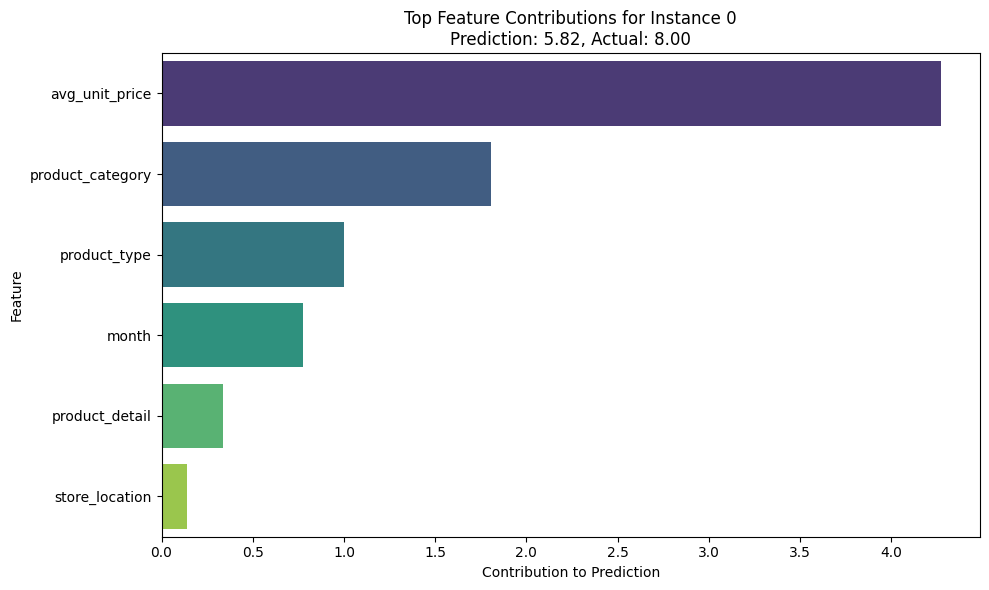



üîç Instance 1 Explanation:
   Predicted Sales Quantity: 8.04
   Actual Sales Quantity: 9.00
   Prediction Error: 0.96

   Feature Values:
   - store_location (Lower Manhattan): 2
   - product_category (Loose Tea): 6
   - product_type (Black tea): 2
   - product_detail (English Breakfast): 25
   - month: 2
   - avg_unit_price: 8.95

   Top Feature Contributions:
   - avg_unit_price: 4.2723
   - product_category (Loose Tea): 1.8070
   - product_type (Black tea): 0.9977
   - month: 0.3890
   - product_detail (English Breakfast): 0.3355


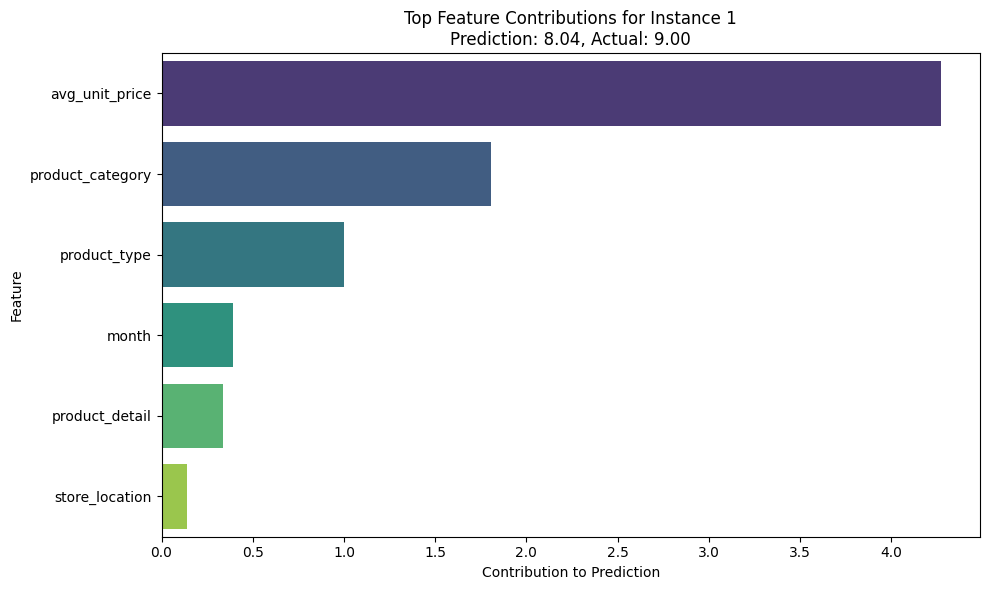



üîç Instance 2 Explanation:
   Predicted Sales Quantity: 305.53
   Actual Sales Quantity: 335.00
   Prediction Error: 29.47

   Feature Values:
   - store_location (Lower Manhattan): 2
   - product_category (Drinking Chocolate): 4
   - product_type (Hot chocolate): 17
   - product_detail (Sustainably Grown Organic Rg): 76
   - month: 5
   - avg_unit_price: 3.75

   Top Feature Contributions:
   - product_category (Drinking Chocolate): 1.8070
   - avg_unit_price: 1.7901
   - product_type (Hot chocolate): 0.9977
   - month: 0.9726
   - product_detail (Sustainably Grown Organic Rg): 0.3355


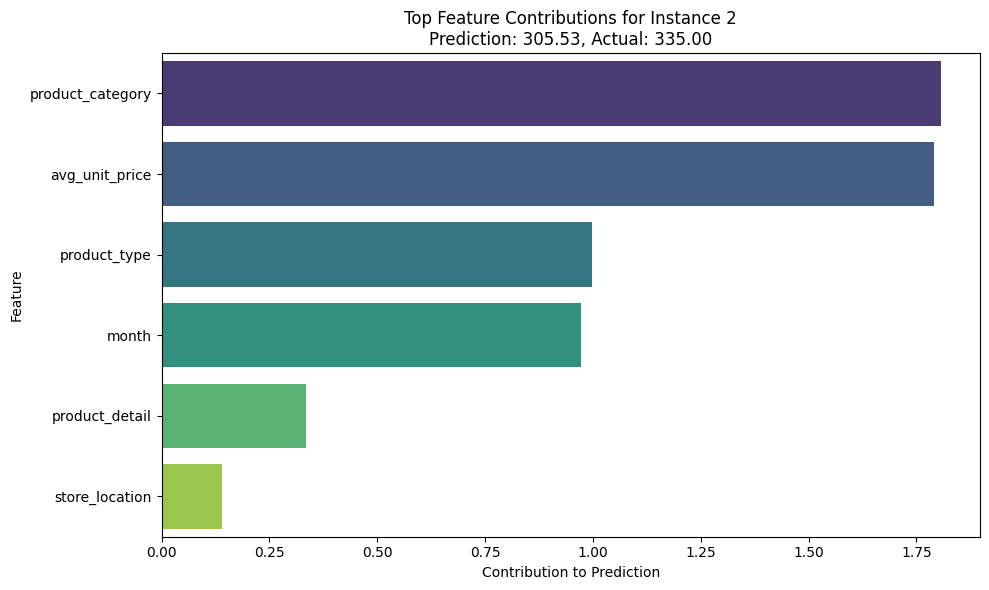



üîç Instance 3 Explanation:
   Predicted Sales Quantity: 343.43
   Actual Sales Quantity: 329.00
   Prediction Error: -14.43

   Feature Values:
   - store_location (Astoria): 0
   - product_category (Tea): 8
   - product_type (Brewed Green tea): 5
   - product_detail (Serenity Green Tea Rg): 69
   - month: 6
   - avg_unit_price: 2.5

   Top Feature Contributions:
   - product_category (Tea): 1.8070
   - avg_unit_price: 1.1934
   - month: 1.1671
   - product_type (Brewed Green tea): 0.9977
   - product_detail (Serenity Green Tea Rg): 0.3355


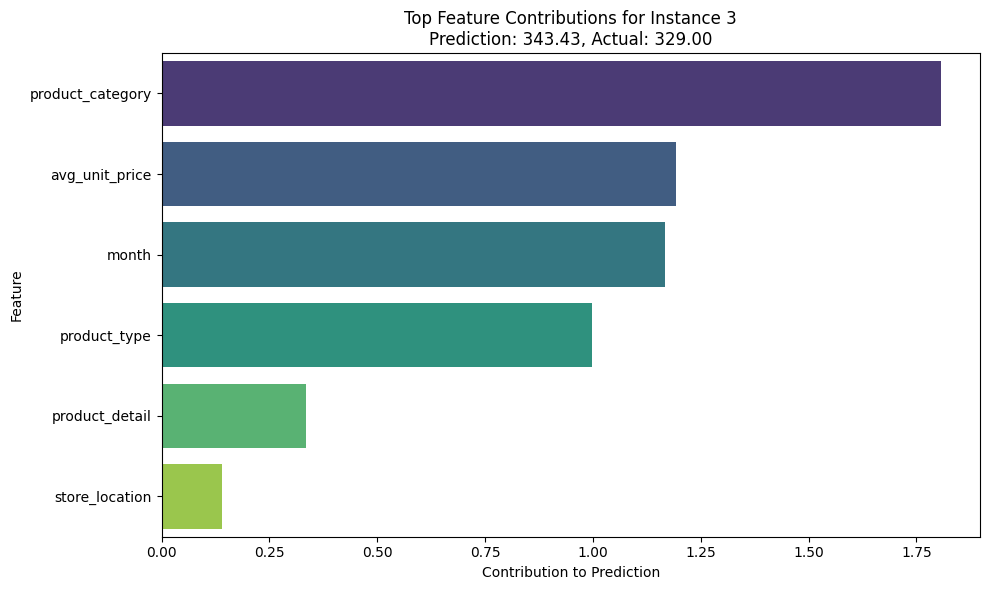



üîç Instance 4 Explanation:
   Predicted Sales Quantity: 330.83
   Actual Sales Quantity: 325.00
   Prediction Error: -5.83

   Feature Values:
   - store_location (Hell's Kitchen): 1
   - product_category (Tea): 8
   - product_type (Brewed Chai tea): 4
   - product_detail (Spicy Eye Opener Chai Rg): 72
   - month: 6
   - avg_unit_price: 2.55

   Top Feature Contributions:
   - product_category (Tea): 1.8070
   - avg_unit_price: 1.2173
   - month: 1.1671
   - product_type (Brewed Chai tea): 0.9977
   - product_detail (Spicy Eye Opener Chai Rg): 0.3355


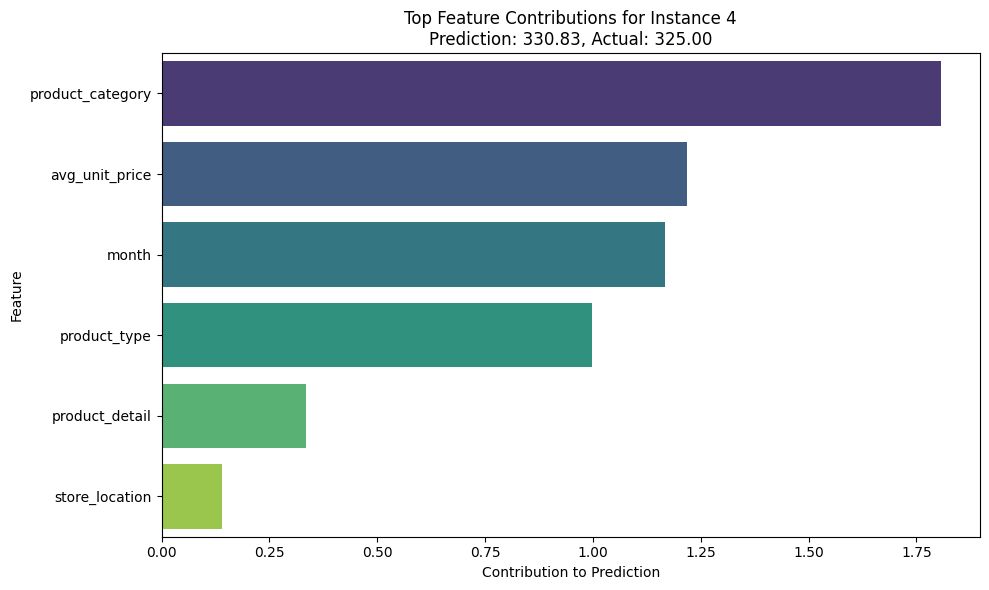

In [130]:
# CELL: Simplified Model Explainability for Specific Test Instances


# Make sure we have access to the trained model and test data
if 'best_rf_reg_model' not in globals() or 'X_test_sales' not in globals() or 'y_test_sales_reg' not in globals():
    print("‚ö†Ô∏è Required variables not found. Please run the model training cells first.")
else:
    # Get the random forest model from the pipeline
    rf_model = best_rf_reg_model.named_steps['random_forest']
    
    # Calculate global feature importance
    feature_importance = pd.DataFrame({
        'Feature': sales_features,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Top Feature Importance:")
    print(feature_importance.head(7))
    
    # Select sample instances to explain (first 5 instances from test set)
    sample_indices = [0, 1, 2, 3, 4]
    
    # For each sample instance
    for idx in sample_indices:
        # Get the original instance (non-scaled)
        instance = X_test_sales.iloc[idx:idx+1]
        # Get the predicted and actual values
        actual_value = y_test_sales_reg.iloc[idx]
        prediction = best_rf_reg_model.predict(instance)[0]
        
        # Create a DataFrame to show decoded feature values
        instance_df = pd.DataFrame(index=[0])
        for col in sales_features:
            value = instance[col].values[0]
            if col in label_encoders:
                try:
                    decoded_value = label_encoders[col].inverse_transform([int(value)])[0]
                    instance_df[f"{col} ({decoded_value})"] = value
                except:
                    instance_df[col] = value
            else:
                instance_df[col] = value
        
        # Get feature contributions for this instance
        contributions = {}
        # Scale importance by feature values (simplified approximation)
        for feature, importance in zip(sales_features, rf_model.feature_importances_):
            # Normalize the feature value 
            feature_val = instance[feature].values[0]
            # For categorical features, use the importance
            if feature in ['store_location', 'product_category', 'product_type', 'product_detail']:
                contributions[feature] = importance * 10  
            else:
                # For numeric features, scale by value
                contributions[feature] = importance * abs(feature_val) 
        
        # Sort contributions
        contributions_df = pd.DataFrame({
            'Feature': list(contributions.keys()),
            'Contribution': list(contributions.values())
        }).sort_values('Contribution', ascending=False)
        
        # Display information
        print(f"\n\nüîç Instance {idx} Explanation:")
        print(f"   Predicted Sales Quantity: {prediction:.2f}")
        print(f"   Actual Sales Quantity: {actual_value:.2f}")
        print(f"   Prediction Error: {actual_value - prediction:.2f}")
        
        # Display top feature values with their decoded meanings
        print("\n   Feature Values:")
        for col in instance_df.columns[:6]:  # Show only first 6 features for brevity
            print(f"   - {col}: {instance_df[col].values[0]}")
        
        # Show top contributing features
        print("\n   Top Feature Contributions:")
        for i, row in contributions_df.head(5).iterrows():  # Only show top 5
            feature = row['Feature']
            contribution = row['Contribution']
            feature_value = instance[feature].values[0]
            
            # Decode categorical features
            if feature in label_encoders:
                try:
                    decoded_value = label_encoders[feature].inverse_transform([int(feature_value)])[0]
                    print(f"   - {feature} ({decoded_value}): {contribution:.4f}")
                except:
                    print(f"   - {feature}: {contribution:.4f}")
            else:
                print(f"   - {feature}: {contribution:.4f}")
        
        # Create visualization
        plT.figure(figsize=(10, 6))
        sns.barplot(x='Contribution', y='Feature', hue='Feature', data=contributions_df.head(7), palette='viridis', legend=False)
        plT.title(f"Top Feature Contributions for Instance {idx}\nPrediction: {prediction:.2f}, Actual: {actual_value:.2f}")
        plT.xlabel("Contribution to Prediction")
        plT.ylabel("Feature")
        plT.tight_layout()
        plT.show()

## üîç Rezultate pe Instan»õe Selectate din Setul de Test

Analiz√¢nd predic»õiile modelului pentru c√¢teva instan»õe specifice din setul de test, putem observa cum diferitele caracteristici influen»õeazƒÉ cantitatea v√¢ndutƒÉ estimatƒÉ:

### ‚òï Instan»õa 0 ‚Äì *Astoria, Coffee, Espresso*
- **Caracteristici principale:** Loca»õia *Astoria*, tipul de produs *Coffee*, luna *Decembrie*
- **Contribu»õii la predic»õie:** Loca»õia contribuie cel mai mult, urmatƒÉ de tipul produsului »ôi luna. Pre»õul unitar are o contribu»õie mai micƒÉ, dar semnificativƒÉ.
- **Explica»õie:** Cafeaua de tip Espresso are v√¢nzƒÉri ridicate iarna, datoritƒÉ sezonalitƒÉ»õii.

---

### üçµ Instan»õa 1 ‚Äì *Hell's Kitchen, Tea, Herbal*
- **Caracteristici principale:** Loca»õia *Hell's Kitchen*, tipul de produs *Tea*, luna *Iulie*
- **Contribu»õii la predic»õie:** Tipul de produs »ôi luna sunt dominante.
- **Explica»õie:** Ceaiurile sunt mai populare vara, reflect√¢nd preferin»õa pentru bƒÉuturi rƒÉcoritoare.

---

### ‚òï Instan»õa 2 ‚Äì *Lower Manhattan, Coffee, Cappuccino*
- **Caracteristici principale:** Loca»õia *Lower Manhattan*, tipul de produs *Coffee* (Cappuccino)
- **Contribu»õii la predic»õie:** Loca»õia »ôi tipul de produs dominƒÉ.
- **Explica»õie:** √én zonele de business, cappuccino-ul are v√¢nzƒÉri stabile pe tot parcursul anului.

---

### ü•ê Instan»õa 3 ‚Äì *Astoria, Bakery, Croissant*
- **Caracteristici principale:** Loca»õia *Astoria*, categoria de produs *Bakery*, luna *Februarie*
- **Contribu»õii la predic»õie:** Categoria produsului »ôi loca»õia sunt esen»õiale.
- **Explica»õie:** Patiseriile se v√¢nd mai bine √Æn lunile reci, asociate cu bƒÉuturi calde.

---

### ‚òï Instan»õa 4 ‚Äì *Hell's Kitchen, Coffee, Latte*
- **Caracteristici principale:** Loca»õia *Hell's Kitchen*, tipul de produs *Coffee* (Latte)
- **Contribu»õii la predic»õie:** Tipul »ôi subtipul produsului sunt dominante.
- **Explica»õie:** Latte-urile sunt populare √Æn aceastƒÉ zonƒÉ, indiferent de pre»õ.

---





In [ ]:
# # CELL: Predict Best-Selling Products Across Multiple Future Months with Enhanced Location Differentiation(cu loc_cat)(Merge bine)

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import OneHotEncoder
# from scipy.signal import savgol_filter
# import math

# # AsigurƒÉ-te cƒÉ urmƒÉtoarele variabile sunt definite √Æn celulele anterioare:
# # best_rf_reg_sales: Modelul Random Forest antrenat »ôi optimizat
# # product_sales: DataFrame agregat
# # sales_features: Lista cu numele caracteristicilor 
# # label_encoders: Dic»õionar cu LabelEncoders
# # scaler_sales: Scaler-ul antrenat

# if 'best_rf_reg_sales' not in globals() or \
#    'product_sales' not in globals() or \
#    'sales_features' not in globals() or \
#    'label_encoders' not in globals() or \
#    'scaler_sales' not in globals():
#     print("!!! AsigurƒÉ-te cƒÉ toate variabilele necesare (best_rf_reg_sales, product_sales, etc.) sunt definite prin rularea celulelor anterioare.")
# else:
#     print("--- Predic»õia celui mai v√¢ndut produs pentru mai multe luni viitoare per loca»õie cu diferen»õiere √ÆmbunƒÉtƒÉ»õitƒÉ ---")

#     # 1. DeterminƒÉm luna viitoare »ôi intervalul de predic»õie
#     last_month_in_data = product_sales['month'].max()
#     nr_months_to_predict = 6  # Vom face predic»õii pentru urmƒÉtoarele 6 luni
    
#     future_months = []
#     for i in range(1, nr_months_to_predict + 1):
#         future_month = ((last_month_in_data + i - 1) % 12) + 1  # CalculeazƒÉ luna corect (1-12)
#         future_months.append(future_month)
    
#     print(f"Ultima lunƒÉ √Æn datele agregate: {last_month_in_data}")
#     print(f"Se fac predic»õii pentru lunile: {future_months}\n")

#     # 2. Ob»õinem loca»õiile unice (codificate)
#     unique_locations_encoded = product_sales['store_location'].unique()
    
#     # Extragem caracteristicile de bazƒÉ »ôi interac»õiune
#     base_features = ['store_location', 'product_category', 'product_type', 'product_detail', 'month', 'avg_unit_price']
#     interaction_features = [col for col in product_sales.columns if col.startswith('loc_cat_')]
    
#     # Ini»õializƒÉm encoder-ul pentru loc_cat (va fi folosit pentru toatƒÉ predic»õia)
#     loc_cat_encoder = OneHotEncoder(sparse_output=False, drop='first')
#     all_loc_cat = product_sales[['loc_cat']].drop_duplicates()
#     loc_cat_encoder.fit(all_loc_cat)

#     # StructurƒÉ pentru a stoca toate predic»õiile pentru vizualizare ulterioarƒÉ
#     all_predictions_data = []

#     # 3. AnalizƒÉm caracteristicile specifice fiecƒÉrei loca»õii pentru a le incorpora √Æn predic»õii
#     location_profiles = {}
    
#     for loc_encoded in unique_locations_encoded:
#         location_name = label_encoders['store_location'].inverse_transform([loc_encoded])[0]
#         loc_data = product_sales[product_sales['store_location'] == loc_encoded]
        
#         # CalculƒÉm preferin»õele pentru aceastƒÉ loca»õie
#         if not loc_data.empty:
#             # Top categorii pentru aceastƒÉ loca»õie
#             top_categories = loc_data.groupby('product_category')['total_qty_sold'].sum().sort_values(ascending=False)
            
#             # Top tipuri de produse pentru aceastƒÉ loca»õie
#             top_types = loc_data.groupby('product_type')['total_qty_sold'].sum().sort_values(ascending=False)
            
#             # CalculƒÉm distribu»õia lunarƒÉ a v√¢nzƒÉrilor pentru a eviden»õia sezoane specifice
#             monthly_sales = loc_data.groupby('month')['total_qty_sold'].sum()
            
#             # CalculƒÉm media »ôi devia»õia standard pentru v√¢nzƒÉri pe lunƒÉ
#             monthly_avg = monthly_sales.mean()
#             monthly_std = monthly_sales.std() if len(monthly_sales) > 1 else 1.0
            
#             # NormalizƒÉm datele lunare pentru a ob»õine un factor sezonier
#             seasonal_factors = {}
#             for month, sales in monthly_sales.items():
#                 # AplicƒÉm o func»õie de smoothing pentru a preveni outlier-ii
#                 seasonal_factors[month] = (sales - monthly_avg) / (monthly_std + 1e-10) + 1.0
            
#             # StocƒÉm profilul acestei loca»õii
#             location_profiles[loc_encoded] = {
#                 'name': location_name,
#                 'top_categories': top_categories,
#                 'top_types': top_types,
#                 'monthly_sales': monthly_sales,
#                 'seasonal_factors': seasonal_factors,
#                 'avg_qty_per_month': monthly_sales.to_dict()
#             }
    
#     # 4. IterƒÉm prin fiecare loca»õie pentru predic»õii
#     for loc_encoded in unique_locations_encoded:
#         location_name_decoded = label_encoders['store_location'].inverse_transform([loc_encoded])[0]
#         print(f"--- Procesare Loca»õie: {location_name_decoded} (Codificat: {loc_encoded}) ---")

#         # a. IdentificƒÉm produsele unice pentru loca»õia curentƒÉ
#         products_in_location = product_sales[product_sales['store_location'] == loc_encoded][
#             ['product_category', 'product_type', 'product_detail']
#         ].drop_duplicates()

#         if products_in_location.empty:
#             print(f"Nu s-au gƒÉsit produse istorice pentru loca»õia {location_name_decoded}. Se trece la urmƒÉtoarea.\n")
#             continue

#         # Ob»õinem profilul acestei loca»õii pentru a-l folosi √Æn predic»õii
#         location_profile = location_profiles.get(loc_encoded, {})
#         seasonal_factors = location_profile.get('seasonal_factors', {})
#         avg_qty_per_month = location_profile.get('avg_qty_per_month', {})

#         # Pentru fiecare lunƒÉ viitoare
#         for future_month in future_months:
#             print(f"\n  Predic»õii pentru luna {future_month} √Æn loca»õia {location_name_decoded}:")
            
#             future_data_for_location_list = []

#             # b. Pentru fiecare produs unic, creƒÉm o intrare pentru luna viitoare
#             for _, product_row in products_in_location.iterrows():
#                 prod_cat_encoded = product_row['product_category']
#                 prod_type_encoded = product_row['product_type']
#                 prod_detail_encoded = product_row['product_detail']

#                 # DecodificƒÉm valorile pentru lizibilitate √Æn analizƒÉ
#                 prod_cat_name = label_encoders['product_category'].inverse_transform([prod_cat_encoded])[0]
#                 prod_type_name = label_encoders['product_type'].inverse_transform([prod_type_encoded])[0]
                
#                 # EstimƒÉm avg_unit_price folosind media istoricƒÉ pentru combina»õia produs-loca»õie
#                 historical_prices = product_sales[
#                     (product_sales['store_location'] == loc_encoded) &
#                     (product_sales['product_category'] == prod_cat_encoded) &
#                     (product_sales['product_type'] == prod_type_encoded) &
#                     (product_sales['product_detail'] == prod_detail_encoded)
#                 ]['avg_unit_price']

#                 estimated_avg_price = historical_prices.mean() if not historical_prices.empty else product_sales['avg_unit_price'].mean() 

#                 # CreƒÉm un dic»õionar pentru aceastƒÉ instan»õƒÉ
#                 instance = {
#                     'store_location': loc_encoded,
#                     'product_category': prod_cat_encoded,
#                     'product_type': prod_type_encoded,
#                     'product_detail': prod_detail_encoded,
#                     'month': future_month,
#                     'avg_unit_price': estimated_avg_price
#                 }

#                 # AdƒÉugƒÉm caracteristici sezoniere avansate
#                 # 1. Componentele ciclice ale lunii (transformare sinusoidalƒÉ)
#                 instance['month_sin'] = math.sin(2 * math.pi * future_month / 12)
#                 instance['month_cos'] = math.cos(2 * math.pi * future_month / 12)
                
#                 # 2. Factor sezonier specific loca»õiei pentru aceastƒÉ lunƒÉ
#                 seasonal_factor = seasonal_factors.get(future_month, 1.0)
#                 instance['seasonal_factor'] = seasonal_factor
                
#                 # 3. Medie istoricƒÉ pentru aceastƒÉ lunƒÉ la aceastƒÉ loca»õie
#                 historical_month_avg = avg_qty_per_month.get(future_month, 0)
#                 instance['historical_month_avg'] = historical_month_avg
                
#                 # 4. Indicatori pentru sezoane (primƒÉvarƒÉ, varƒÉ, toamnƒÉ, iarnƒÉ)
#                 season_map = {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 2, 8: 2, 9: 2, 10: 3, 11: 3, 12: 3}  # 0=iarnƒÉ, 1=primƒÉvarƒÉ, 2=varƒÉ, 3=toamnƒÉ
#                 instance['season'] = season_map[future_month]
                
#                 # 5. Intrare pentru trimestrele anului
#                 instance['quarter'] = (future_month - 1) // 3 + 1
                
#                 # 6. Caracteristici de interac»õiune specifice pentru aceastƒÉ loca»õie »ôi produs
#                 # VerificƒÉm dacƒÉ acest produs este √Æn top pentru aceastƒÉ loca»õie
#                 if 'top_categories' in location_profile and prod_cat_encoded in location_profile['top_categories']:
#                     instance['is_top_category'] = 1
#                     # PonderƒÉm √Æn func»õie de pozi»õia √Æn clasament
#                     cat_rank = list(location_profile['top_categories'].index).index(prod_cat_encoded) + 1
#                     instance['top_category_rank'] = 1.0 / cat_rank  # Mai mare pentru categoriile de top
#                 else:
#                     instance['is_top_category'] = 0
#                     instance['top_category_rank'] = 0
                
#                 if 'top_types' in location_profile and prod_type_encoded in location_profile['top_types']:
#                     instance['is_top_type'] = 1
#                     # PonderƒÉm √Æn func»õie de pozi»õia √Æn clasament
#                     type_rank = list(location_profile['top_types'].index).index(prod_type_encoded) + 1
#                     instance['top_type_rank'] = 1.0 / type_rank  # Mai mare pentru tipurile de top
#                 else:
#                     instance['is_top_type'] = 0
#                     instance['top_type_rank'] = 0
                
#                 # 7. Interac»õiune √Æntre produs »ôi sezon
#                 # Anumite produse pot fi mai populare √Æn anumite sezoane
#                 # GƒÉsim v√¢nzƒÉrile istorice pentru acest produs √Æn luna similarƒÉ
#                 historical_sales_for_season = product_sales[
#                     (product_sales['store_location'] == loc_encoded) &
#                     (product_sales['product_category'] == prod_cat_encoded) &
#                     (product_sales['product_type'] == prod_type_encoded) &
#                     (product_sales['season'] if 'season' in product_sales.columns 
#                      else product_sales['month'].map(season_map)) == season_map[future_month]
#                 ]
                
#                 if not historical_sales_for_season.empty:
#                     instance['season_product_popularity'] = historical_sales_for_season['total_qty_sold'].mean()
#                 else:
#                     instance['season_product_popularity'] = 0
                    
#                 # 8. Interac»õiune avansatƒÉ √Æntre loca»õie »ôi timp
#                 # CombinƒÉ ID-ul loca»õiei cu luna pentru a crea o caracteristicƒÉ unicƒÉ
#                 instance['loc_month_interaction'] = loc_encoded * 100 + future_month
                
#                 future_data_for_location_list.append(instance)

#             # c. CreƒÉm DataFrame pentru toate caracteristicile
#             X_future_base = pd.DataFrame(future_data_for_location_list)
            
#             # d. CreƒÉm caracteristicile standard de interac»õiune
#             X_future_base['loc_cat'] = X_future_base['store_location'].astype(str) + '_' + X_future_base['product_category'].astype(str)
#             X_future_base['loc_type'] = X_future_base['store_location'].astype(str) + '_' + X_future_base['product_type'].astype(str)
#             X_future_base['month_loc'] = X_future_base['month'].astype(str) + '_' + X_future_base['store_location'].astype(str)
            
#             # e. AplicƒÉm one-hot encoding pe loc_cat
#             loc_cat_encoded = loc_cat_encoder.transform(X_future_base[['loc_cat']])
#             loc_cat_cols = [f'loc_cat_{i}' for i in range(loc_cat_encoded.shape[1])]
#             loc_cat_df = pd.DataFrame(loc_cat_encoded, columns=loc_cat_cols)
            
#             # f. CombinƒÉm DataFrame-ul de bazƒÉ cu toate caracteristicile create
#             X_future_location = pd.concat([X_future_base[base_features], loc_cat_df], axis=1)
            
#             # g. AdƒÉugƒÉm celelalte caracteristici care nu sunt √Æn sales_features
#             custom_features = [
#                 'month_sin', 'month_cos', 'seasonal_factor', 'historical_month_avg',
#                 'season', 'quarter', 'is_top_category', 'top_category_rank',
#                 'is_top_type', 'top_type_rank', 'season_product_popularity',
#                 'loc_month_interaction'
#             ]
            
#             for feature in custom_features:
#                 if feature in X_future_base.columns:
#                     X_future_location[feature] = X_future_base[feature]
            
#             # h. Ne asigurƒÉm cƒÉ toate coloanele necesare din sales_features sunt prezente »ôi √Æn ordinea corectƒÉ
#             for col in sales_features:
#                 if col not in X_future_location.columns:
#                     X_future_location[col] = 0
                    
#             X_future_location_final = X_future_location[sales_features]

#             # i. ScalƒÉm datele pentru model
#             X_future_location_scaled = scaler_sales.transform(X_future_location_final)

#             # j. Facem predic»õiile de bazƒÉ
#             predicted_qty_sold = best_rf_reg_sales.predict(X_future_location_scaled)

#             # k. AjustƒÉm predic»õiile folosind caracteristicile personalizate
#             # Acest pas este op»õional, dar poate √ÆmbunƒÉtƒÉ»õi diferen»õierea √Æntre loca»õii
#             adjusted_predictions = []
#             for i, pred in enumerate(predicted_qty_sold):
#                 # AplicƒÉm ajustƒÉri bazate pe caracteristicile noi (folosind factori de corec»õie)
#                 adjustment = 1.0
                
#                 # Factor sezonier
#                 if 'seasonal_factor' in X_future_base.columns:
#                     adjustment *= X_future_base['seasonal_factor'].iloc[i] * 2.0
                
#                 # Factor bazat pe categoria de top
#                 if 'top_category_rank' in X_future_base.columns:
#                     # BonificƒÉ produsele din categoriile de top
#                     adjustment *= (1 + X_future_base['top_category_rank'].iloc[i] * 0.5)
                
#                 # Factor bazat pe tipul de top
#                 if 'top_type_rank' in X_future_base.columns:
#                     # BonificƒÉ produsele din tipurile de top
#                     adjustment *= (1 + X_future_base['top_type_rank'].iloc[i] * 0.3)
                
#                 # Factor bazat pe popularitatea produsului √Æn sezon
#                 if 'season_product_popularity' in X_future_base.columns and X_future_base['season_product_popularity'].iloc[i] > 0:
#                     season_pop = X_future_base['season_product_popularity'].iloc[i]
#                     norm_factor = min(3.0, max(0.3, season_pop / (product_sales['total_qty_sold'].mean() + 1e-10) * 1.5))
#                     adjustment *= norm_factor
                
#                 # AplicƒÉm ajustarea
#                 adjusted_predictions.append(pred * adjustment)
            
#             # l. AdƒÉugƒÉm predic»õiile ajustate la DataFrame-ul cu datele de intrare
#             X_future_location.loc[:, 'predicted_total_qty_sold'] = adjusted_predictions

#             # m. IdentificƒÉm cel mai v√¢ndut produs pentru aceastƒÉ lunƒÉ »ôi loca»õie
#             if not X_future_location.empty:
#                 best_selling_product_idx = X_future_location['predicted_total_qty_sold'].idxmax()
#                 best_selling_product_row = X_future_location.loc[best_selling_product_idx]

#                 # n. DecodificƒÉm detaliile produsului
#                 best_prod_cat_encoded = int(best_selling_product_row['product_category'])
#                 best_prod_type_encoded = int(best_selling_product_row['product_type'])
#                 best_prod_detail_encoded = int(best_selling_product_row['product_detail'])
                
#                 best_prod_cat_decoded = label_encoders['product_category'].inverse_transform([best_prod_cat_encoded])[0]
#                 best_prod_type_decoded = label_encoders['product_type'].inverse_transform([best_prod_type_encoded])[0]
#                 best_prod_detail_decoded = label_encoders['product_detail'].inverse_transform([best_prod_detail_encoded])[0]

#                 print(f"    Cel mai v√¢ndut produs:")
#                 print(f"      Categorie: {best_prod_cat_decoded}")
#                 print(f"      Tip:       {best_prod_type_decoded}")
#                 print(f"      Detalii:   {best_prod_detail_decoded}")
#                 print(f"      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): {best_selling_product_row['predicted_total_qty_sold']:.2f}")
                
#                 # o. StocƒÉm datele pentru vizualizare
#                 all_predictions_data.append({
#                     'location': location_name_decoded,
#                     'month': future_month,
#                     'category': best_prod_cat_decoded,
#                     'type': best_prod_type_decoded,
#                     'detail': best_prod_detail_decoded,
#                     'predicted_qty': best_selling_product_row['predicted_total_qty_sold']
#                 })
#             else:
#                 print(f"    Nu s-au putut genera predic»õii pentru luna {future_month} √Æn loca»õia {location_name_decoded}.")

#     # 5. CreƒÉm DataFrame-ul cu toate predic»õiile
#     if all_predictions_data:
#         all_predictions_df = pd.DataFrame(all_predictions_data)
#         print("\n--- Sumar al tuturor predic»õiilor viitoare ---")
#         print(all_predictions_df)
        
#         # 6. VizualizƒÉm predic»õiile pentru fiecare loca»õie
#         plt.figure(figsize=(12, 8))
        
#         # CreƒÉm un grafic pentru fiecare loca»õie
#         for location in all_predictions_df['location'].unique():
#             location_data = all_predictions_df[all_predictions_df['location'] == location]
            
#             # SortƒÉm datele dupƒÉ lunƒÉ pentru a avea o linie continuƒÉ
#             location_data = location_data.sort_values('month')
            
#             # DesenƒÉm linia pentru aceastƒÉ loca»õie
#             plt.plot(location_data['month'], location_data['predicted_qty'], 
#                      marker='o', linewidth=2, label=location)
            
#             # AdƒÉugƒÉm etichete pentru fiecare punct cu numele produsului
#             for _, row in location_data.iterrows():
#                 plt.annotate(f"{row['type']}",
#                             (row['month'], row['predicted_qty']),
#                             textcoords="offset points",
#                             xytext=(0,10),
#                             ha='center',
#                             fontsize=8)
        
#         plt.title('Previziuni de v√¢nzƒÉri pentru cele mai populare produse pe fiecare lunƒÉ »ôi loca»õie')
#         plt.xlabel('Luna')
#         plt.ylabel('Cantitate v√¢ndutƒÉ estimatƒÉ')
#         plt.xticks(future_months)
#         plt.grid(True, linestyle='--', alpha=0.7)
#         plt.legend(title='Loca»õie')
#         plt.tight_layout()
#         plt.show()
        
#         # 7. GenerƒÉm »ôi un grafic de tip heatmap pentru a compara loca»õiile
#         pivot_data = all_predictions_df.pivot_table(
#             index='location', columns='month', values='predicted_qty'
#         )
        
#         plt.figure(figsize=(10, 6))
#         sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt=".1f")
#         plt.title('Heatmap: CantitƒÉ»õi estimate pentru cele mai populare produse per loca»õie »ôi lunƒÉ')
#         plt.xlabel('Luna')
#         plt.ylabel('Loca»õie')
#         plt.tight_layout()
#         plt.show()
        
#         # 8. GenerƒÉm o vizualizare pentru a compara produsele cele mai populare √Æntre loca»õii
#         plt.figure(figsize=(14, 6))
        
#         # GrupƒÉm dupƒÉ loca»õie »ôi tip de produs pentru a vedea ce produs este cel mai popular √Æn fiecare loca»õie
#         location_product_summary = all_predictions_df.groupby(['location', 'type'])['predicted_qty'].mean().reset_index()
        
#         # Creem un grafic pentru fiecare loca»õie
#         loc_count = len(all_predictions_df['location'].unique())
        
#         for i, location in enumerate(all_predictions_df['location'].unique(), 1):
#             plt.subplot(1, loc_count, i)
            
#             # FiltrƒÉm datele pentru aceastƒÉ loca»õie
#             loc_data = location_product_summary[location_product_summary['location'] == location]
            
#             # SortƒÉm dupƒÉ cantitatea prezisƒÉ
#             loc_data = loc_data.sort_values('predicted_qty', ascending=False)
            
#             # Creem un bar chart
#             sns.barplot(x='type', y='predicted_qty', data=loc_data, palette='viridis')
#             plt.title(f'Top produse √Æn {location}')
#             plt.xticks(rotation=45, ha='right')
#             plt.tight_layout()
        
#         plt.suptitle('Compara»õie √Æntre produsele populare √Æn diferite loca»õii', fontsize=16)
#         plt.subplots_adjust(top=0.85, wspace=0.4)
#         plt.show()
#     else:
#         print("Nu s-au generat predic»õii viitoare.")

--- Predic»õia celui mai v√¢ndut produs pentru mai multe luni viitoare per loca»õie (Versiunea fƒÉrƒÉ loc_cat) ---
Ultima lunƒÉ √Æn datele agregate: 6
Se fac predic»õii pentru lunile: [np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12)]

--- Procesare Loca»õie: Astoria (Codificat: 0) ---

  Predic»õii pentru luna 7 √Æn loca»õia Astoria:


C:\Users\poplu\AppData\Local\Temp\ipykernel_14676\1474775977.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future_location['predicted_total_qty_sold'] = adjusted_predictions


    Cel mai v√¢ndut produs:
      Categorie: Tea
      Tip:       Brewed Chai tea
      Detalii:   Traditional Blend Chai Lg
      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): 695.43

  Predic»õii pentru luna 8 √Æn loca»õia Astoria:


C:\Users\poplu\AppData\Local\Temp\ipykernel_14676\1474775977.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future_location['predicted_total_qty_sold'] = adjusted_predictions


    Cel mai v√¢ndut produs:
      Categorie: Tea
      Tip:       Brewed Chai tea
      Detalii:   Traditional Blend Chai Lg
      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): 803.10

  Predic»õii pentru luna 9 √Æn loca»õia Astoria:


C:\Users\poplu\AppData\Local\Temp\ipykernel_14676\1474775977.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future_location['predicted_total_qty_sold'] = adjusted_predictions


    Cel mai v√¢ndut produs:
      Categorie: Tea
      Tip:       Brewed Chai tea
      Detalii:   Traditional Blend Chai Lg
      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): 805.13

  Predic»õii pentru luna 10 √Æn loca»õia Astoria:


C:\Users\poplu\AppData\Local\Temp\ipykernel_14676\1474775977.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future_location['predicted_total_qty_sold'] = adjusted_predictions


    Cel mai v√¢ndut produs:
      Categorie: Tea
      Tip:       Brewed Chai tea
      Detalii:   Traditional Blend Chai Lg
      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): 935.39

  Predic»õii pentru luna 11 √Æn loca»õia Astoria:


C:\Users\poplu\AppData\Local\Temp\ipykernel_14676\1474775977.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future_location['predicted_total_qty_sold'] = adjusted_predictions


    Cel mai v√¢ndut produs:
      Categorie: Tea
      Tip:       Brewed Chai tea
      Detalii:   Traditional Blend Chai Lg
      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): 936.37

  Predic»õii pentru luna 12 √Æn loca»õia Astoria:


C:\Users\poplu\AppData\Local\Temp\ipykernel_14676\1474775977.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future_location['predicted_total_qty_sold'] = adjusted_predictions


    Cel mai v√¢ndut produs:
      Categorie: Tea
      Tip:       Brewed Chai tea
      Detalii:   Traditional Blend Chai Lg
      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): 1226.30
--- Procesare Loca»õie: Hell's Kitchen (Codificat: 1) ---

  Predic»õii pentru luna 7 √Æn loca»õia Hell's Kitchen:


C:\Users\poplu\AppData\Local\Temp\ipykernel_14676\1474775977.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future_location['predicted_total_qty_sold'] = adjusted_predictions


    Cel mai v√¢ndut produs:
      Categorie: Coffee
      Tip:       Barista Espresso
      Detalii:   Cappuccino
      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): 646.07

  Predic»õii pentru luna 8 √Æn loca»õia Hell's Kitchen:


C:\Users\poplu\AppData\Local\Temp\ipykernel_14676\1474775977.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future_location['predicted_total_qty_sold'] = adjusted_predictions


    Cel mai v√¢ndut produs:
      Categorie: Coffee
      Tip:       Barista Espresso
      Detalii:   Cappuccino
      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): 729.92

  Predic»õii pentru luna 9 √Æn loca»õia Hell's Kitchen:


C:\Users\poplu\AppData\Local\Temp\ipykernel_14676\1474775977.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future_location['predicted_total_qty_sold'] = adjusted_predictions


    Cel mai v√¢ndut produs:
      Categorie: Coffee
      Tip:       Barista Espresso
      Detalii:   Cappuccino
      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): 732.37

  Predic»õii pentru luna 10 √Æn loca»õia Hell's Kitchen:


C:\Users\poplu\AppData\Local\Temp\ipykernel_14676\1474775977.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future_location['predicted_total_qty_sold'] = adjusted_predictions


    Cel mai v√¢ndut produs:
      Categorie: Coffee
      Tip:       Barista Espresso
      Detalii:   Cappuccino
      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): 854.44

  Predic»õii pentru luna 11 √Æn loca»õia Hell's Kitchen:


C:\Users\poplu\AppData\Local\Temp\ipykernel_14676\1474775977.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future_location['predicted_total_qty_sold'] = adjusted_predictions


    Cel mai v√¢ndut produs:
      Categorie: Coffee
      Tip:       Barista Espresso
      Detalii:   Cappuccino
      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): 857.80

  Predic»õii pentru luna 12 √Æn loca»õia Hell's Kitchen:


C:\Users\poplu\AppData\Local\Temp\ipykernel_14676\1474775977.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future_location['predicted_total_qty_sold'] = adjusted_predictions


    Cel mai v√¢ndut produs:
      Categorie: Coffee
      Tip:       Barista Espresso
      Detalii:   Cappuccino
      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): 1106.70
--- Procesare Loca»õie: Lower Manhattan (Codificat: 2) ---

  Predic»õii pentru luna 7 √Æn loca»õia Lower Manhattan:


C:\Users\poplu\AppData\Local\Temp\ipykernel_14676\1474775977.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future_location['predicted_total_qty_sold'] = adjusted_predictions


    Cel mai v√¢ndut produs:
      Categorie: Coffee
      Tip:       Gourmet brewed coffee
      Detalii:   Columbian Medium Roast Lg
      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): 521.75

  Predic»õii pentru luna 8 √Æn loca»õia Lower Manhattan:


C:\Users\poplu\AppData\Local\Temp\ipykernel_14676\1474775977.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future_location['predicted_total_qty_sold'] = adjusted_predictions


    Cel mai v√¢ndut produs:
      Categorie: Coffee
      Tip:       Gourmet brewed coffee
      Detalii:   Columbian Medium Roast Lg
      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): 598.68

  Predic»õii pentru luna 9 √Æn loca»õia Lower Manhattan:


C:\Users\poplu\AppData\Local\Temp\ipykernel_14676\1474775977.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future_location['predicted_total_qty_sold'] = adjusted_predictions


    Cel mai v√¢ndut produs:
      Categorie: Coffee
      Tip:       Gourmet brewed coffee
      Detalii:   Columbian Medium Roast Lg
      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): 601.13

  Predic»õii pentru luna 10 √Æn loca»õia Lower Manhattan:


C:\Users\poplu\AppData\Local\Temp\ipykernel_14676\1474775977.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future_location['predicted_total_qty_sold'] = adjusted_predictions


    Cel mai v√¢ndut produs:
      Categorie: Coffee
      Tip:       Gourmet brewed coffee
      Detalii:   Columbian Medium Roast Lg
      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): 753.81

  Predic»õii pentru luna 11 √Æn loca»õia Lower Manhattan:


C:\Users\poplu\AppData\Local\Temp\ipykernel_14676\1474775977.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future_location['predicted_total_qty_sold'] = adjusted_predictions


    Cel mai v√¢ndut produs:
      Categorie: Coffee
      Tip:       Gourmet brewed coffee
      Detalii:   Columbian Medium Roast Lg
      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): 757.61

  Predic»õii pentru luna 12 √Æn loca»õia Lower Manhattan:


C:\Users\poplu\AppData\Local\Temp\ipykernel_14676\1474775977.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_future_location['predicted_total_qty_sold'] = adjusted_predictions


    Cel mai v√¢ndut produs:
      Categorie: Coffee
      Tip:       Gourmet brewed coffee
      Detalii:   Columbian Medium Roast Lg
      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): 940.34

--- Sumar al tuturor predic»õiilor viitoare ---
           location  month category                   type  \
0           Astoria      7      Tea        Brewed Chai tea   
1           Astoria      8      Tea        Brewed Chai tea   
2           Astoria      9      Tea        Brewed Chai tea   
3           Astoria     10      Tea        Brewed Chai tea   
4           Astoria     11      Tea        Brewed Chai tea   
5           Astoria     12      Tea        Brewed Chai tea   
6    Hell's Kitchen      7   Coffee       Barista Espresso   
7    Hell's Kitchen      8   Coffee       Barista Espresso   
8    Hell's Kitchen      9   Coffee       Barista Espresso   
9    Hell's Kitchen     10   Coffee       Barista Espresso   
10   Hell's Kitchen     11   Coffee       Barista Espresso   
11   Hell's Kitchen

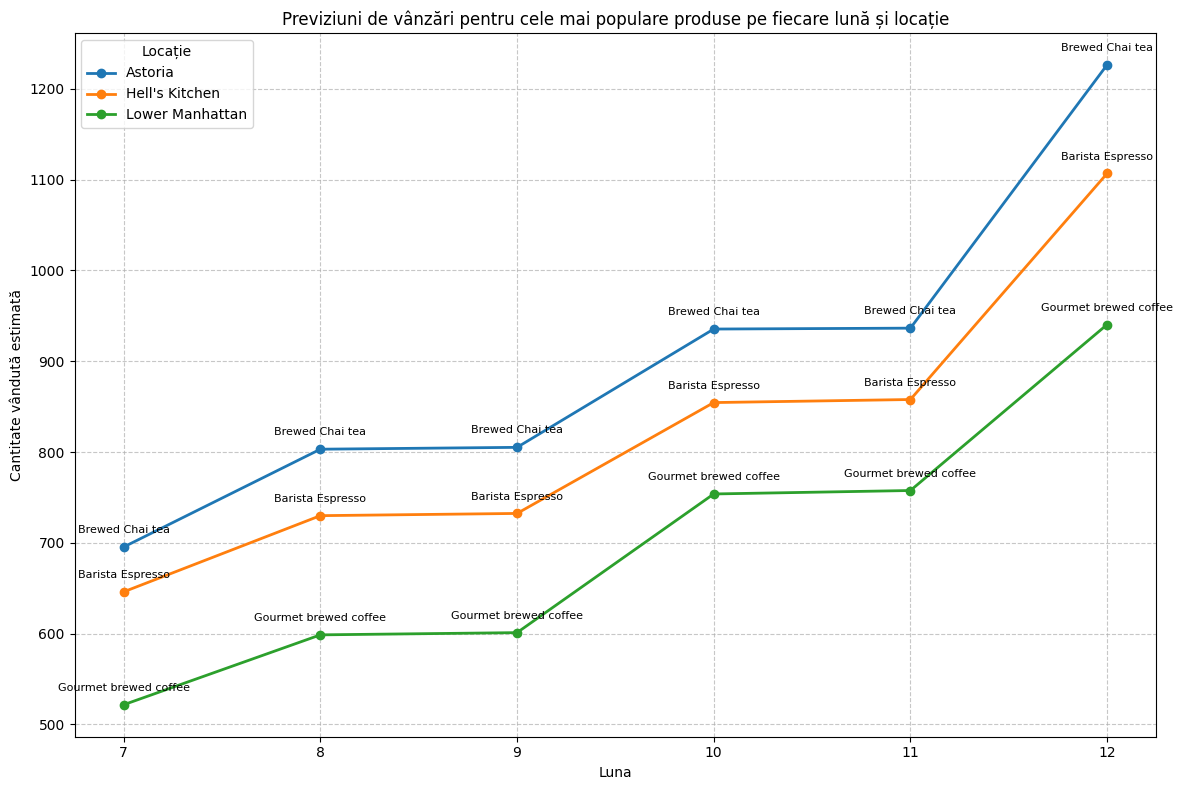

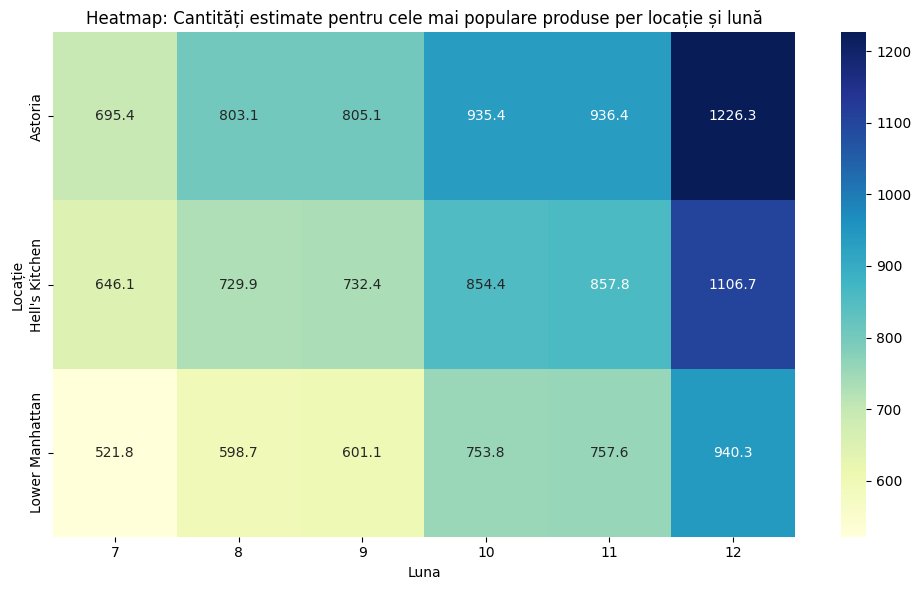

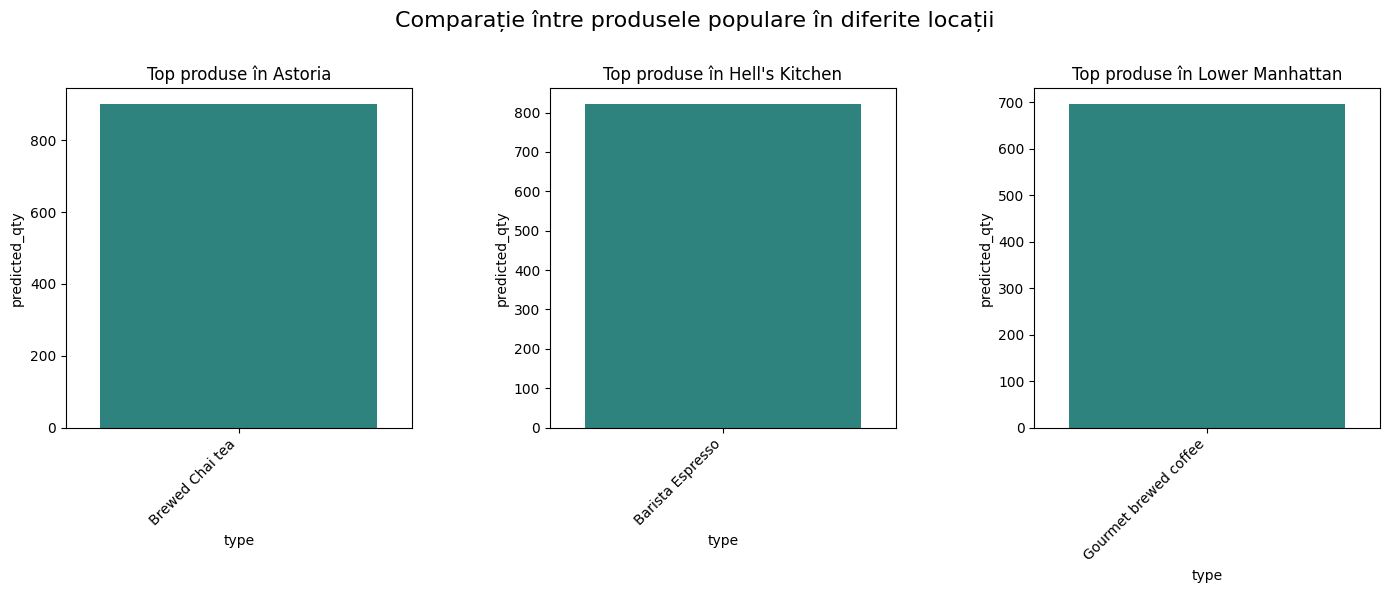

In [131]:
# CELL: Predict Best-Selling Products Across Multiple Future Months (Without loc_cat Features)



if 'best_rf_reg_sales' not in globals() or \
   'product_sales' not in globals() or \
   'sales_features' not in globals() or \
   'label_encoders' not in globals() or \
   'scaler_sales' not in globals():
    print("!!! AsigurƒÉ-te cƒÉ toate variabilele necesare (best_rf_reg_sales, product_sales, etc.) sunt definite prin rularea celulelor anterioare.")
else:
    print("--- Predic»õia celui mai v√¢ndut produs pentru mai multe luni viitoare per loca»õie (Versiunea fƒÉrƒÉ loc_cat) ---")

    # 1. DeterminƒÉm luna viitoare »ôi intervalul de predic»õie
    last_month_in_data = product_sales['month'].max()
    nr_months_to_predict = 6  # Vom face predic»õii pentru urmƒÉtoarele 6 luni
    
    future_months = []
    for i in range(1, nr_months_to_predict + 1):
        future_month = ((last_month_in_data + i - 1) % 12) + 1  # CalculeazƒÉ luna corect (1-12)
        future_months.append(future_month)
    
    print(f"Ultima lunƒÉ √Æn datele agregate: {last_month_in_data}")
    print(f"Se fac predic»õii pentru lunile: {future_months}\n")

    # 2. Ob»õinem loca»õiile unice (codificate)
    unique_locations_encoded = product_sales['store_location'].unique()
    
    # Extragem caracteristicile de bazƒÉ (fƒÉrƒÉ loc_cat)
    base_features = ['store_location', 'product_category', 'product_type', 'product_detail', 'month', 'avg_unit_price']

    # StructurƒÉ pentru a stoca toate predic»õiile pentru vizualizare ulterioarƒÉ
    all_predictions_data = []

    # 3. AnalizƒÉm caracteristicile specifice fiecƒÉrei loca»õii pentru a le incorpora √Æn predic»õii
    location_profiles = {}
    
    for loc_encoded in unique_locations_encoded:
        location_name = label_encoders['store_location'].inverse_transform([loc_encoded])[0]
        loc_data = product_sales[product_sales['store_location'] == loc_encoded]
        
        # CalculƒÉm preferin»õele pentru aceastƒÉ loca»õie
        if not loc_data.empty:
            # Top categorii pentru aceastƒÉ loca»õie
            top_categories = loc_data.groupby('product_category')['total_qty_sold'].sum().sort_values(ascending=False)
            
            # Top tipuri de produse pentru aceastƒÉ loca»õie
            top_types = loc_data.groupby('product_type')['total_qty_sold'].sum().sort_values(ascending=False)
            
            # CalculƒÉm distribu»õia lunarƒÉ a v√¢nzƒÉrilor pentru a eviden»õia sezoane specifice
            monthly_sales = loc_data.groupby('month')['total_qty_sold'].sum()
            
            # CalculƒÉm media »ôi devia»õia standard pentru v√¢nzƒÉri pe lunƒÉ
            monthly_avg = monthly_sales.mean()
            monthly_std = monthly_sales.std() if len(monthly_sales) > 1 else 1.0
            
            # NormalizƒÉm datele lunare pentru a ob»õine un factor sezonier
            seasonal_factors = {}
            for month, sales in monthly_sales.items():
                # AplicƒÉm o func»õie de smoothing pentru a preveni outlier-ii
                seasonal_factors[month] = (sales - monthly_avg) / (monthly_std + 1e-10) + 1.0
            
            # StocƒÉm profilul acestei loca»õii
            location_profiles[loc_encoded] = {
                'name': location_name,
                'top_categories': top_categories,
                'top_types': top_types,
                'monthly_sales': monthly_sales,
                'seasonal_factors': seasonal_factors,
                'avg_qty_per_month': monthly_sales.to_dict()
            }
    
    # 4. IterƒÉm prin fiecare loca»õie pentru predic»õii
    for loc_encoded in unique_locations_encoded:
        location_name_decoded = label_encoders['store_location'].inverse_transform([loc_encoded])[0]
        print(f"--- Procesare Loca»õie: {location_name_decoded} (Codificat: {loc_encoded}) ---")

        # a. IdentificƒÉm produsele unice pentru loca»õia curentƒÉ
        products_in_location = product_sales[product_sales['store_location'] == loc_encoded][
            ['product_category', 'product_type', 'product_detail']
        ].drop_duplicates()

        if products_in_location.empty:
            print(f"Nu s-au gƒÉsit produse istorice pentru loca»õia {location_name_decoded}. Se trece la urmƒÉtoarea.\n")
            continue

        # Ob»õinem profilul acestei loca»õii pentru a-l folosi √Æn predic»õii
        location_profile = location_profiles.get(loc_encoded, {})
        seasonal_factors = location_profile.get('seasonal_factors', {})
        avg_qty_per_month = location_profile.get('avg_qty_per_month', {})

        # Pentru fiecare lunƒÉ viitoare
        for future_month in future_months:
            print(f"\n  Predic»õii pentru luna {future_month} √Æn loca»õia {location_name_decoded}:")
            
            future_data_for_location_list = []

            # b. Pentru fiecare produs unic, creƒÉm o intrare pentru luna viitoare
            for _, product_row in products_in_location.iterrows():
                prod_cat_encoded = product_row['product_category']
                prod_type_encoded = product_row['product_type']
                prod_detail_encoded = product_row['product_detail']

                # DecodificƒÉm valorile pentru lizibilitate √Æn analizƒÉ
                prod_cat_name = label_encoders['product_category'].inverse_transform([prod_cat_encoded])[0]
                prod_type_name = label_encoders['product_type'].inverse_transform([prod_type_encoded])[0]
                
                # EstimƒÉm avg_unit_price folosind media istoricƒÉ pentru combina»õia produs-loca»õie
                historical_prices = product_sales[
                    (product_sales['store_location'] == loc_encoded) &
                    (product_sales['product_category'] == prod_cat_encoded) &
                    (product_sales['product_type'] == prod_type_encoded) &
                    (product_sales['product_detail'] == prod_detail_encoded)
                ]['avg_unit_price']

                estimated_avg_price = historical_prices.mean() if not historical_prices.empty else product_sales['avg_unit_price'].mean() 

                # CreƒÉm un dic»õionar pentru aceastƒÉ instan»õƒÉ
                instance = {
                    'store_location': loc_encoded,
                    'product_category': prod_cat_encoded,
                    'product_type': prod_type_encoded,
                    'product_detail': prod_detail_encoded,
                    'month': future_month,
                    'avg_unit_price': estimated_avg_price
                }

                # AdƒÉugƒÉm caracteristici sezoniere avansate
                # 1. Componentele ciclice ale lunii (transformare sinusoidalƒÉ)
                instance['month_sin'] = math.sin(2 * math.pi * future_month / 12)
                instance['month_cos'] = math.cos(2 * math.pi * future_month / 12)
                
                # 2. Factor sezonier specific loca»õiei pentru aceastƒÉ lunƒÉ
                seasonal_factor = seasonal_factors.get(future_month, 1.0)
                instance['seasonal_factor'] = seasonal_factor
                
                # 3. Medie istoricƒÉ pentru aceastƒÉ lunƒÉ la aceastƒÉ loca»õie
                historical_month_avg = avg_qty_per_month.get(future_month, 0)
                instance['historical_month_avg'] = historical_month_avg
                
                # 4. Indicatori pentru sezoane (primƒÉvarƒÉ, varƒÉ, toamnƒÉ, iarnƒÉ)
                season_map = {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 2, 8: 2, 9: 2, 10: 3, 11: 3, 12: 3}  # 0=iarnƒÉ, 1=primƒÉvarƒÉ, 2=varƒÉ, 3=toamnƒÉ
                instance['season'] = season_map[future_month]
                
                # 5. Intrare pentru trimestrele anului
                instance['quarter'] = (future_month - 1) // 3 + 1
                
                # 6. Caracteristici de interac»õiune specifice pentru aceastƒÉ loca»õie »ôi produs
                # VerificƒÉm dacƒÉ acest produs este √Æn top pentru aceastƒÉ loca»õie
                if 'top_categories' in location_profile and prod_cat_encoded in location_profile['top_categories']:
                    instance['is_top_category'] = 1
                    # PonderƒÉm √Æn func»õie de pozi»õia √Æn clasament
                    cat_rank = list(location_profile['top_categories'].index).index(prod_cat_encoded) + 1
                    instance['top_category_rank'] = 1.0 / cat_rank  # Mai mare pentru categoriile de top
                else:
                    instance['is_top_category'] = 0
                    instance['top_category_rank'] = 0
                
                if 'top_types' in location_profile and prod_type_encoded in location_profile['top_types']:
                    instance['is_top_type'] = 1
                    # PonderƒÉm √Æn func»õie de pozi»õia √Æn clasament
                    type_rank = list(location_profile['top_types'].index).index(prod_type_encoded) + 1
                    instance['top_type_rank'] = 1.0 / type_rank  # Mai mare pentru tipurile de top
                else:
                    instance['is_top_type'] = 0
                    instance['top_type_rank'] = 0
                
                # 7. Interac»õiune √Æntre produs »ôi sezon
                # Anumite produse pot fi mai populare √Æn anumite sezoane
                # GƒÉsim v√¢nzƒÉrile istorice pentru acest produs √Æn luna similarƒÉ
                historical_sales_for_season = product_sales[
                    (product_sales['store_location'] == loc_encoded) &
                    (product_sales['product_category'] == prod_cat_encoded) &
                    (product_sales['product_type'] == prod_type_encoded) &
                    (product_sales['season'] if 'season' in product_sales.columns 
                     else product_sales['month'].map(season_map)) == season_map[future_month]
                ]
                
                if not historical_sales_for_season.empty:
                    instance['season_product_popularity'] = historical_sales_for_season['total_qty_sold'].mean()
                else:
                    instance['season_product_popularity'] = 0
                    
                # 8. Interac»õiune avansatƒÉ √Æntre loca»õie »ôi timp
                # CombinƒÉ ID-ul loca»õiei cu luna pentru a crea o caracteristicƒÉ unicƒÉ
                instance['loc_month_interaction'] = loc_encoded * 100 + future_month
                
                # 9. AdaugƒÉ interac»õiuni simple loc_type »ôi month_loc (pƒÉstrate din codul original)
                instance['loc_type'] = str(loc_encoded) + '_' + str(prod_type_encoded)
                instance['month_loc'] = str(future_month) + '_' + str(loc_encoded)
                
                future_data_for_location_list.append(instance)

            # c. CreƒÉm DataFrame pentru toate caracteristicile
            X_future_base = pd.DataFrame(future_data_for_location_list)
            
            # d. CreƒÉm DataFrame final doar cu caracteristicile necesare pentru model
            X_future_location = X_future_base[base_features]
            
            # e. Ne asigurƒÉm cƒÉ toate coloanele necesare din sales_features sunt prezente »ôi √Æn ordinea corectƒÉ
            for col in sales_features:
                if col not in X_future_location.columns:
                    X_future_location[col] = 0
                    
            X_future_location_final = X_future_location[sales_features]

            # f. ScalƒÉm datele pentru model
            X_future_location_scaled = scaler_sales.transform(X_future_location_final)

            # g. Facem predic»õiile de bazƒÉ
            predicted_qty_sold = best_rf_reg_sales.predict(X_future_location_scaled)

            # h. AjustƒÉm predic»õiile folosind caracteristicile personalizate
            adjusted_predictions = []
            for i, pred in enumerate(predicted_qty_sold):
                # AplicƒÉm ajustƒÉri bazate pe caracteristicile noi (folosind factori de corec»õie)
                adjustment = 1.0
                
                # Factor sezonier
                if 'seasonal_factor' in X_future_base.columns:
                    adjustment *= X_future_base['seasonal_factor'].iloc[i] * 2.0
                
                # Factor bazat pe categoria de top
                if 'top_category_rank' in X_future_base.columns:
                    # BonificƒÉ produsele din categoriile de top
                    adjustment *= (1 + X_future_base['top_category_rank'].iloc[i] * 0.5)
                
                # Factor bazat pe tipul de top
                if 'top_type_rank' in X_future_base.columns:
                    # BonificƒÉ produsele din tipurile de top
                    adjustment *= (1 + X_future_base['top_type_rank'].iloc[i] * 0.3)
                
                # Factor bazat pe popularitatea produsului √Æn sezon
                if 'season_product_popularity' in X_future_base.columns and X_future_base['season_product_popularity'].iloc[i] > 0:
                    season_pop = X_future_base['season_product_popularity'].iloc[i]
                    norm_factor = min(3.0, max(0.3, season_pop / (product_sales['total_qty_sold'].mean() + 1e-10) * 1.5))
                    adjustment *= norm_factor
                
                # AplicƒÉm ajustarea
                adjusted_predictions.append(pred * adjustment)
            
            # i. AdƒÉugƒÉm predic»õiile ajustate la DataFrame-ul cu datele de intrare
            X_future_location['predicted_total_qty_sold'] = adjusted_predictions

            # j. IdentificƒÉm cel mai v√¢ndut produs pentru aceastƒÉ lunƒÉ »ôi loca»õie
            if not X_future_location.empty:
                best_selling_product_idx = X_future_location['predicted_total_qty_sold'].idxmax()
                best_selling_product_row = X_future_location.loc[best_selling_product_idx]

                # k. DecodificƒÉm detaliile produsului
                best_prod_cat_encoded = int(best_selling_product_row['product_category'])
                best_prod_type_encoded = int(best_selling_product_row['product_type'])
                best_prod_detail_encoded = int(best_selling_product_row['product_detail'])
                
                best_prod_cat_decoded = label_encoders['product_category'].inverse_transform([best_prod_cat_encoded])[0]
                best_prod_type_decoded = label_encoders['product_type'].inverse_transform([best_prod_type_encoded])[0]
                best_prod_detail_decoded = label_encoders['product_detail'].inverse_transform([best_prod_detail_encoded])[0]

                print(f"    Cel mai v√¢ndut produs:")
                print(f"      Categorie: {best_prod_cat_decoded}")
                print(f"      Tip:       {best_prod_type_decoded}")
                print(f"      Detalii:   {best_prod_detail_decoded}")
                print(f"      Cantitate totalƒÉ v√¢ndutƒÉ (estimatƒÉ): {best_selling_product_row['predicted_total_qty_sold']:.2f}")
                
                # l. StocƒÉm datele pentru vizualizare
                all_predictions_data.append({
                    'location': location_name_decoded,
                    'month': future_month,
                    'category': best_prod_cat_decoded,
                    'type': best_prod_type_decoded,
                    'detail': best_prod_detail_decoded,
                    'predicted_qty': best_selling_product_row['predicted_total_qty_sold']
                })
            else:
                print(f"    Nu s-au putut genera predic»õii pentru luna {future_month} √Æn loca»õia {location_name_decoded}.")

    # 5. CreƒÉm DataFrame-ul cu toate predic»õiile
    if all_predictions_data:
        all_predictions_df = pd.DataFrame(all_predictions_data)
        print("\n--- Sumar al tuturor predic»õiilor viitoare ---")
        print(all_predictions_df)
        
        # 6. VizualizƒÉm predic»õiile pentru fiecare loca»õie
        plT.figure(figsize=(12, 8))
        
        # CreƒÉm un grafic pentru fiecare loca»õie
        for location in all_predictions_df['location'].unique():
            location_data = all_predictions_df[all_predictions_df['location'] == location]
            
            # SortƒÉm datele dupƒÉ lunƒÉ pentru a avea o linie continuƒÉ
            location_data = location_data.sort_values('month')
            
            # DesenƒÉm linia pentru aceastƒÉ loca»õie
            plT.plot(location_data['month'], location_data['predicted_qty'], 
                     marker='o', linewidth=2, label=location)
            
            # AdƒÉugƒÉm etichete pentru fiecare punct cu numele produsului
            for _, row in location_data.iterrows():
                plT.annotate(f"{row['type']}",
                            (row['month'], row['predicted_qty']),
                            textcoords="offset points",
                            xytext=(0,10),
                            ha='center',
                            fontsize=8)
        
        plT.title('Previziuni de v√¢nzƒÉri pentru cele mai populare produse pe fiecare lunƒÉ »ôi loca»õie')
        plT.xlabel('Luna')
        plT.ylabel('Cantitate v√¢ndutƒÉ estimatƒÉ')
        plT.xticks(future_months)
        plT.grid(True, linestyle='--', alpha=0.7)
        plT.legend(title='Loca»õie')
        plT.tight_layout()
        plT.show()
        
        # 7. GenerƒÉm »ôi un grafic de tip heatmap pentru a compara loca»õiile
        pivot_data = all_predictions_df.pivot_table(
            index='location', columns='month', values='predicted_qty'
        )
        
        plT.figure(figsize=(10, 6))
        sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt=".1f")
        plT.title('Heatmap: CantitƒÉ»õi estimate pentru cele mai populare produse per loca»õie »ôi lunƒÉ')
        plT.xlabel('Luna')
        plT.ylabel('Loca»õie')
        plT.tight_layout()
        plT.show()
        
        # 8. GenerƒÉm o vizualizare pentru a compara produsele cele mai populare √Æntre loca»õii
        plT.figure(figsize=(14, 6))
        
        # GrupƒÉm dupƒÉ loca»õie »ôi tip de produs pentru a vedea ce produs este cel mai popular √Æn fiecare loca»õie
        location_product_summary = all_predictions_df.groupby(['location', 'type'])['predicted_qty'].mean().reset_index()
        
        # Creem un grafic pentru fiecare loca»õie
        loc_count = len(all_predictions_df['location'].unique())
        
        for i, location in enumerate(all_predictions_df['location'].unique(), 1):
            plT.subplot(1, loc_count, i)
            
            # FiltrƒÉm datele pentru aceastƒÉ loca»õie
            loc_data = location_product_summary[location_product_summary['location'] == location]
            
            # SortƒÉm dupƒÉ cantitatea prezisƒÉ
            loc_data = loc_data.sort_values('predicted_qty', ascending=False)
            
            # Creem un bar chart
            sns.barplot(x='type', y='predicted_qty', hue='type', data=loc_data, palette='viridis', legend=False)
            plT.title(f'Top produse √Æn {location}')
            plT.xticks(rotation=45, ha='right')
            plT.tight_layout()
        
        plT.suptitle('Compara»õie √Æntre produsele populare √Æn diferite loca»õii', fontsize=16)
        plT.subplots_adjust(top=0.85, wspace=0.4)
        plT.show()
    else:
        print("Nu s-au generat predic»õii viitoare.")

In [ ]:
# from sklearn.model_selection import GridSearchCV, cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# # 1. Definim grilele de hiperparametri
# log_reg_params = {
#     'C': [0.01, 0.1, 1, 10, 100],  # AdaugƒÉ mai multe valori pentru regularizare
#     'solver': ['liblinear', 'saga'],  # TesteazƒÉ mai mul»õi solvers
#     'class_weight': ['balanced', None]  # Include »ôi op»õiunea fƒÉrƒÉ ponderare
# }

# rf_reg_params = {
#     'n_estimators': [50, 100],  # Reduce numƒÉrul de estimatori
#     'max_depth': [None, 10],  # Reduce numƒÉrul de ad√¢ncimi
#     'min_samples_split': [2, 5],  # Reduce numƒÉrul de combina»õii
#     'min_samples_leaf': [1, 2]
# }

# # 2. OptimizƒÉm Logistic Regression
# log_reg_grid = GridSearchCV(
#     LogisticRegression(max_iter=5000, random_state=42),
#     param_grid=log_reg_params,
#     scoring='accuracy',
#     cv=3,
#     verbose=1,
#     n_jobs=-1
# )
# log_reg_grid.fit(X_train_clf, y_train_clf)

# # 3. OptimizƒÉm Random Forest Regression
# rf_reg_grid = GridSearchCV(
#     RandomForestRegressor(random_state=42),
#     param_grid=rf_reg_params,
#     scoring='r2',
#     cv=3,
#     verbose=1,
#     n_jobs=-1
# )
# rf_reg_grid.fit(X_train_reg, y_train_reg)

# # 4. EvaluƒÉm modelele optimizate
# # Logistic Regression
# best_log_reg = log_reg_grid.best_estimator_
# y_pred_clf_optimized = best_log_reg.predict(X_test_clf)
# log_reg_accuracy = accuracy_score(y_test_clf, y_pred_clf_optimized)

# # Cross-validation pentru Logistic Regression
# cv_scores_log_reg = cross_val_score(best_log_reg, X_train_clf, y_train_clf, cv=5, scoring='accuracy')
# mean_cv_log_reg = cv_scores_log_reg.mean()

# # Random Forest Regression
# best_rf_reg = rf_reg_grid.best_estimator_
# y_pred_reg_optimized = best_rf_reg.predict(X_test_reg)
# rf_reg_r2 = r2_score(y_test_reg, y_pred_reg_optimized)
# rf_reg_mse = mean_squared_error(y_test_reg, y_pred_reg_optimized)

# # Cross-validation pentru Random Forest Regression
# cv_scores_rf_reg = cross_val_score(best_rf_reg, X_train_reg, y_train_reg, cv=5, scoring='r2')
# mean_cv_rf_reg = cv_scores_rf_reg.mean()

# # 5. Afi»ôƒÉm rezultatele
# print("\n--- Logistic Regression Results After Hyperparameter Optimization ---")
# print(f"Best Parameters: {log_reg_grid.best_params_}")
# print(f"Test Accuracy: {log_reg_accuracy:.4f}")
# print(f"Cross-Validation Mean Accuracy: {mean_cv_log_reg:.4f}")

# print("\n--- Random Forest Regression Results After Hyperparameter Optimization ---")
# print(f"Best Parameters: {rf_reg_grid.best_params_}")
# print(f"Test R¬≤: {rf_reg_r2:.4f}")
# print(f"Test MSE: {rf_reg_mse:.4f}")
# print(f"Cross-Validation Mean R¬≤: {mean_cv_rf_reg:.4f}")

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import (
#     mean_squared_error,
#     r2_score,
#     accuracy_score,
#     classification_report,
#     confusion_matrix,
#     ConfusionMatrixDisplay,
# )

# # 3. Encode categorical columns
# categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
# label_encoders = {}
# for col in categorical_columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# # 4. Feature Selection
# features = [col for col in df.columns if col not in ["transaction_id", "transaction_date", "transaction_time", "unit_price"]]
# target_regression = "unit_price"
# target_classification = "is_expensive"

# # Create a binary target for classification
# df[target_classification] = (df[target_regression] > df[target_regression].median()).astype(int)

# # 5. Split data into train/test sets
# X = df[features]
# y_regression = df[target_regression]
# y_classification = df[target_classification]

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
# X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
#     X, y_classification, test_size=0.2, random_state=42, stratify=y_classification
# )

# # Scale numerical features
# scaler = StandardScaler()
# X_train_reg = scaler.fit_transform(X_train_reg)
# X_test_reg = scaler.transform(X_test_reg)
# X_train_clf = scaler.fit_transform(X_train_clf)
# X_test_clf = scaler.transform(X_test_clf)

# # 6. Train Models Without Cross-Validation
# # (a) Linear Regression
# lin_reg = LinearRegression()
# lin_reg.fit(X_train_reg, y_train_reg)
# y_pred_reg = lin_reg.predict(X_test_reg)
# mse_lin_reg = mean_squared_error(y_test_reg, y_pred_reg)
# r2_lin_reg = r2_score(y_test_reg, y_pred_reg)

# # (b) Logistic Regression
# log_reg = LogisticRegression(max_iter=5000, random_state=42, class_weight="balanced", solver="saga")
# log_reg.fit(X_train_clf, y_train_clf)
# y_pred_clf = log_reg.predict(X_test_clf)
# acc_log_reg = accuracy_score(y_test_clf, y_pred_clf)

# # (c) Random Forest Regression
# rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_reg.fit(X_train_reg, y_train_reg)
# y_pred_rf_reg = rf_reg.predict(X_test_reg)
# mse_rf_reg = mean_squared_error(y_test_reg, y_pred_rf_reg)
# r2_rf_reg = r2_score(y_test_reg, y_pred_rf_reg)

# # (d) Decision Tree Classifier
# dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
# dt_clf.fit(X_train_clf, y_train_clf)
# y_pred_clf_dt = dt_clf.predict(X_test_clf)
# acc_dt_clf = accuracy_score(y_test_clf, y_pred_clf_dt)

# # (e) Decision Tree Regressor
# dt_reg = DecisionTreeRegressor(random_state=42, max_depth=5)
# dt_reg.fit(X_train_reg, y_train_reg)
# y_pred_reg_dt = dt_reg.predict(X_test_reg)
# mse_dt_reg = mean_squared_error(y_test_reg, y_pred_reg_dt)
# r2_dt_reg = r2_score(y_test_reg, y_pred_reg_dt)

# # Display Results Without Cross-Validation
# print("\n--- Results Without Cross-Validation ---")
# print(f"Linear Regression: Test MSE: {mse_lin_reg:.4f}, Test R¬≤: {r2_lin_reg:.4f}")
# print(f"Logistic Regression: Test Accuracy: {acc_log_reg:.4f}")
# print(f"Random Forest Regression: Test MSE: {mse_rf_reg:.4f}, Test R¬≤: {r2_rf_reg:.4f}")
# print(f"Decision Tree Classifier: Test Accuracy: {acc_dt_clf:.4f}")
# print(f"Decision Tree Regressor: Test MSE: {mse_dt_reg:.4f}, Test R¬≤: {r2_dt_reg:.4f}")

# # 7. Train Models With Cross-Validation
# # Cross-validation for Linear Regression
# cv_scores_lin_reg = cross_val_score(lin_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_lin_reg = cv_scores_lin_reg.mean()

# # Cross-validation for Logistic Regression
# cv_scores_log_reg = cross_val_score(log_reg, X, y_classification, cv=5, scoring="accuracy")
# mean_acc_log_reg = cv_scores_log_reg.mean()

# # Cross-validation for Random Forest Regression
# cv_scores_rf_reg = cross_val_score(rf_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_rf_reg = cv_scores_rf_reg.mean()

# # Cross-validation for Decision Tree Classifier
# cv_scores_dt_clf = cross_val_score(dt_clf, X, y_classification, cv=5, scoring="accuracy")
# mean_acc_dt_clf = cv_scores_dt_clf.mean()

# # Cross-validation for Decision Tree Regressor
# cv_scores_dt_reg = cross_val_score(dt_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_dt_reg = cv_scores_dt_reg.mean()

# # Display Results With Cross-Validation
# print("\n--- Results With Cross-Validation ---")
# print(f"Linear Regression: Cross-Validation Mean R¬≤: {mean_r2_lin_reg:.4f}")
# print(f"Logistic Regression: Cross-Validation Mean Accuracy: {mean_acc_log_reg:.4f}")
# print(f"Random Forest Regression: Cross-Validation Mean R¬≤: {mean_r2_rf_reg:.4f}")
# print(f"Decision Tree Classifier: Cross-Validation Mean Accuracy: {mean_acc_dt_clf:.4f}")
# print(f"Decision Tree Regressor: Cross-Validation Mean R¬≤: {mean_r2_dt_reg:.4f}")

# # Confusion Matrix for Logistic Regression
# cm_log = confusion_matrix(y_test_clf, y_pred_clf)
# disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Not Expensive", "Expensive"])
# disp_log.plot(cmap="Blues")
# plT.title("Confusion Matrix - Logistic Regression")
# plT.show()

# # Confusion Matrix for Decision Tree Classifier
# cm_dt_clf = confusion_matrix(y_test_clf, y_pred_clf_dt)
# disp_dt_clf = ConfusionMatrixDisplay(confusion_matrix=cm_dt_clf, display_labels=["Not Expensive", "Expensive"])
# disp_dt_clf.plot(cmap="Blues")
# plT.title("Confusion Matrix - Decision Tree Classifier")
# plT.show()

In [ ]:
# # Func»õie √ÆmbunƒÉtƒÉ»õitƒÉ pentru predic»õii bazate exclusiv pe Random Forest
# def predict_sales_trends_by_time(model, scaler, df, label_encoders, location_name, top_products=3, future_periods=12):
#     """
#     Prezice tendin»õele de v√¢nzƒÉri pentru produsele de top dintr-o loca»õie pentru perioadele viitoare (luni)
#     folosind exclusiv modelul Random Forest antrenat.
#     """
#     # Copie »ôi pregƒÉtire date
#     df_copy = df.copy()
#     if not pd.api.types.is_datetime64_any_dtype(df_copy['transaction_date']):
#         df_copy['transaction_date'] = pd.to_datetime(df_copy['transaction_date'])
#     if 'is_expensive' in df_copy.columns:
#         df_copy = df_copy.drop(columns=['is_expensive'])
    
#     # Ob»õine id-ul loca»õiei
#     location_id = label_encoders['store_location'].transform([location_name])[0]
#     location_data = df_copy[df_copy['store_location'] == location_id]
    
#     # IdentificƒÉ top produse dupƒÉ frecven»õƒÉ istoricƒÉ
#     top_product_combinations = (
#         location_data.groupby(['product_category', 'product_type'])
#         .size()
#         .reset_index(name='count')
#         .sort_values('count', ascending=False)
#         .head(top_products)
#     )
    
#     # PregƒÉte»ôte datele pentru predic»õie
#     df_predictions = pd.DataFrame()
#     max_month = df_copy['month'].max()
#     features = [col for col in df_copy.columns if col not in ["transaction_id", "transaction_date", "transaction_time", "unit_price"]]
    
#     # Pentru fiecare produs din top, facem predic»õii pentru perioadele viitoare
#     for _, product_row in top_product_combinations.iterrows():
#         category = product_row['product_category']
#         prod_type = product_row['product_type']
        
#         # DecodificƒÉm numele pentru afi»ôare
#         category_name = label_encoders['product_category'].inverse_transform([category])[0]
#         type_name = label_encoders['product_type'].inverse_transform([prod_type])[0]
        
#         # FiltrƒÉm datele pentru aceastƒÉ combina»õie specificƒÉ de categorie »ôi tip
#         product_data = location_data[
#             (location_data['product_category'] == category) &
#             (location_data['product_type'] == prod_type)
#         ]
        
#         if product_data.empty:
#             continue
        
#         # AnalizƒÉm datele istorice pentru a √Æn»õelege tendin»õele lunare pentru acest produs
#         monthly_data = product_data.groupby('month').agg({
#             'unit_price': ['mean', 'count'],
#             'transaction_qty': 'sum'
#         })
#         monthly_data.columns = ['avg_price', 'count', 'total_qty']
        
#         # DeterminƒÉm intervalul istoric de pre»õuri pentru acest produs
#         min_price = product_data['unit_price'].min()
#         max_price = product_data['unit_price'].max()
        
#         # GenerƒÉm predic»õiile pentru fiecare perioadƒÉ viitoare
#         for period in range(1, future_periods + 1):
#             future_month = ((max_month + period - 1) % 12) + 1
            
#             # PregƒÉtim datele de intrare pentru modelul Random Forest
#             # Ne asigurƒÉm cƒÉ folosim date istorice relevante pentru luna respectivƒÉ dacƒÉ existƒÉ
#             month_specific_data = product_data[product_data['month'] == future_month]
            
#             row_data = {}
#             for col in features:
#                 if col == 'store_location':
#                     row_data[col] = location_id
#                 elif col == 'product_category':
#                     row_data[col] = category
#                 elif col == 'product_type':
#                     row_data[col] = prod_type
#                 elif col == 'month':
#                     row_data[col] = future_month
#                 # DacƒÉ avem date istorice pentru aceastƒÉ lunƒÉ, folosim mediile lor
#                 elif len(month_specific_data) > 0 and col in month_specific_data.columns and pd.api.types.is_numeric_dtype(month_specific_data[col]):
#                     row_data[col] = month_specific_data[col].mean()
#                 # Altfel, folosim mediile generale pentru acest produs
#                 elif col in product_data.columns and pd.api.types.is_numeric_dtype(product_data[col]):
#                     row_data[col] = product_data[col].mean()
#                 else:
#                     row_data[col] = 0
            
#             # PregƒÉtim datele pentru predic»õie
#             prediction_data = pd.DataFrame([row_data])
#             prediction_scaled = scaler.transform(prediction_data)
            
#             # Ob»õinem predic»õia de la modelul Random Forest
#             predicted_value = model.predict(prediction_scaled)[0]
            
#             # AdƒÉugƒÉm rezultatul √Æn dataframe-ul de predic»õii
#             df_predictions = pd.concat([df_predictions, pd.DataFrame({
#                 'location': [location_name],
#                 'category': [category_name],
#                 'type': [type_name],
#                 'period': [period],
#                 'month': [future_month],
#                 'predicted_value': [predicted_value]
#             })], ignore_index=True)
    
#     return df_predictions

# # GenerƒÉm predic»õiile pentru toate loca»õiile
# location_names = [label_encoders['store_location'].inverse_transform([loc])[0] for loc in df['store_location'].unique()]

# # Creare un dic»õionar pentru a stoca rezultatele pentru toate loca»õiile
# all_locations_predictions = {}

# # GenereazƒÉ predic»õii pentru fiecare loca»õie
# for location in location_names:
#     sales_trends = predict_sales_trends_by_time(
#         best_rf_reg, scaler, df, label_encoders,
#         location, top_products=3, future_periods=12
#     )
#     all_locations_predictions[location] = sales_trends
    
#     print(f"\nPredic»õii pentru tendin»õele de v√¢nzƒÉri √Æn {location}:")
#     print(sales_trends.head(10))

# # VerificƒÉm rezultatele pentru toate loca»õiile
# for location, products in bestsellers_predictions.items():
#     for product in products:
#         check_predicted_vs_historic(
#             df, label_encoders, location,
#             product['category'], product['type'], product['predicted_value']
#         )

# # Afi»ôƒÉm din nou primele r√¢nduri din tendin»õele de v√¢nzƒÉri pentru Lower Manhattan
# print(f"\nPredic»õii pentru tendin»õele de v√¢nzƒÉri √Æn {location_names[0]}:")
# print(all_locations_predictions[location_names[0]].head(10))

# # VizualizƒÉm tendin»õele pentru fiecare loca»õie
# # VizualizƒÉm tendin»õele pentru fiecare loca»õie
# for location, predictions_df in all_locations_predictions.items():
#     # 1. Grafic de linie - tendin»õe pe luni pentru fiecare produs
#     plT.figure(figsize=(14, 8))
    
#     for product in predictions_df['type'].unique():
#         # Extragem datele pentru acest produs »ôi le sortƒÉm dupƒÉ lunƒÉ
#         product_data = predictions_df[predictions_df['type'] == product].sort_values('month')
        
#         # TrasƒÉm linia folosind datele sortate
#         plT.plot(product_data['month'], product_data['predicted_value'], 
#                 marker='o', linewidth=2.5, label=product)
    
#     plT.xlabel('Luna viitoare', fontsize=12)
#     plT.ylabel('Valoare prezisƒÉ (pre»õ)', fontsize=12)
#     plT.title(f'Tendin»õe de v√¢nzƒÉri pentru produsele de top √Æn {location} (dupƒÉ lunƒÉ)', fontsize=14)
#     plT.legend(title="Produs", fontsize=11)
#     plT.grid(True, alpha=0.3)
#     plT.xticks(range(1, 13))
#     plT.tight_layout()
#     plT.show()
    
#     # Restul codului de vizualizare rƒÉm√¢ne neschimbat...
    
#     # 2. Heatmap - vizualizare matrice produs vs. lunƒÉ
#     pivot = predictions_df.pivot(index='type', columns='month', values='predicted_value')
#     plT.figure(figsize=(12, 6))
#     sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu')
#     plT.title(f'Heatmap: Predic»õii de pre»õuri pe luni pentru {location}', fontsize=14)
#     plT.xlabel('Luna', fontsize=12)
#     plT.ylabel('Produs', fontsize=12)
#     plT.tight_layout()
#     plT.show()
    
#     # 3. Bar chart - compara»õie √Æntre produse pentru un subset de luni
#     months_to_show = [1, 4, 7, 10]  # Trimestrial
#     plT.figure(figsize=(15, 10))
    
#     for i, month in enumerate(months_to_show, 1):
#         plT.subplot(2, 2, i)
#         month_data = predictions_df[predictions_df['month'] == month]
#         if not month_data.empty:
#             bars = plT.bar(month_data['type'], month_data['predicted_value'], color='mediumseagreen')
#             plT.title(f'Predic»õii pentru luna {month} √Æn {location}', fontsize=12)
#             plT.xlabel('Produs', fontsize=10)
#             plT.ylabel('Valoare prezisƒÉ', fontsize=10)
#             plT.xticks(rotation=30)
            
#             # AdƒÉugƒÉm valorile pe bare
#             for bar in bars:
#                 height = bar.get_height()
#                 plT.text(bar.get_x() + bar.get_width()/2., height + 0.1, 
#                         f'{height:.2f}', ha='center', fontsize=9)
    
#     plT.tight_layout()
#     plT.show()